In [84]:
import numpy as np  # Import NumPy library for numerical computations
import pandas as pd  # Import Pandas library for data manipulation and analysis
import warnings  # Import Warnings library to suppress warning messages
import matplotlib.pyplot as plt  # Import Matplotlib library for data visualization
import seaborn as sns  # Import Seaborn library for statistical data visualization
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('train.csv')
df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [86]:
missing_df_percentage = dict(df.isna().sum() / len(df) * 100)
missing_df_percentage

{'id': 0.0,
 'circle_id': 0.0,
 'loc_og_t2o_mou': 1.0028714695924228,
 'std_og_t2o_mou': 1.0028714695924228,
 'loc_ic_t2o_mou': 1.0028714695924228,
 'last_date_of_month_6': 0.0,
 'last_date_of_month_7': 0.570008142973471,
 'last_date_of_month_8': 1.0471578165402362,
 'arpu_6': 0.0,
 'arpu_7': 0.0,
 'arpu_8': 0.0,
 'onnet_mou_6': 3.954342204888641,
 'onnet_mou_7': 3.8386262660895154,
 'onnet_mou_8': 5.2900755725081785,
 'offnet_mou_6': 3.954342204888641,
 'offnet_mou_7': 3.8386262660895154,
 'offnet_mou_8': 5.2900755725081785,
 'roam_ic_mou_6': 3.954342204888641,
 'roam_ic_mou_7': 3.8386262660895154,
 'roam_ic_mou_8': 5.2900755725081785,
 'roam_og_mou_6': 3.954342204888641,
 'roam_og_mou_7': 3.8386262660895154,
 'roam_og_mou_8': 5.2900755725081785,
 'loc_og_t2t_mou_6': 3.954342204888641,
 'loc_og_t2t_mou_7': 3.8386262660895154,
 'loc_og_t2t_mou_8': 5.2900755725081785,
 'loc_og_t2m_mou_6': 3.954342204888641,
 'loc_og_t2m_mou_7': 3.8386262660895154,
 'loc_og_t2m_mou_8': 5.2900755725081785

In [87]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
90%    62998.200000      109.0             0.0             0.0   
95%    66498.100000      109.0             0.0             0.0   
99%    69298.020000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
90%               0.0    619.993800    615.661400    614.994600    345.080000   
95%               0.0    832.022700    823.236700    828.464700    617.185000   
99%               0.0   1400.276640   1414.891380   1445.054800   1447.098000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
90%      347.908000  ...      0.000000      0.000000      1.000000   
95%      628.437500  ...      0.000000      0.000000      1.000000   
99%     1478.540900  ...      2.000000      2.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
90%        1.000000      1.000000   2792.000000    160.444000    136.272000   
95%        1.000000      1.000000   3108.000000    464.277000    446.353000   
99%        1.000000      1.000000   3651.000000   1226.659800   1254.279000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
90%      110.32800           1.000000  
95%      400.13400           1.000000  
99%     1188.26780           1.000000  
max    11166.21000   

In [88]:
from sklearn.impute import SimpleImputer

In [89]:
df.dtypes.value_counts()

float64    135
int64       28
object       9
Name: count, dtype: int64

In [90]:
# Creating a list 'num_variables' containing column names for non-object (numerical) data types in the DataFrame 'df'
num_variables=[col for col in df.columns if df[col].dtype!='O']
num_variables

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og

In [91]:
# Creating a list 'recharge_cols' containing column names with 'rech' in their names and are of numerical data type
recharge_cols = [col for col in df.columns if 'rech' in col and col in num_variables]

# Initializing SimpleImputer to replace missing values with constant (0) for columns in 'recharge_cols'
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Imputing missing values in 'recharge_cols' using the imputer
df[recharge_cols] = imputer.fit_transform(df[recharge_cols])

# Calculating the percentage of missing values in columns of 'recharge_cols' after imputation
df[recharge_cols].isna().sum() * 100 / len(df)

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

In [92]:
# Specifying columns 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8' 
# as flag columns, which are currently classified as numerical, hence imputing them with 0.
flag_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

# Imputing missing values in 'flag_cols' with 0 using the previously initialized imputer
df[flag_cols] = imputer.fit_transform(df[flag_cols])

# Calculating the percentage of missing values in columns of 'flag_cols' after imputation
df[flag_cols].isna().sum() * 100 / len(df)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

In [93]:
# Creating a DataFrame 'isna_data' to analyze missing values in DataFrame 'df'
isna_data = pd.DataFrame(df.isna().sum() / len(df) * 100)

# Sorting 'isna_data' by percentage of missing values in descending order
isna_data = isna_data.sort_values(by=0, ascending=False)

# Resetting index of 'isna_data'
isna_data = isna_data.reset_index()

# Renaming columns of 'isna_data' as 'feature' and 'percentage'
isna_data.columns = ['feature', 'percentage']

# Displaying the DataFrame 'isna_data' with information about missing values
isna_data

feature  percentage
0                   arpu_3g_6   74.902499
1                   arpu_2g_6   74.902499
2    date_of_last_rech_data_6   74.902499
3                   arpu_3g_7   74.478207
4                   arpu_2g_7   74.478207
..                        ...         ...
167        last_day_rch_amt_8    0.000000
168        last_day_rch_amt_7    0.000000
169        last_day_rch_amt_6    0.000000
170            max_rech_amt_8    0.000000
171         churn_probability    0.000000

[172 rows x 2 columns]

In [94]:
# Filtering columns from 'isna_data' where the percentage of missing values is less than 30%
relevent_columns_data = isna_data[isna_data['percentage'] < 30]

# Displaying the DataFrame 'relevent_columns_data' with columns having missing values less than 30%
relevent_columns_data

# Extracting the list of relevant columns from 'relevent_columns_data'
imp_columns = list(relevent_columns_data['feature'])

# Creating a refined DataFrame 'df_refined_1' containing only the relevant columns
df_refined_1 = df[imp_columns]

# Creating a DataFrame to show the percentage of missing values in the refined data
pd.DataFrame(df_refined_1.isna().sum() / len(df) * 100).shape

(163, 1)

In [95]:
# Creating a list 'df_variables' containing column names for variables with object (string) data type in the DataFrame 'df_refined_1'
df_variables = [x for x in df_refined_1.columns if df_refined_1[x].dtype == 'O']
df_variables

['date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'last_date_of_month_8',
 'last_date_of_month_7',
 'last_date_of_month_6']

In [96]:
type(df_variables)

list

In [97]:
# Extracting days of the month into separate columns for each date variable in 'df_variables'
# Iterating over each date variable
length = len(df_variables)
for i in range(length):
    # Creating a new column name for the day extracted from the date variable
    string = 'day_from_' + df_variables[i]
    # Extracting the day of the month and assigning it to the new column
    df_refined_1[string] = pd.DatetimeIndex(df_refined_1[df_variables[i]]).day
    # Appending the new column name to 'df_variables' for further processing
    df_variables.append(string)

In [98]:
# Calculating the difference between the last date of recharge and the last date of the month to derive recency for month 6
df_refined_1["days_since_rechg_6"] = (df_refined_1["day_from_last_date_of_month_6"] - df_refined_1["day_from_date_of_last_rech_6"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('days_since_rechg_6')

# Calculating the difference between the last date of recharge and the last date of the month to derive recency for month 7
df_refined_1["days_since_rechg_7"] = (df_refined_1["day_from_last_date_of_month_7"] - df_refined_1["day_from_date_of_last_rech_7"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('days_since_rechg_7')

# Calculating the difference between the last date of recharge and the last date of the month to derive recency for month 8
df_refined_1["days_since_rechg_8"] = (df_refined_1["day_from_last_date_of_month_8"] - df_refined_1["day_from_date_of_last_rech_8"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('days_since_rechg_8')

# Deriving presence or absence of the last date of the month columns for month 6
df_refined_1["month_present_6"] = (df_refined_1["day_from_last_date_of_month_6"] - df_refined_1["day_from_last_date_of_month_6"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('month_present_6')

# Deriving presence or absence of the last date of the month columns for month 7
df_refined_1["month_present_7"] = (df_refined_1["day_from_last_date_of_month_7"] - df_refined_1["day_from_last_date_of_month_7"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('month_present_7')

# Deriving presence or absence of the last date of the month columns for month 8
df_refined_1["month_present_8"] = (df_refined_1["day_from_last_date_of_month_8"] - df_refined_1["day_from_last_date_of_month_8"]) + 1
# Appending the derived feature to 'df_variables'
df_variables.append('month_present_8')

In [99]:
# Creating a DataFrame to show the percentage of missing values in selected columns of 'df_refined_1'
pd.DataFrame(df_refined_1[df_variables].isna().sum() / len(df) * 100)

0
date_of_last_rech_8            3.515765
date_of_last_rech_7            1.762882
date_of_last_rech_6            1.572880
last_date_of_month_8           1.047158
last_date_of_month_7           0.570008
last_date_of_month_6           0.000000
day_from_date_of_last_rech_8   3.515765
day_from_date_of_last_rech_7   1.762882
day_from_date_of_last_rech_6   1.572880
day_from_last_date_of_month_8  1.047158
day_from_last_date_of_month_7  0.570008
day_from_last_date_of_month_6  0.000000
days_since_rechg_6             1.572880
days_since_rechg_7             1.762882
days_since_rechg_8             3.515765
month_present_6                0.000000
month_present_7                0.570008
month_present_8                1.047158

In [100]:
# Generating descriptive statistics for the selected columns in 'df_refined_1' with specified percentiles
df_refined_1[df_variables].describe(percentiles=[.25, .5, .75, .90, .95, .99])

day_from_date_of_last_rech_8  day_from_date_of_last_rech_7  \
count                  67538.000000                  68765.000000   
mean                      25.441988                     25.505708   
std                        6.108002                      5.765762   
min                        1.000000                      1.000000   
25%                       24.000000                     23.000000   
50%                       27.000000                     27.000000   
75%                       30.000000                     30.000000   
90%                       31.000000                     31.000000   
95%                       31.000000                     31.000000   
99%                       31.000000                     31.000000   
max                       31.000000                     31.000000   

       day_from_date_of_last_rech_6  day_from_last_date_of_month_8  \
count                  68898.000000                        69266.0   
mean                      24.128131                           31.0   
std                        6.134773                            0.0   
min                        1.000000                           31.0   
25%                       21.000000                           31.0   
50%                       27.000000                           31.0   
75%                       29.000000                           31.0   
90%                       30.000000                           31.0   
95%                       30.000000                           31.0   
99%                       30.000000                           31.0   
max                       30.000000                           31.0   

       day_from_last_date_of_month_7  day_from_last_date_of_month_6  \
count                        69600.0                        69999.0   
mean                            31.0                           30.0   
std                              0.0                            0.0   
min                             31.0                           30.0   
25%                             31.0                           30.0   
50%                             31.0                           30.0   
75%                             31.0                           30.0   
90%                             31.0                           30.0   
95%                             31.0                           30.0   
99%                             31.0                           30.0   
max                             31.0                           30.0   

       days_since_rechg_6  days_since_rechg_7  days_since_rechg_8  \
count        68898.000000        68765.000000        67538.000000   
mean             6.871869            6.494292            6.558012   
std              6.134773            5.765762            6.108002   
min              1.000000            1.000000            1.000000   
25%              2.000000            2.000000            2.000000   
50%              4.000000            5.000000            5.000000   
75%             10.000000            9.000000            8.000000   
90%             17.000000           15.000000           15.000000   
95%             19.000000           17.000000           21.000000   
99%             26.000000           26.000000           27.000000   
max             30.000000           31.000000           31.000000   

       month_present_6  month_present_7  month_present_8  
count          69999.0          69600.0          69266.0  
mean               1.0              1.0              1.0  
std                0.0              0.0              0.0  
min                1.0              1.0              1.0  
25%                1.0              1.0              1.0  
50%                1.0              1.0              1.0  
75%                1.0              1.0              1.0  
90%                1.0              1.0              1.0  
95%                1.0              1.0              1.0  
99%                1.0              1.0              1.0  
max   

In [101]:
# List of columns to be dropped from 'df_refined_1'
df_drop_variables = ['date_of_last_rech_8',
                     'date_of_last_rech_7',
                     'date_of_last_rech_6',
                     'last_date_of_month_8',
                     'last_date_of_month_7',
                     'last_date_of_month_6',
                     'day_from_date_of_last_rech_8',
                     'day_from_date_of_last_rech_7',
                     'day_from_date_of_last_rech_6',
                     'day_from_last_date_of_month_8',
                     'day_from_last_date_of_month_7',
                     'day_from_last_date_of_month_6']

# Dropping specified columns from 'df_refined_1'
df_refined_1 = df_refined_1.drop(df_drop_variables, axis=1)

In [102]:
# Columns to be imputed with 0 where minimum value is always 1
days_col_impute = ['days_since_rechg_6',
                   'days_since_rechg_7',
                   'days_since_rechg_8',
                   'month_present_6',
                   'month_present_7',
                   'month_present_8']

# Imputing null values with 0 for the specified columns in 'df_refined_1'
df_refined_1[days_col_impute] = df_refined_1[days_col_impute].apply(lambda x: x.fillna(0))

In [103]:
# Creating a list 'cols_to_impute' containing columns with missing values that are of float64 or int64 data types
cols_to_impute = []
for col in df_refined_1.select_dtypes(include=['float64', 'int64']).columns:
    if df_refined_1[col].isnull().any():
        cols_to_impute.append(col)

In [104]:
# Imputing missing values with 0 for columns in 'cols_to_impute' where missing values are less than 6%
df_refined_1[cols_to_impute] = df_refined_1[cols_to_impute].apply(lambda x: x.fillna(0))

In [105]:
# Checking for duplicated rows in DataFrame 'df_refined_1'
df_refined_1.duplicated().any().sum()

0

In [106]:
df_refined_1[df_refined_1.columns].isna().sum()

loc_ic_t2t_mou_8      0
loc_ic_mou_8          0
std_ic_t2m_mou_8      0
loc_og_t2m_mou_8      0
std_og_t2f_mou_8      0
                     ..
days_since_rechg_7    0
days_since_rechg_8    0
month_present_6       0
month_present_7       0
month_present_8       0
Length: 163, dtype: int64

In [107]:
# Creating a DataFrame 'unq_check' to count the number of unique values in each column of 'df_refined_1'
unq_check = pd.DataFrame(df_refined_1.nunique())

# Extracting column names with only one unique value
single_value_cols = list(unq_check[unq_check[0] == 1].index)

# Dropping columns with only one unique value from 'df_refined_1'
df_refined_1 = df_refined_1.drop(single_value_cols, axis=1)

In [108]:
# Calculating the difference in total recharge amount between month 6 and month 8
df_refined_1['rech_diff_6_8'] = df_refined_1['total_rech_amt_8'] - df_refined_1['total_rech_amt_6']

# Calculating the difference in average revenue per user (ARPU) between month 6 and month 8
df_refined_1['arpu_diff_6_8'] = df_refined_1['arpu_8'] - df_refined_1['arpu_6']

# Calculating the difference in total outgoing minutes of usage (OG mou) between month 6 and month 8
df_refined_1['og_mou_diff_6_8'] = df_refined_1['total_og_mou_8'] - df_refined_1['total_og_mou_6']

In [109]:
df_refined_1['churn_probability'].sum()

7132

In [110]:
len(df)

69999

In [111]:
# Calculating churn percentage based on churn probability in 'df_refined_1'
churn_percentage = round(df_refined_1['churn_probability'].sum() / len(df) * 100, 2)
print(churn_percentage)

10.19


In [112]:
# Importing regular expression module
import re

# Categorizing key columns with respective variables based on column names
total_amounts = [i for i in list(df_refined_1.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(df_refined_1.columns) if re.search('total.+og.+mou',i)]
total_incoming_minutes = [i for i in list(df_refined_1.columns) if re.search('total.+ic.+mou',i)]
offnetwork_minutes = [i for i in list(df_refined_1.columns) if re.search('offnet',i)]
volume_3g = [i for i in list(df_refined_1.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(df_refined_1.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(df_refined_1.columns) if re.search('aon',i)]

# Storing the categorized variables in a single flat list
variables = ['id',
             *total_amounts,
             *total_incoming_minutes,
             *total_outgoing_minutes,
             *offnetwork_minutes,
             *volume_3g,
             *volume_2g,
             *age_on_network,
             'arpu_6', 'arpu_7', 'arpu_8',
             'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
             'rech_diff_6_8', 'arpu_diff_6_8', 'og_mou_diff_6_8',
             'churn_probability']

# Creating a trimmed DataFrame for Exploratory Data Analysis (EDA) with selected variables and setting 'id' as index
trim_df_for_EDA = df_refined_1[variables].set_index('id')

In [113]:
# Selecting numerical columns from the trimmed DataFrame for analysis
numeric_cols = trim_df_for_EDA.select_dtypes(include=['float64', 'int64']).columns
# Defining categorical columns for analysis
categorical_cols = flag_cols + ['month_present_7', 'month_present_8']
# Displaying the list of categorical columns
categorical_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'month_present_7',
 'month_present_8']

Column: total_rech_amt_8, Missing Data: 0.00%


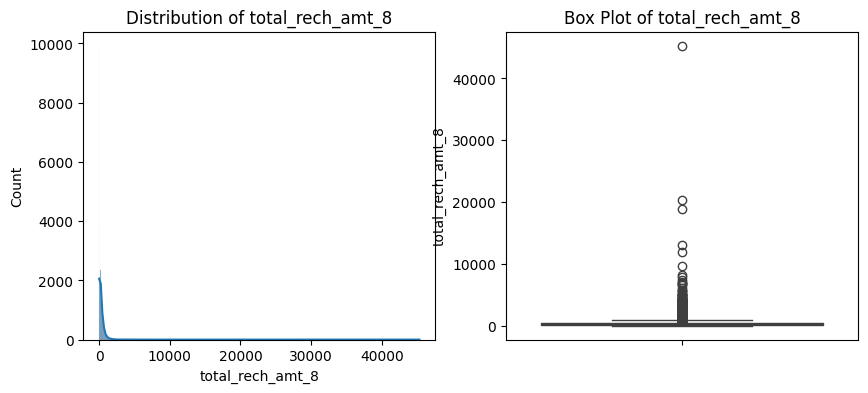

Column: total_rech_amt_6, Missing Data: 0.00%


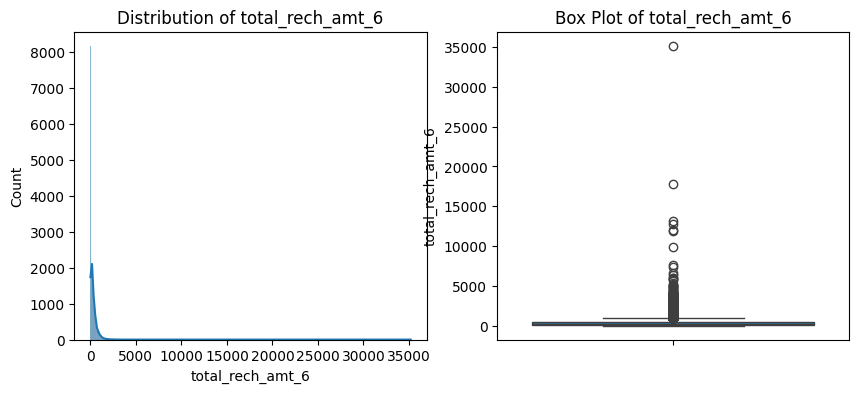

Column: total_rech_amt_7, Missing Data: 0.00%


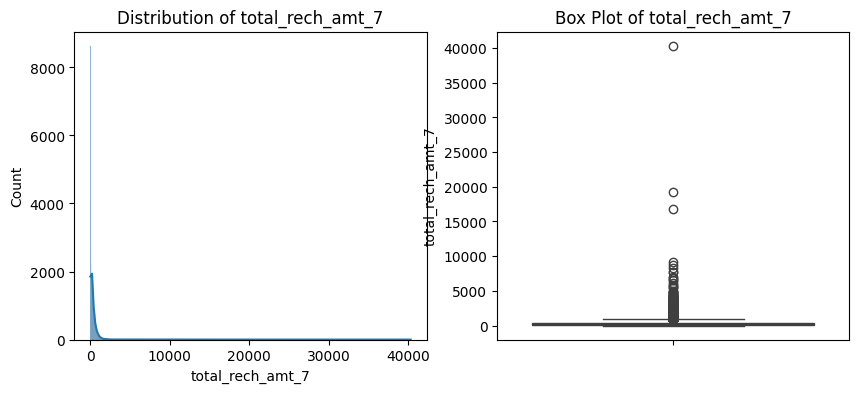

Column: total_ic_mou_8, Missing Data: 0.00%


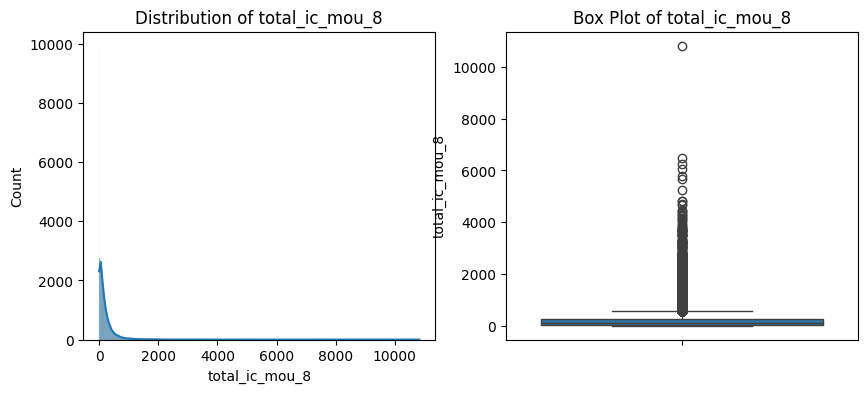

Column: total_ic_mou_7, Missing Data: 0.00%


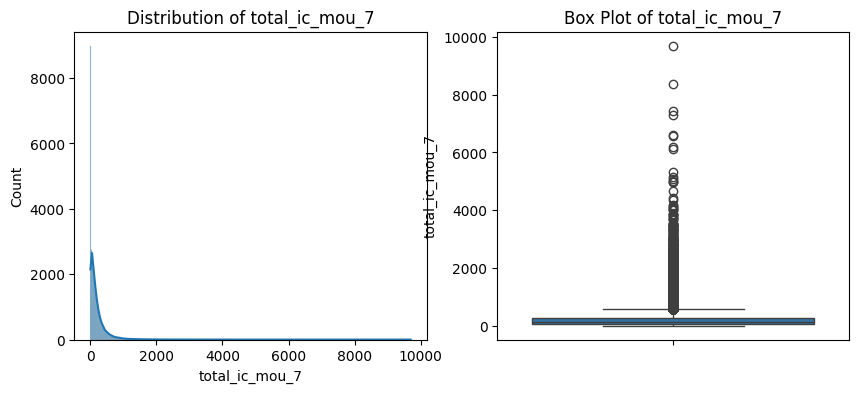

Column: total_ic_mou_6, Missing Data: 0.00%


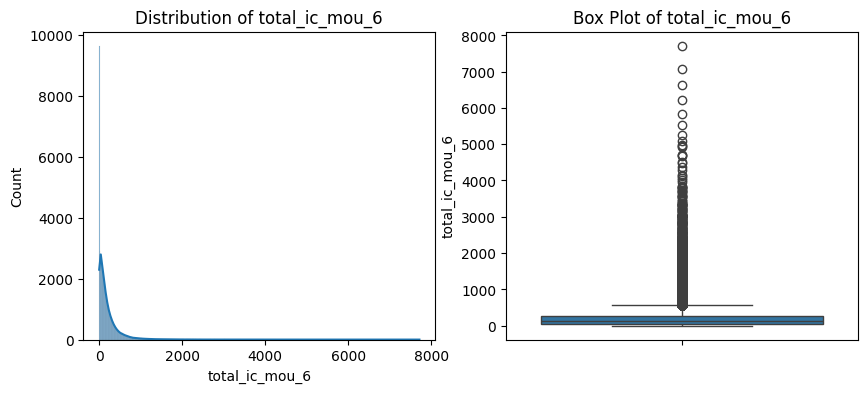

Column: total_og_mou_8, Missing Data: 0.00%


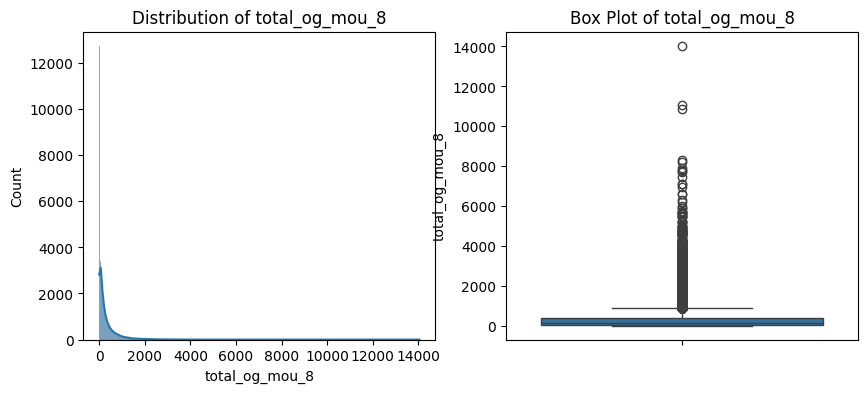

Column: total_og_mou_7, Missing Data: 0.00%


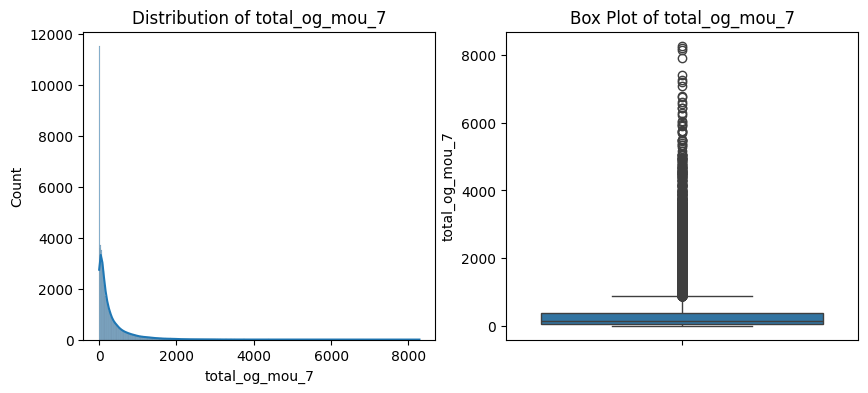

Column: total_og_mou_6, Missing Data: 0.00%


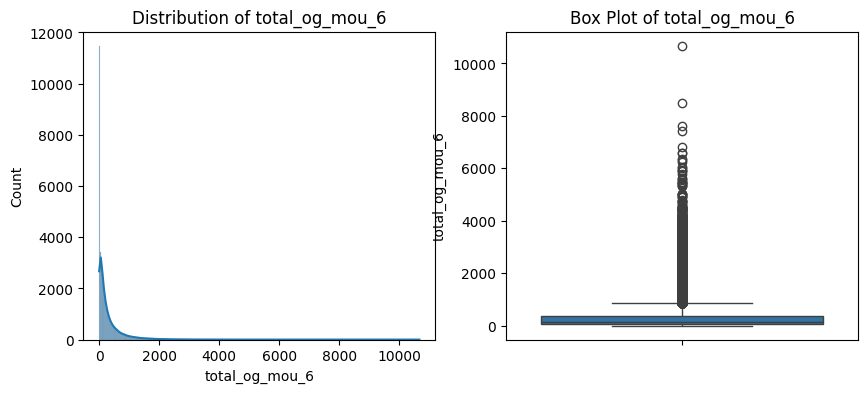

Column: offnet_mou_8, Missing Data: 0.00%


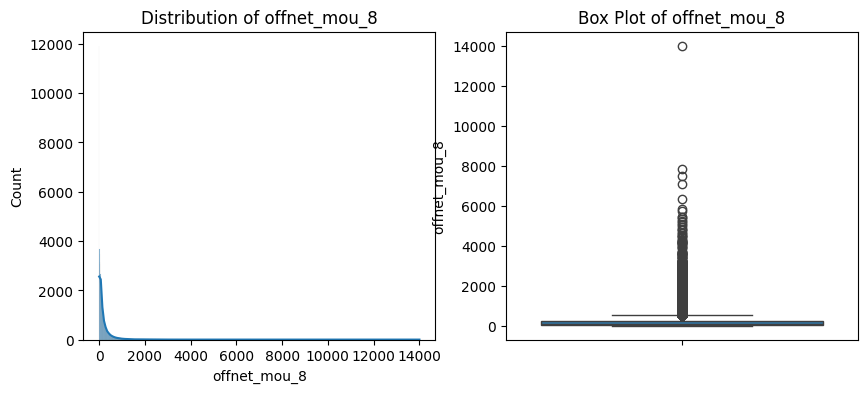

Column: offnet_mou_6, Missing Data: 0.00%


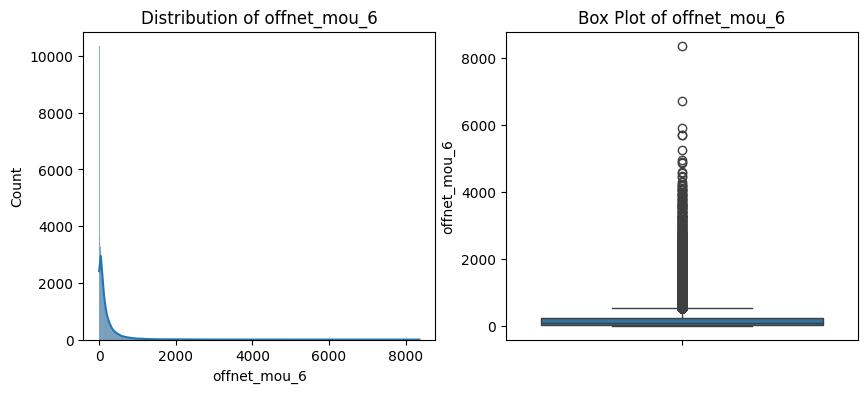

Column: offnet_mou_7, Missing Data: 0.00%


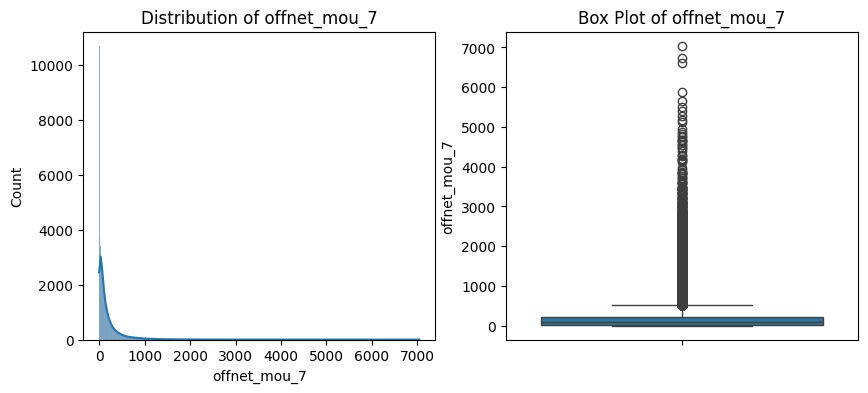

Column: vol_3g_mb_7, Missing Data: 0.00%


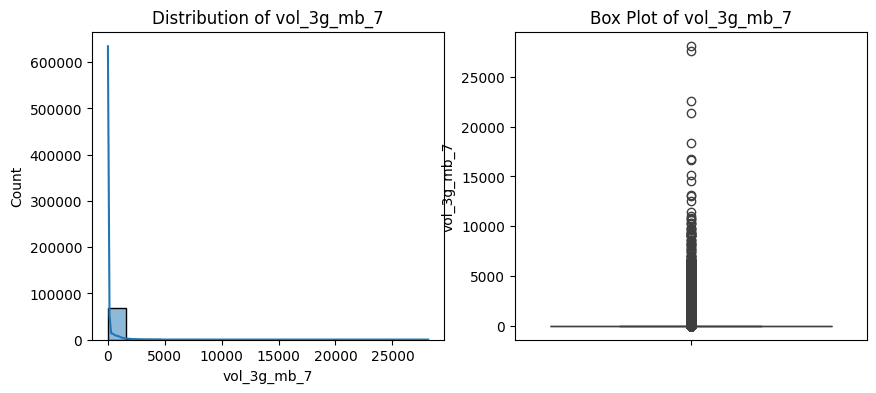

Column: vol_3g_mb_8, Missing Data: 0.00%


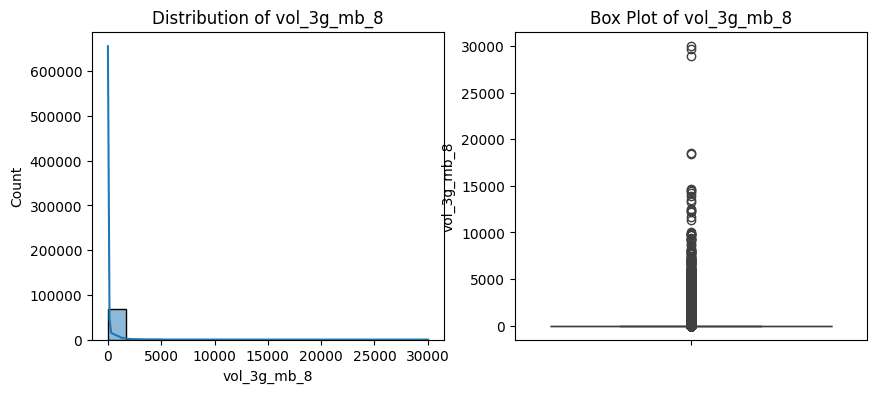

Column: vol_3g_mb_6, Missing Data: 0.00%


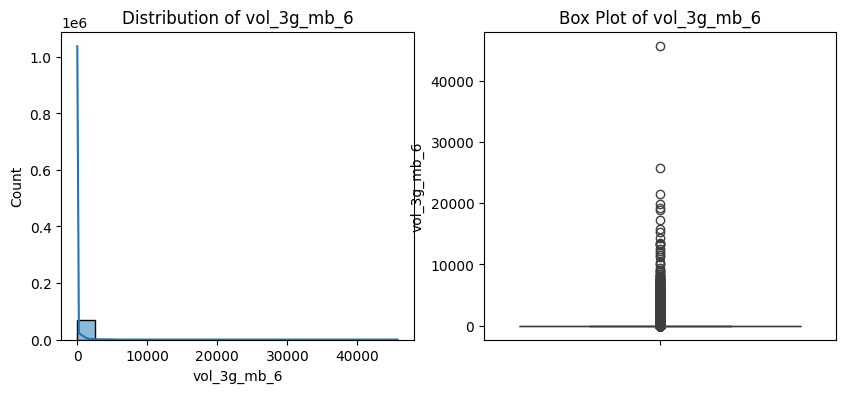

Column: vol_2g_mb_8, Missing Data: 0.00%


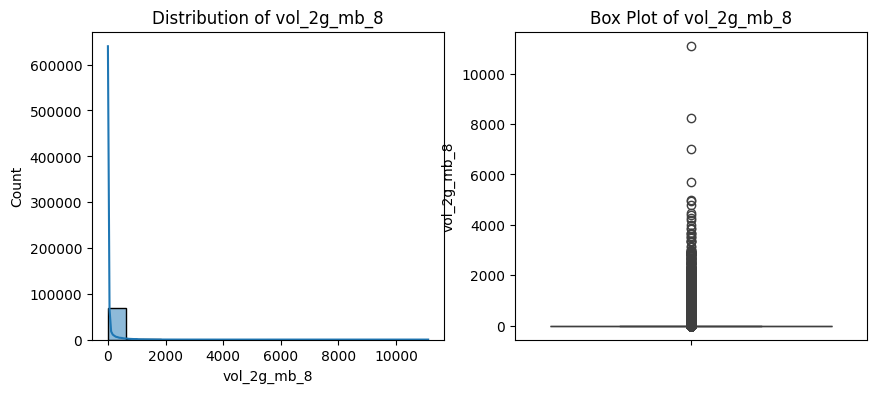

Column: vol_2g_mb_7, Missing Data: 0.00%


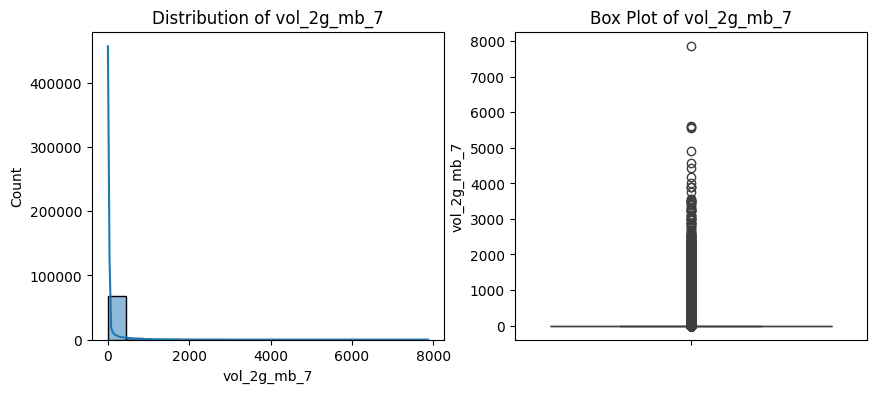

Column: vol_2g_mb_6, Missing Data: 0.00%


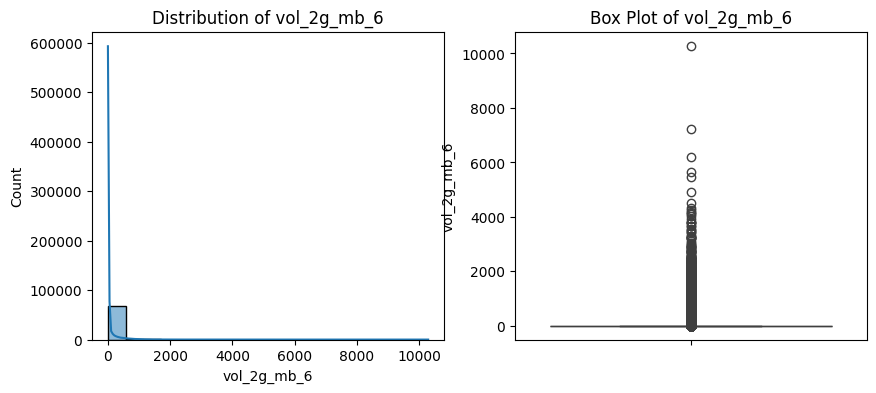

Column: aon, Missing Data: 0.00%


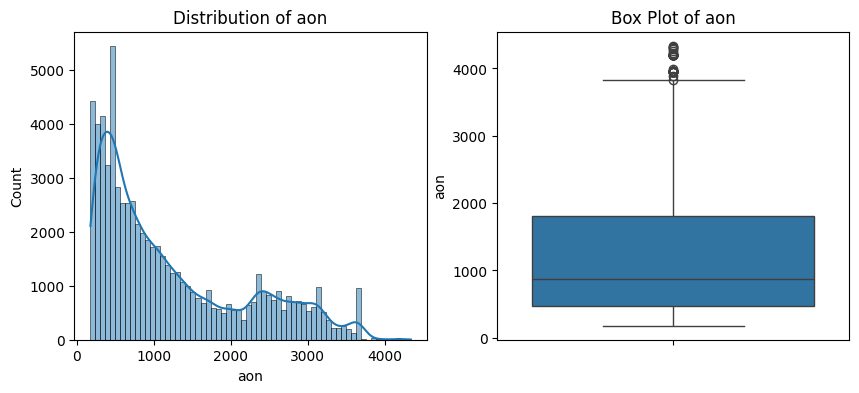

Column: arpu_6, Missing Data: 0.00%


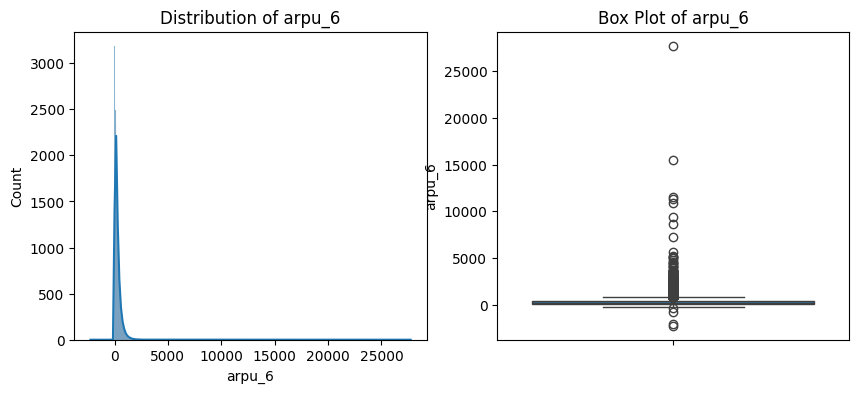

Column: arpu_7, Missing Data: 0.00%


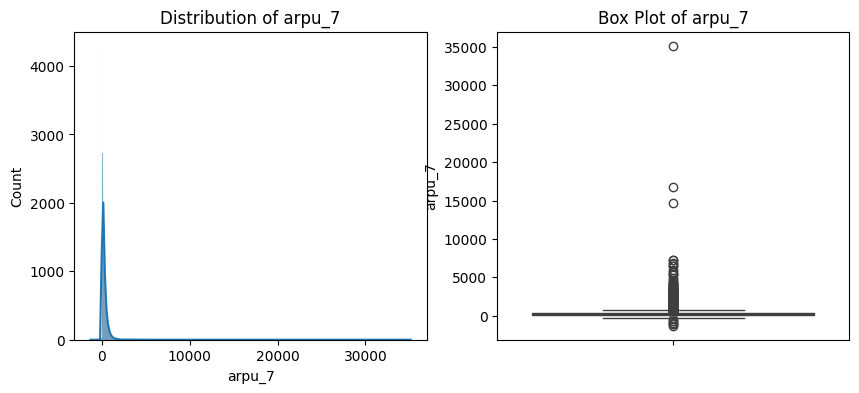

Column: arpu_8, Missing Data: 0.00%


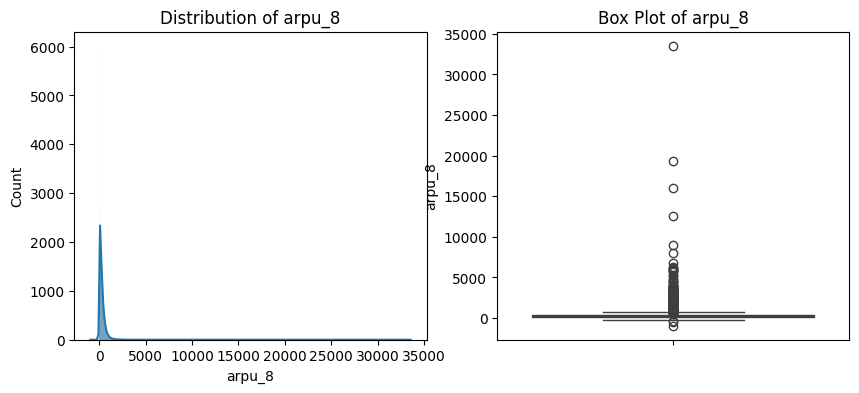

Column: total_rech_amt_6, Missing Data: 0.00%


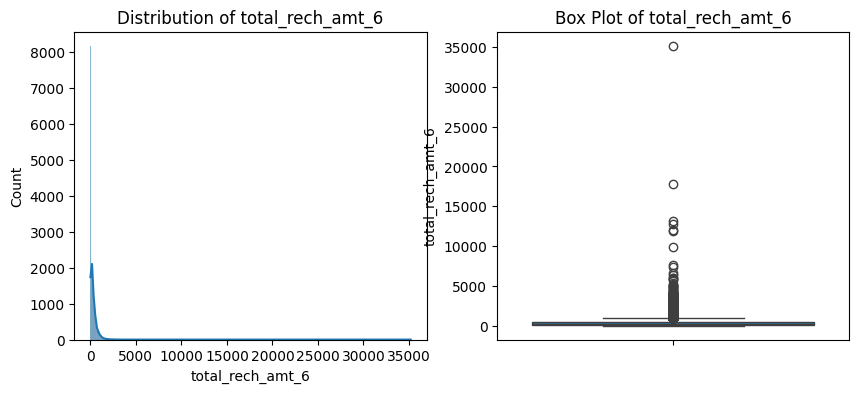

Column: total_rech_amt_7, Missing Data: 0.00%


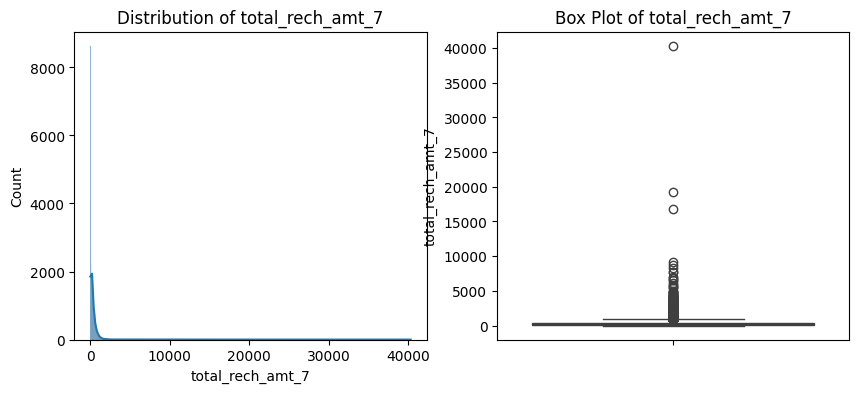

Column: total_rech_amt_8, Missing Data: 0.00%


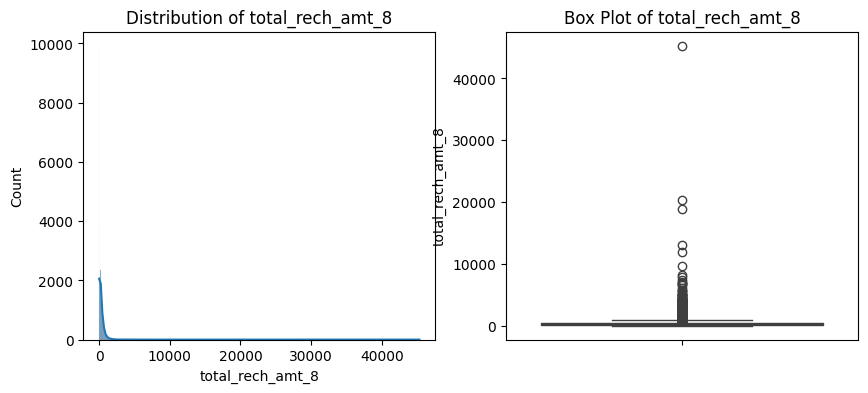

Column: rech_diff_6_8, Missing Data: 0.00%


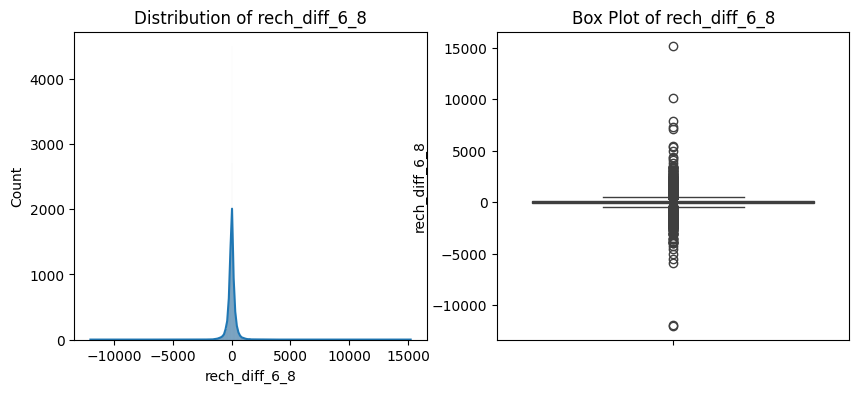

Column: arpu_diff_6_8, Missing Data: 0.00%


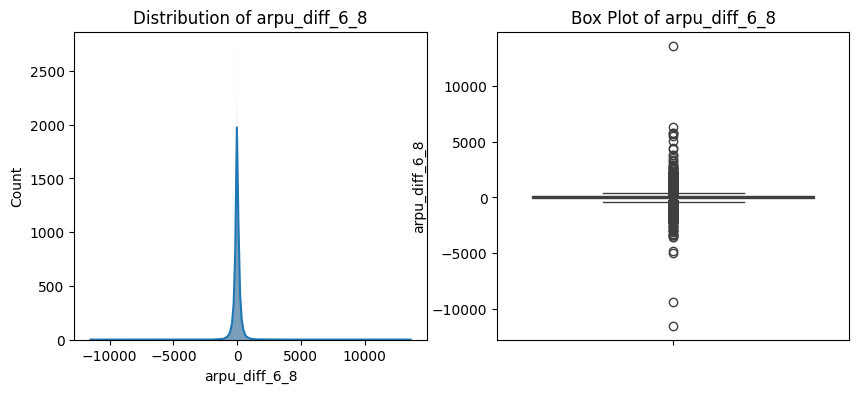

Column: og_mou_diff_6_8, Missing Data: 0.00%


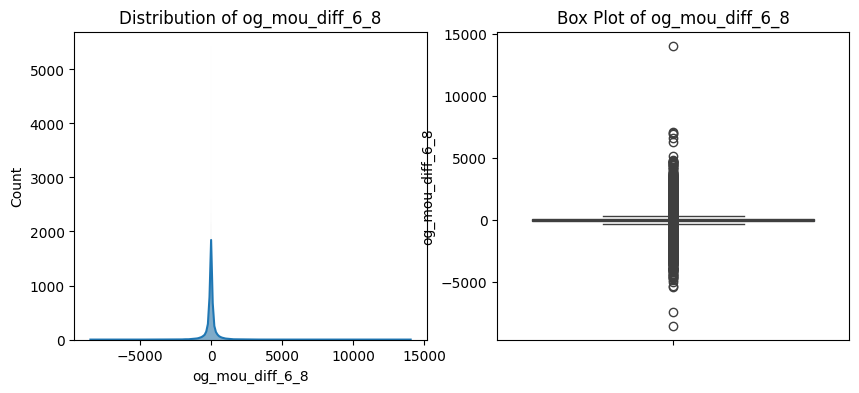

Column: churn_probability, Missing Data: 0.00%


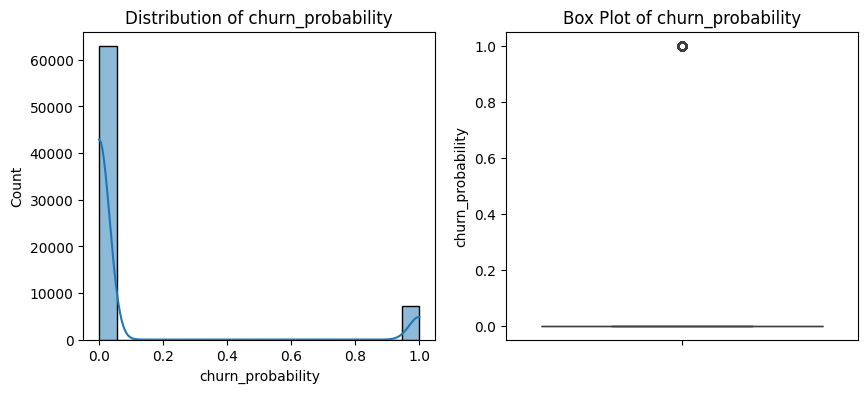

Column: night_pck_user_6, Missing Data: 0.00%


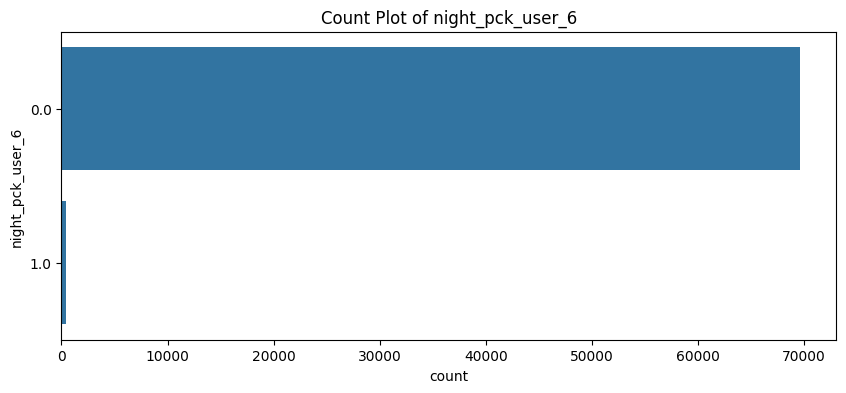

Column: night_pck_user_7, Missing Data: 0.00%


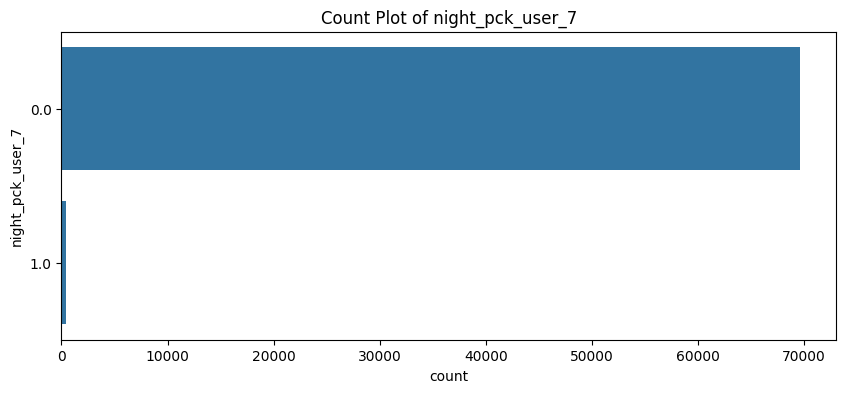

Column: night_pck_user_8, Missing Data: 0.00%


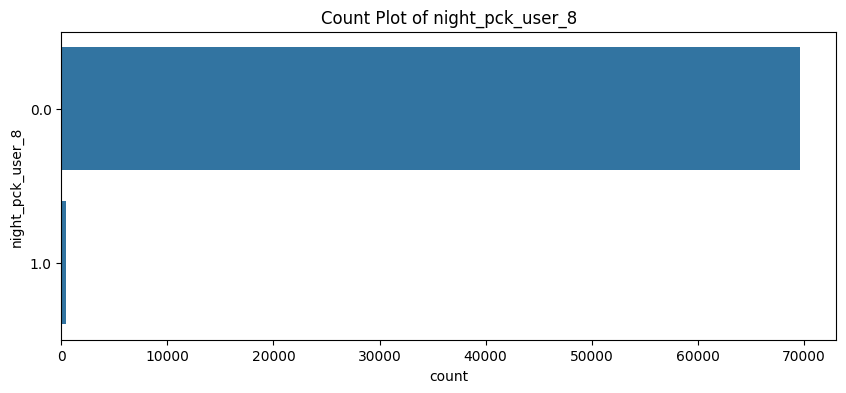

Column: fb_user_6, Missing Data: 0.00%


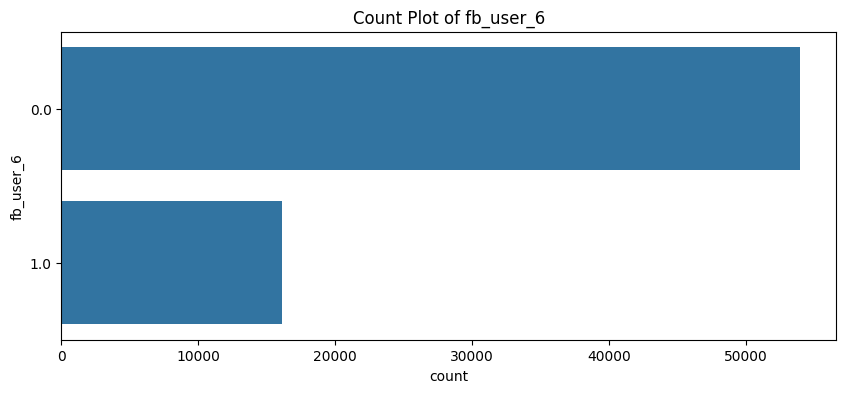

Column: fb_user_7, Missing Data: 0.00%


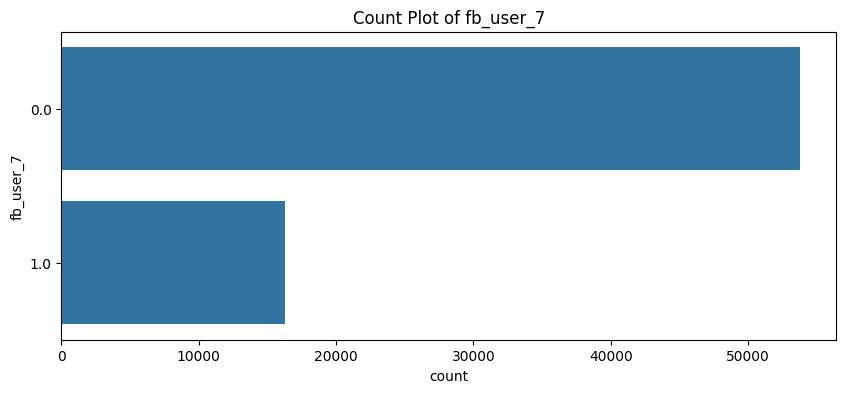

Column: fb_user_8, Missing Data: 0.00%


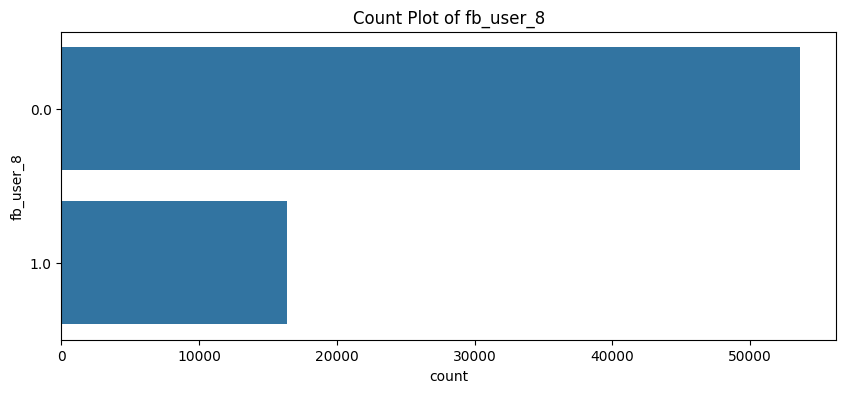

Column: month_present_7, Missing Data: 0.00%


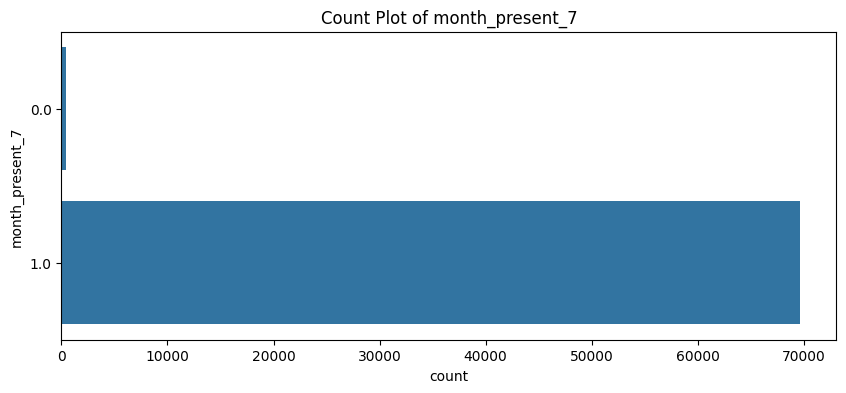

Column: month_present_8, Missing Data: 0.00%


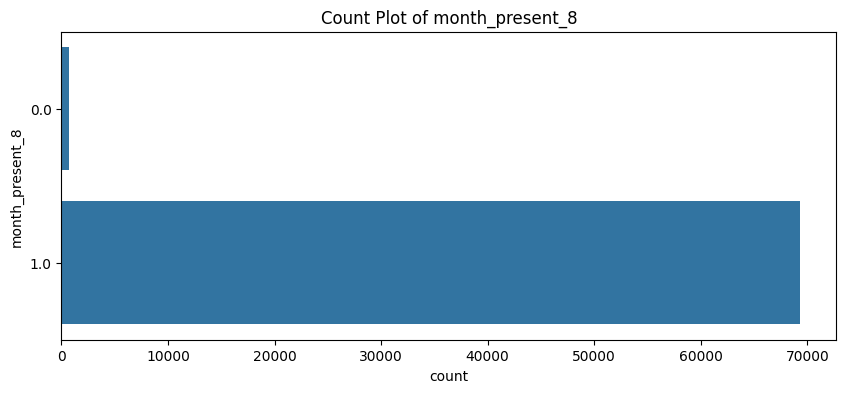

In [114]:

def univariate_analysis(df, column_list, plot_type='numerical'):
    """
    Perform univariate analysis for the specified columns in the DataFrame.

    Parameters:
    - df: DataFrame, the DataFrame containing the data.
    - column_list: list, a list of column names to perform analysis on.
    - plot_type: str, optional, the type of plot to generate, either 'numerical' for numerical columns
                 or 'categorical' for categorical columns. Default is 'numerical'.
    """
    for column in column_list:
        if column not in df.columns:
            print(f"Column {column} not found in dataframe.")
            continue

        # Calculate the percentage of missing data in the column
        missing_percentage = df[column].isna().sum() / len(df) * 100
        print(f"Column: {column}, Missing Data: {missing_percentage:.2f}%")

        # Proceed with plotting if missing data percentage is less than 30%
        if missing_percentage < 30:
            plt.figure(figsize=(10, 4))

            if plot_type == 'numerical':
                # Plot distribution and box plot for numerical data
                plt.subplot(1, 2, 1)
                sns.histplot(df[column].dropna(), kde=True)
                plt.title(f'Distribution of {column}')

                plt.subplot(1, 2, 2)
                sns.boxplot(y=df[column].dropna())
                plt.title(f'Box Plot of {column}')
            elif plot_type == 'categorical':
                # Plot count plot for categorical data
                sns.countplot(y=df[column].dropna())
                plt.title(f'Count Plot of {column}')
            
            plt.show()
        else:
            # Skip plotting if missing data percentage is high
            print(f"Skipping {column} due to high percentage of missing data.")

# Perform univariate analysis for numerical columns
univariate_analysis(df_refined_1, numeric_cols, plot_type='numerical')

# Perform univariate analysis for categorical columns
univariate_analysis(df_refined_1, categorical_cols, plot_type='categorical')

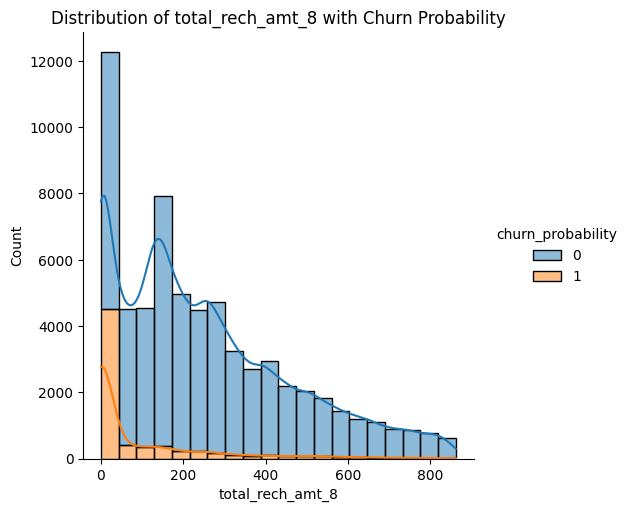

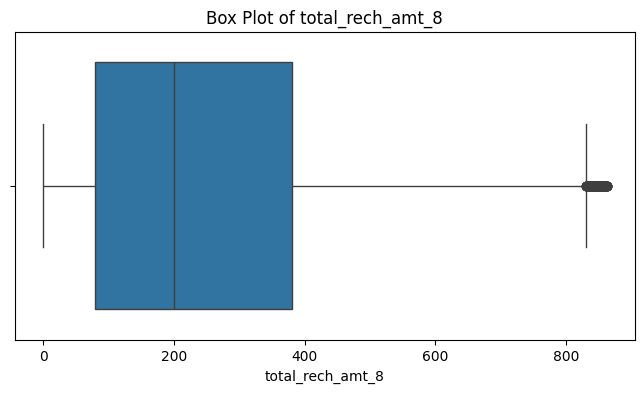

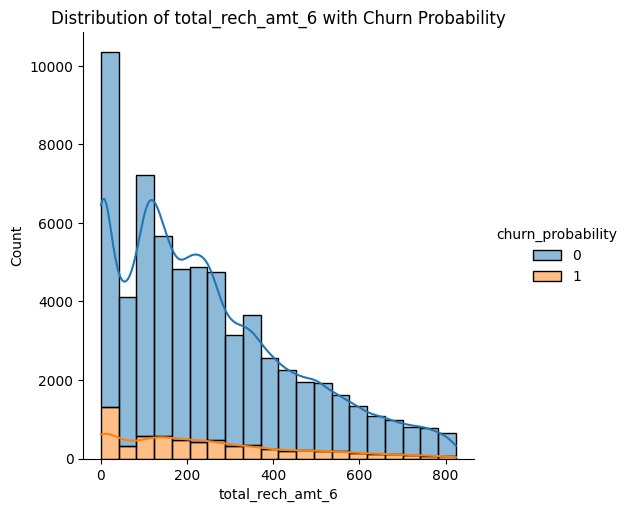

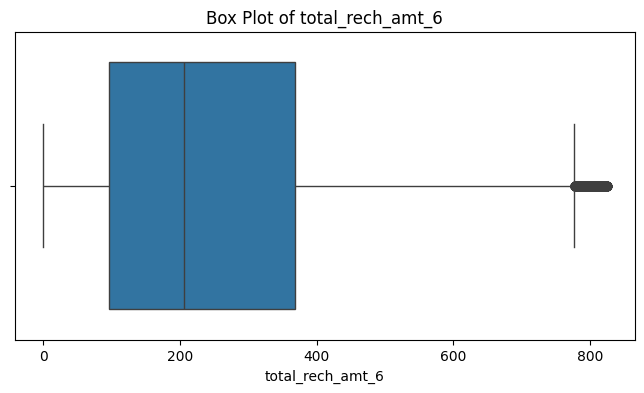

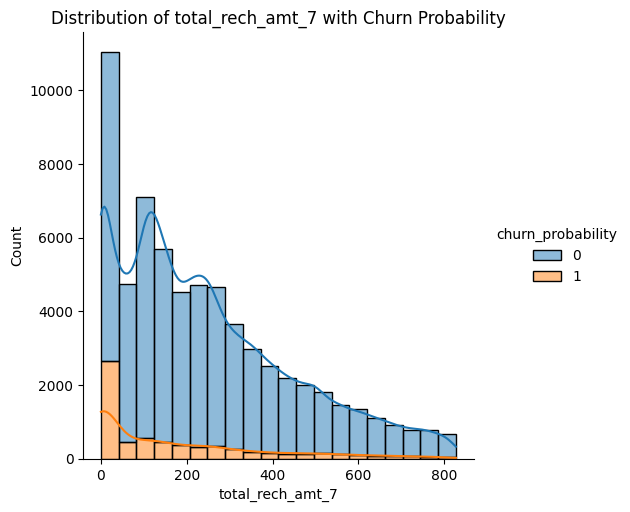

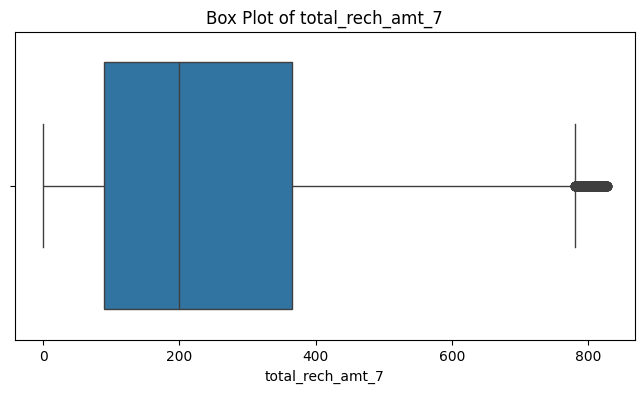

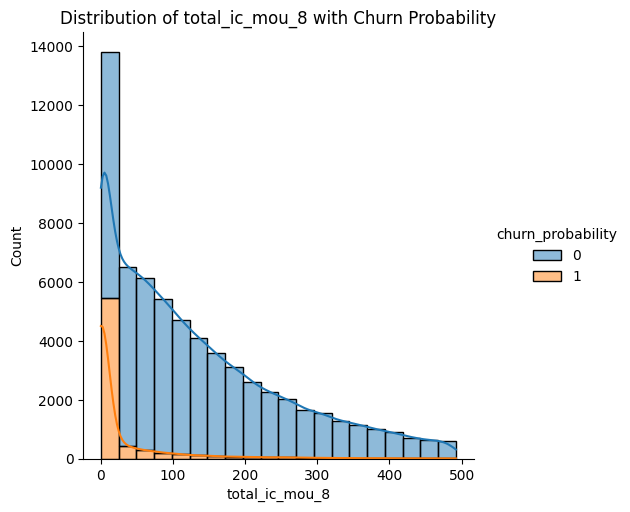

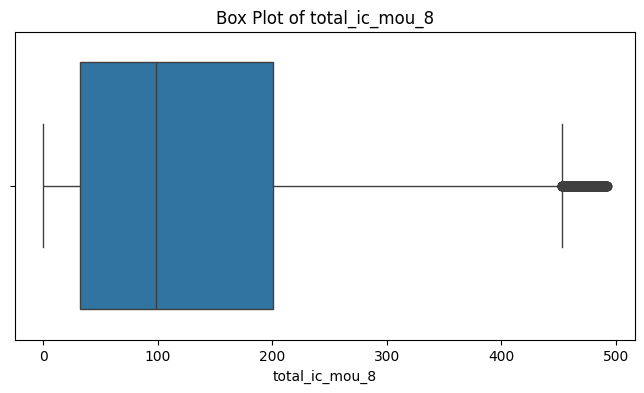

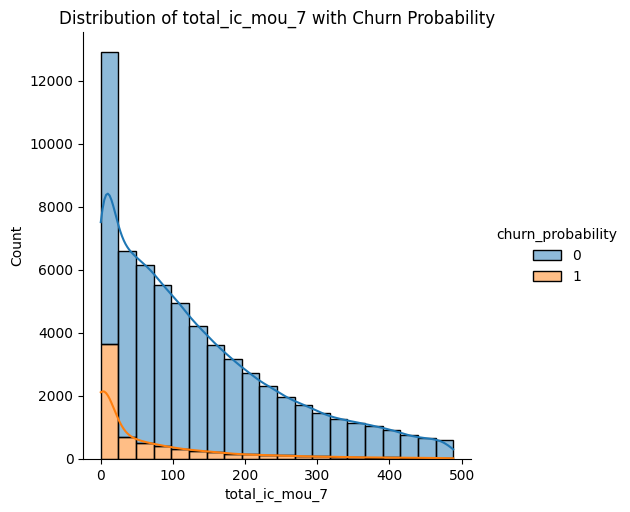

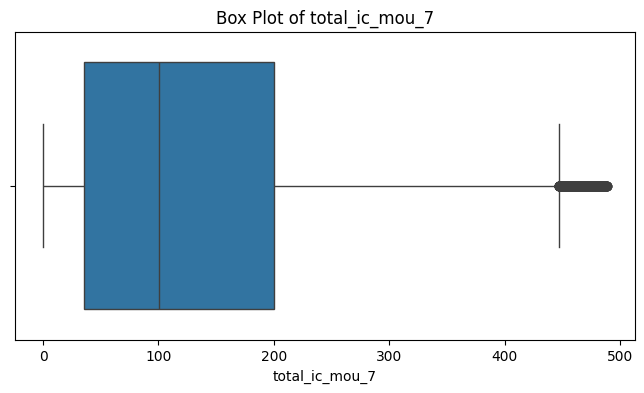

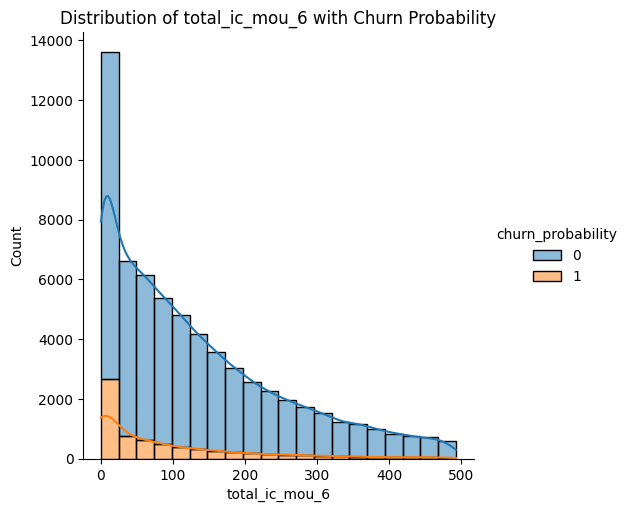

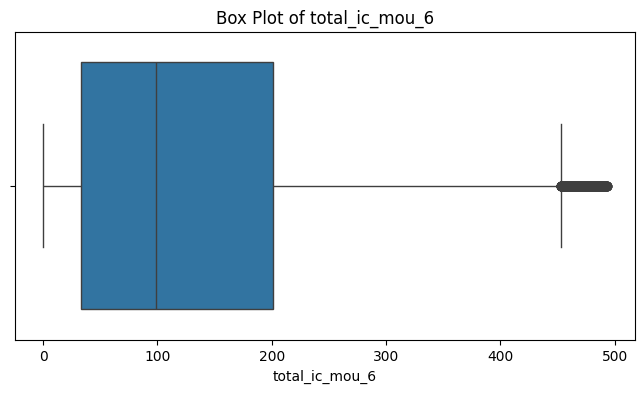

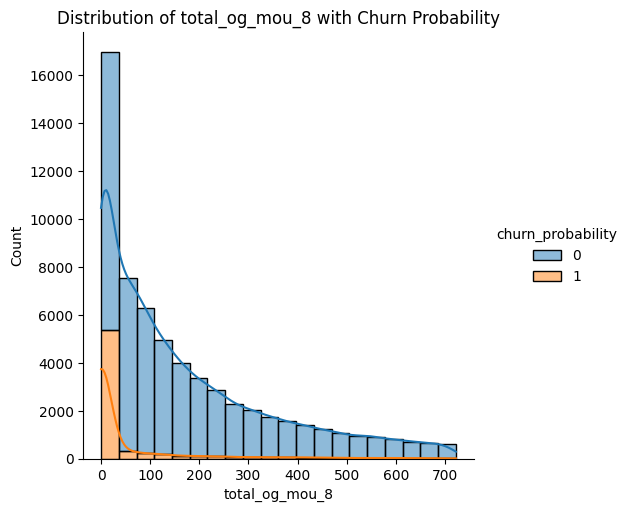

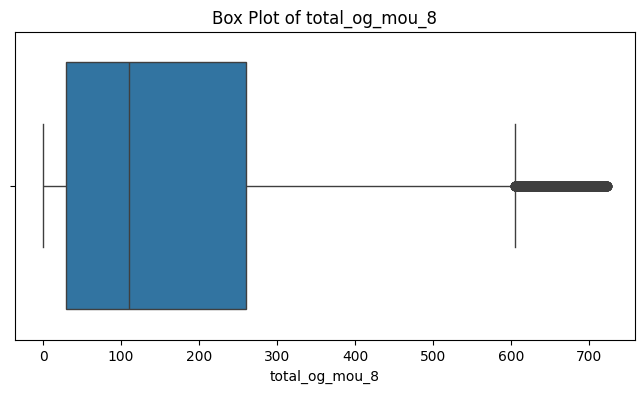

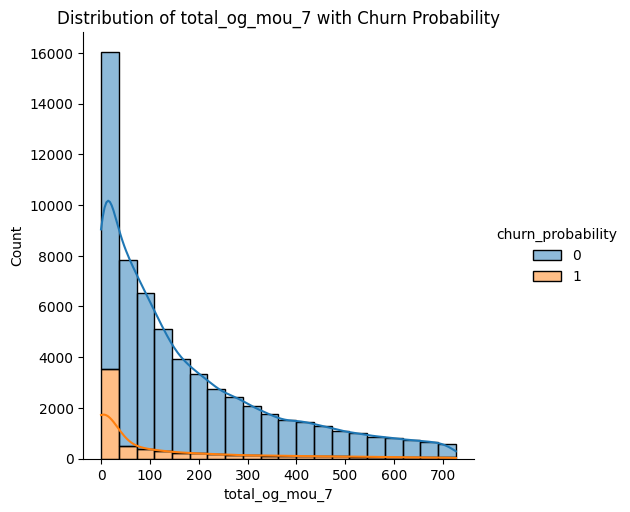

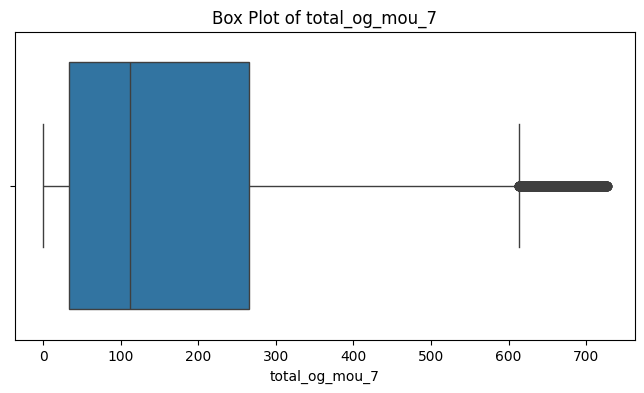

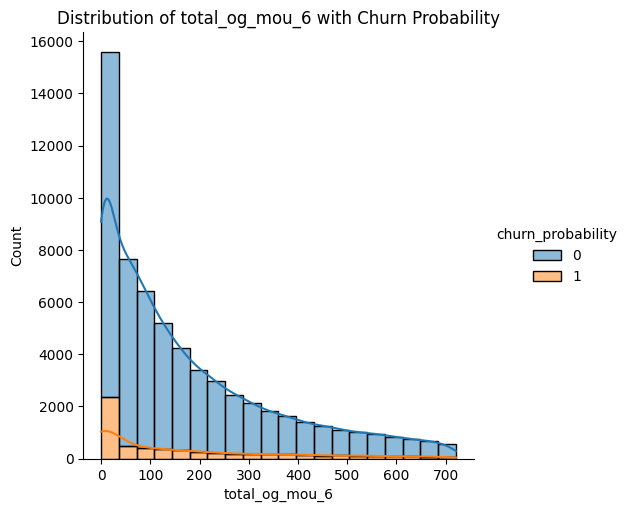

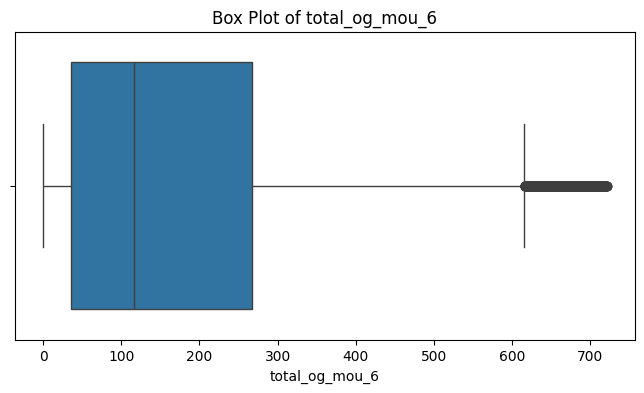

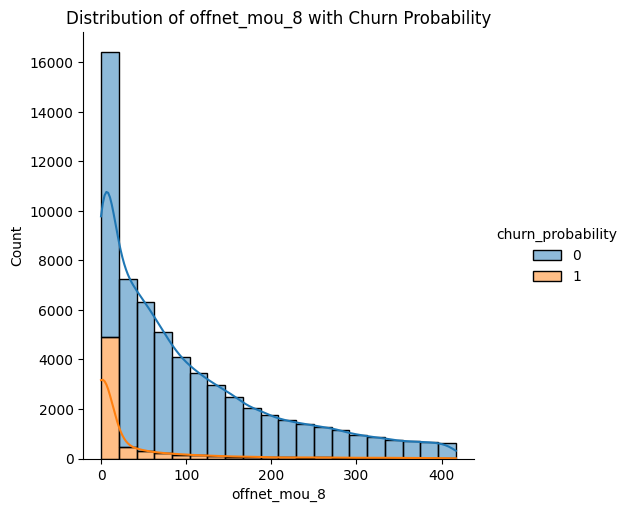

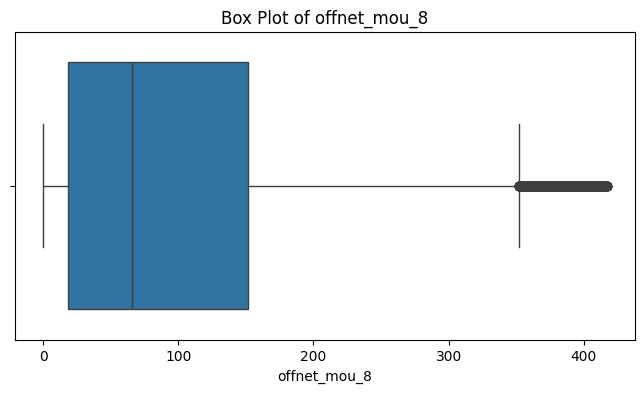

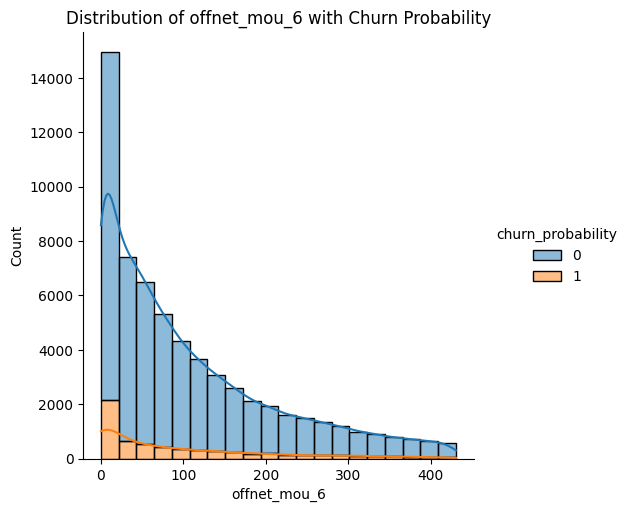

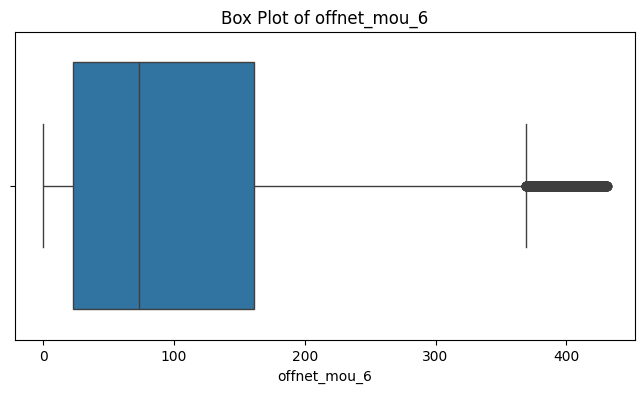

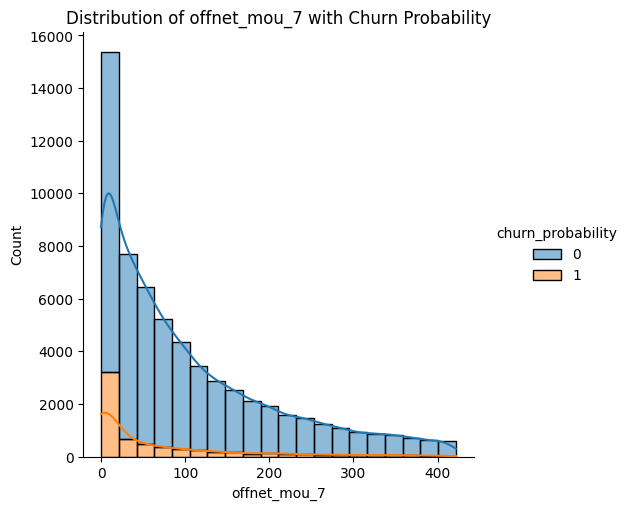

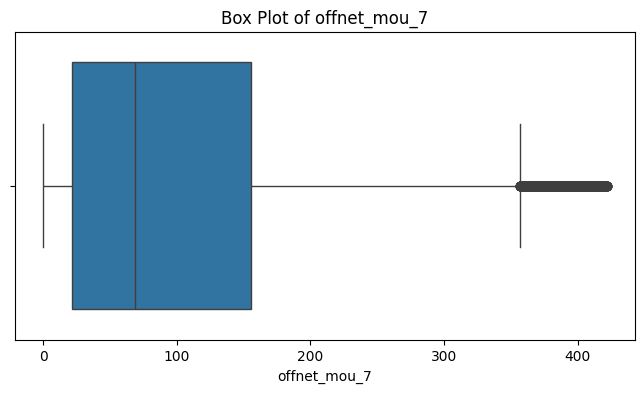

ValueError: `dataset` input should have multiple elements.

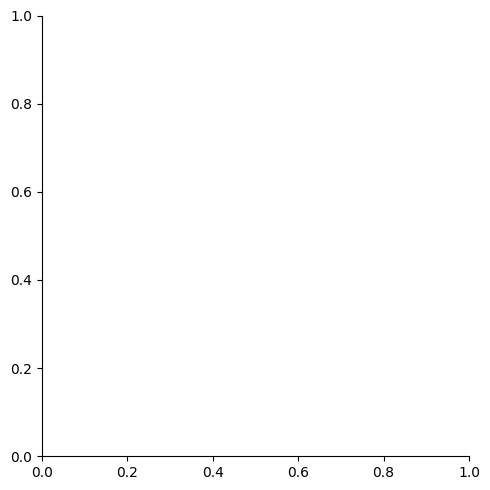

In [115]:
# Iterating over numerical columns for outlier analysis
for column_name in numeric_cols:
    arr = np.array(df_refined_1[column_name])
    uq = np.percentile(arr, 70)
    lq = np.percentile(arr, 20)
    iqr = uq - lq
    ul = uq + (1.5 * iqr)
    ll = lq - (1.5 * iqr)
    
    # Filtering data within upper and lower bounds
    filtered_data = df_refined_1[(df_refined_1[column_name] < ul) & (df_refined_1[column_name] > ll)]
    
    # Plotting distribution of filtered data with hue based on churn probability
    sns.displot(data=filtered_data, x=column_name, kde=True, hue='churn_probability', multiple='stack', bins=20)
    plt.xlabel(column_name)
    plt.title(f'Distribution of {column_name} with Churn Probability')
    plt.show()
    
    # Plotting boxplot to identify outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=column_name, data=filtered_data)
    plt.xlabel(column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.show()

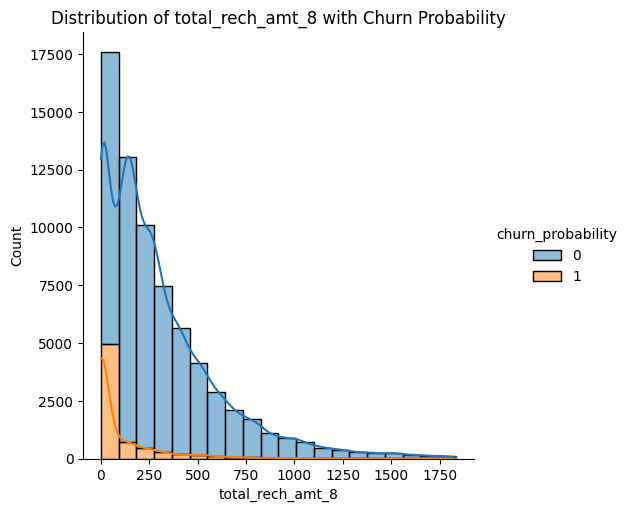

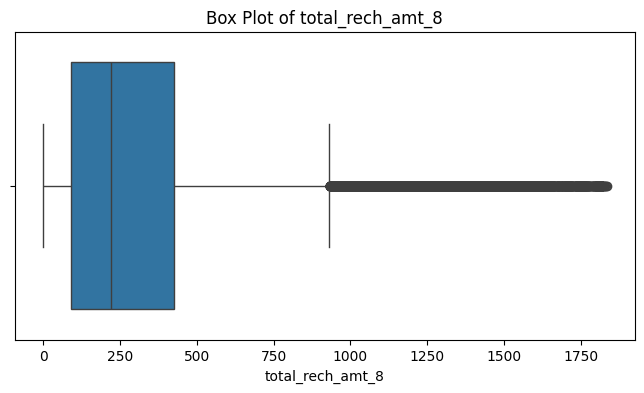

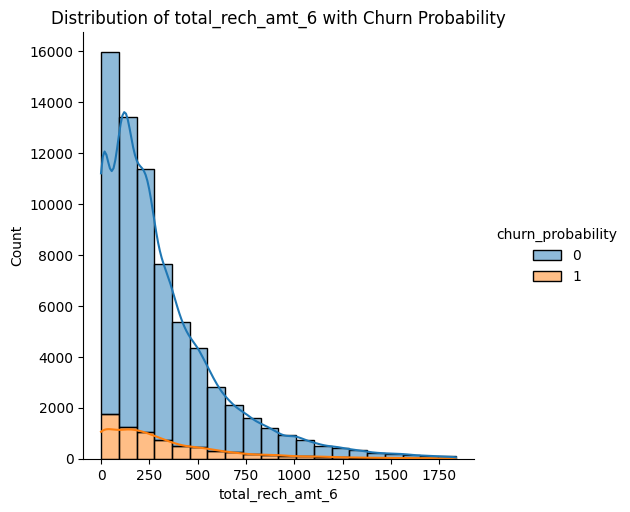

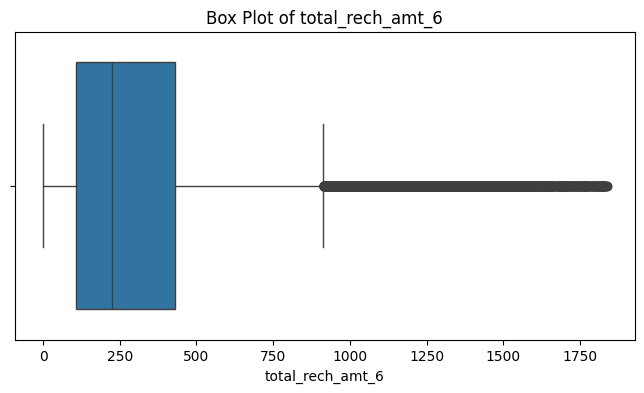

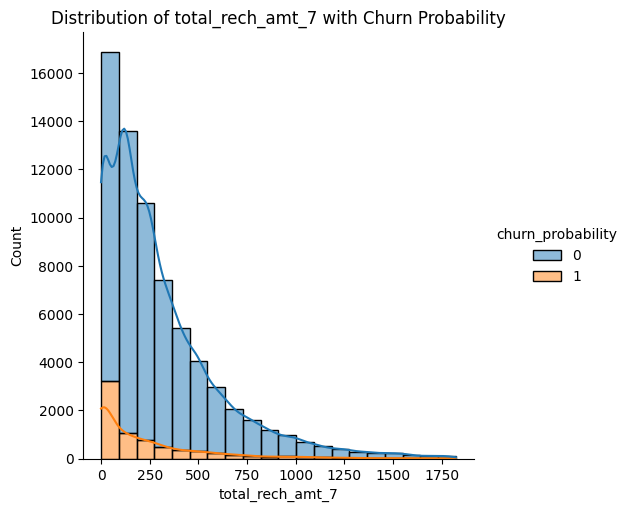

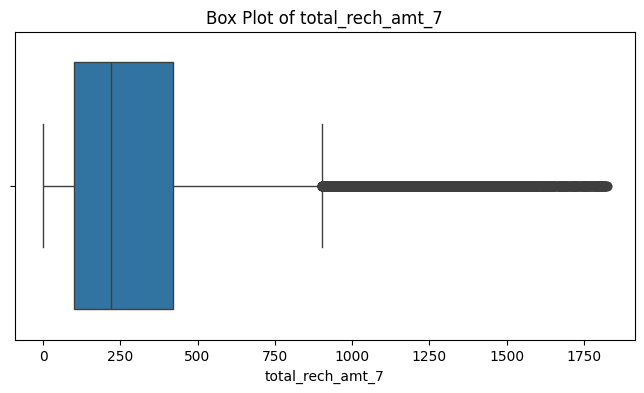

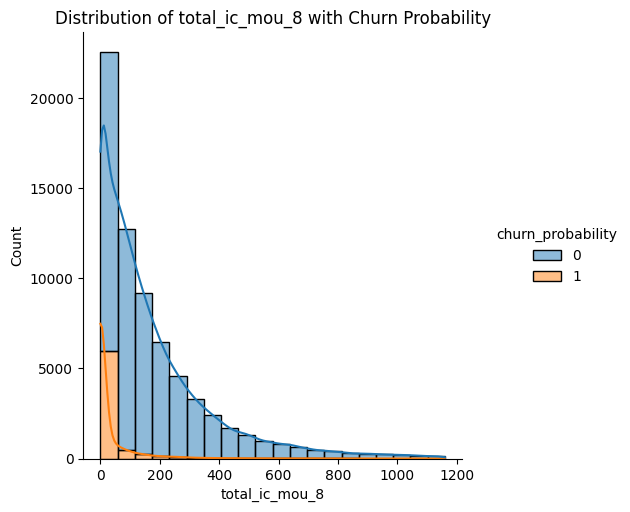

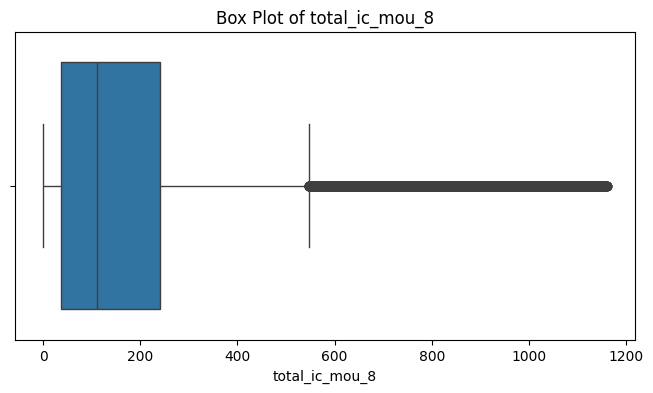

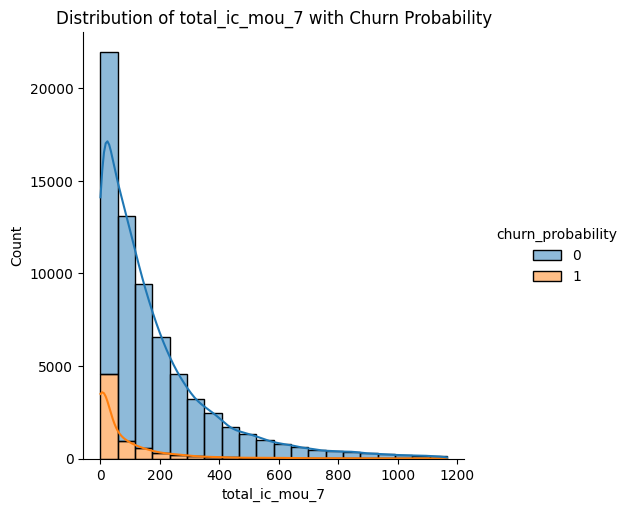

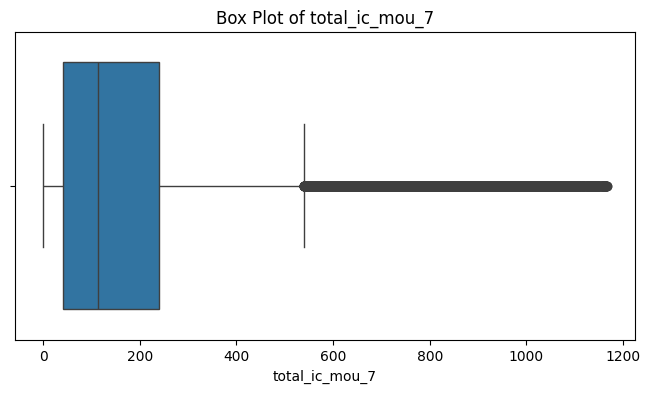

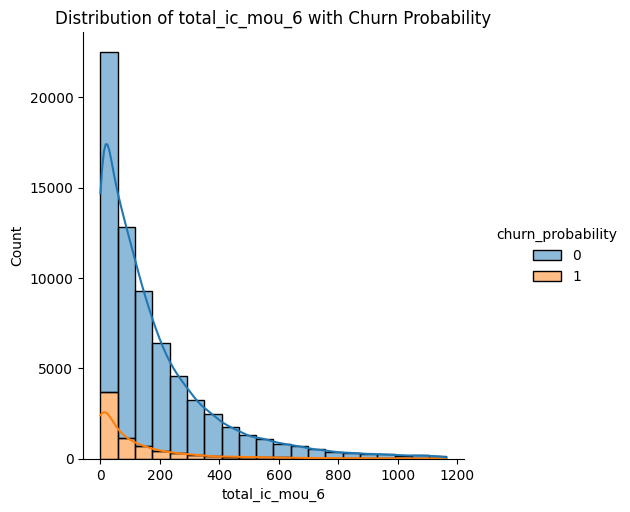

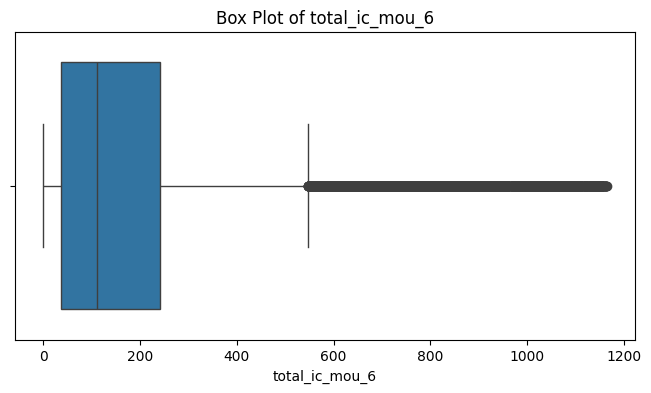

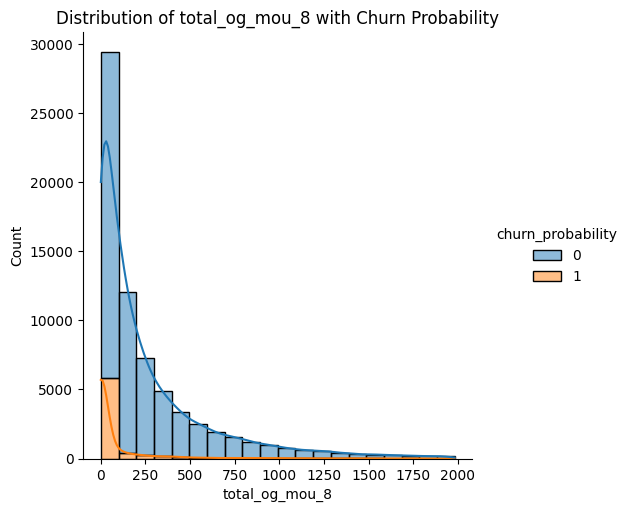

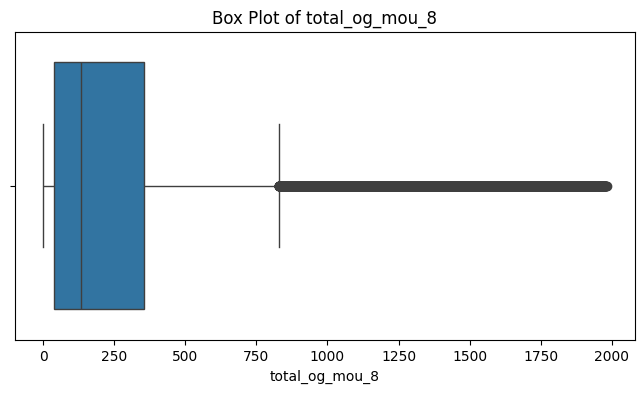

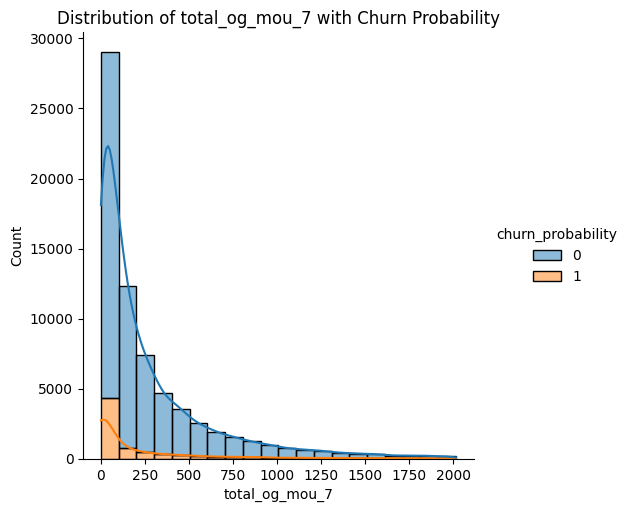

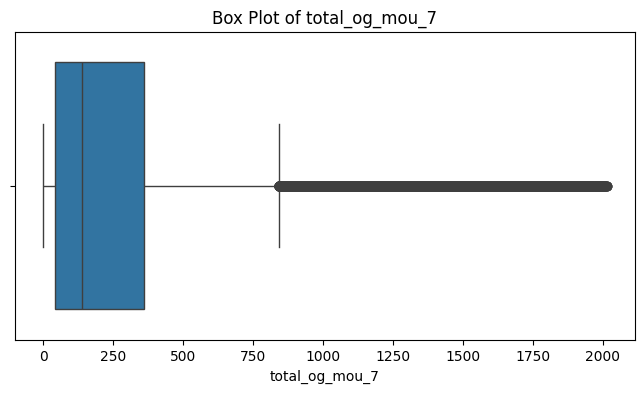

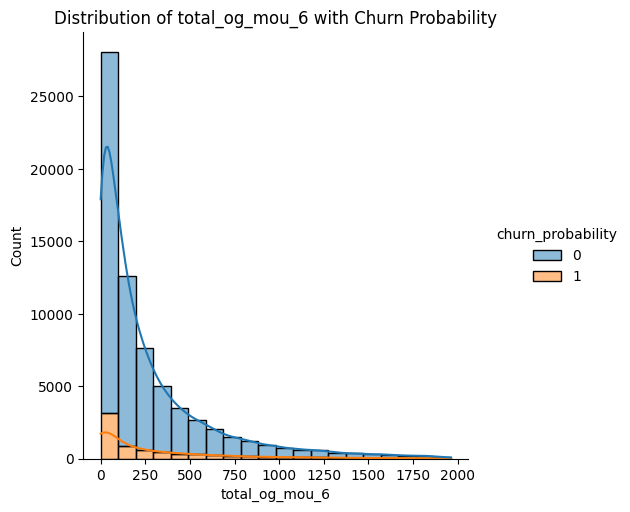

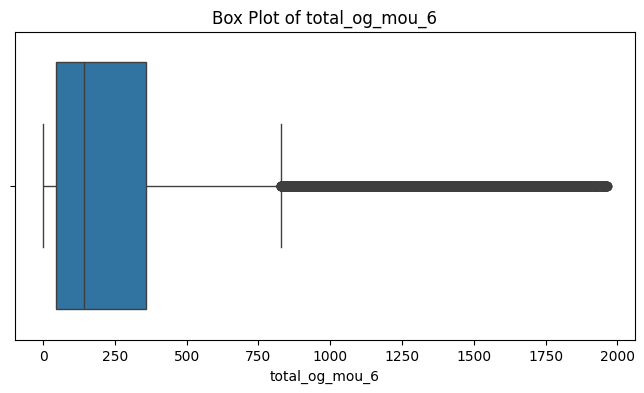

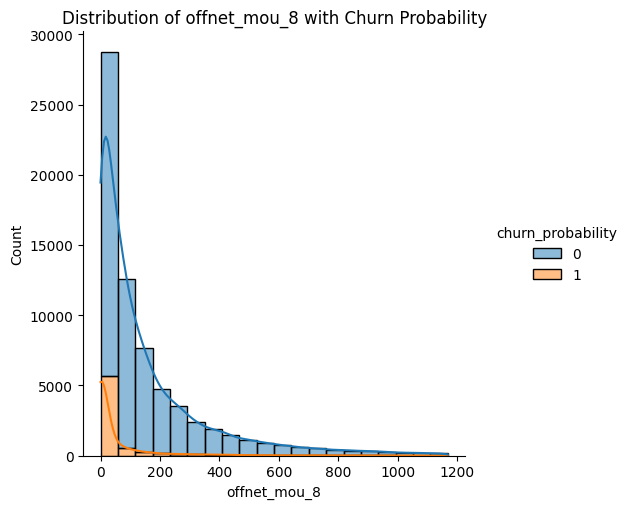

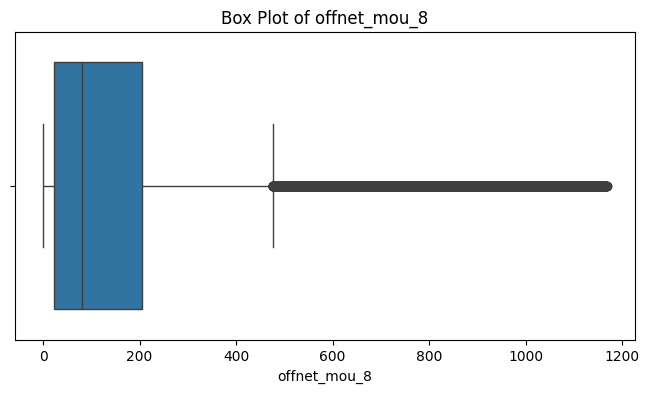

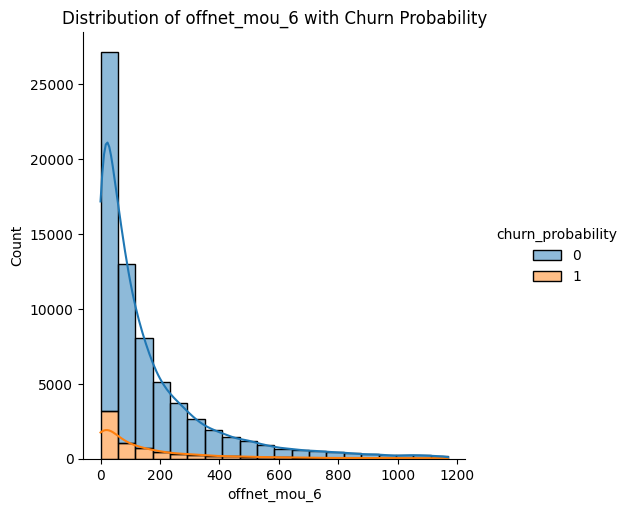

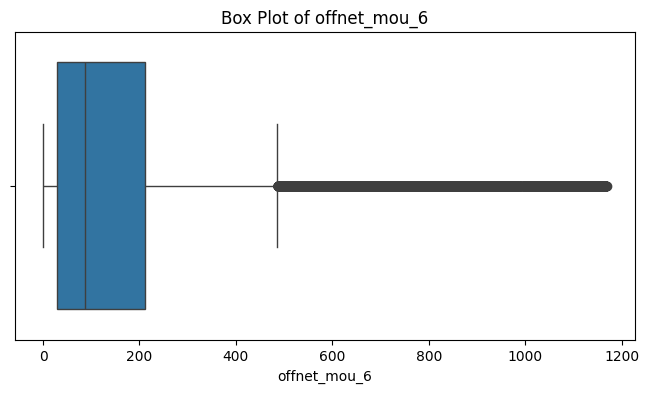

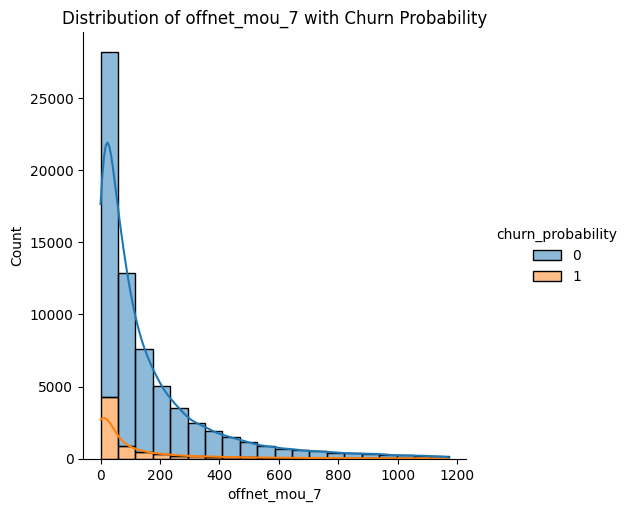

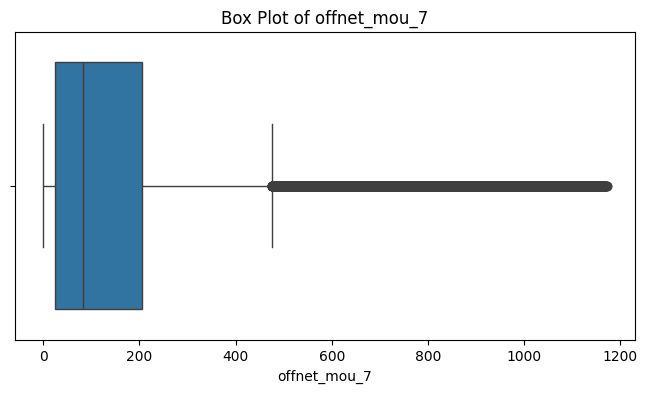

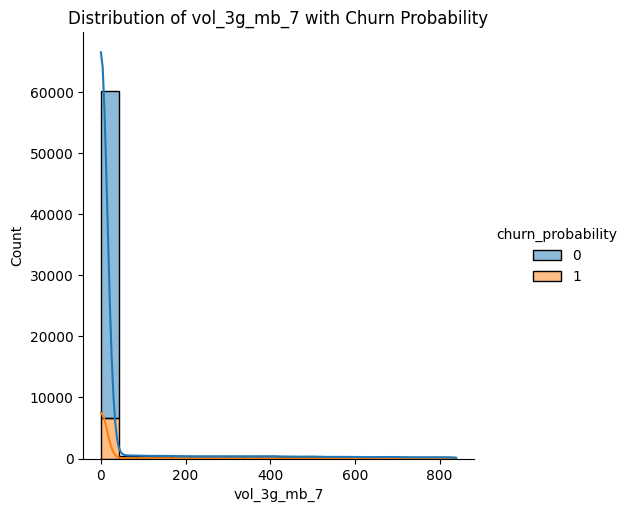

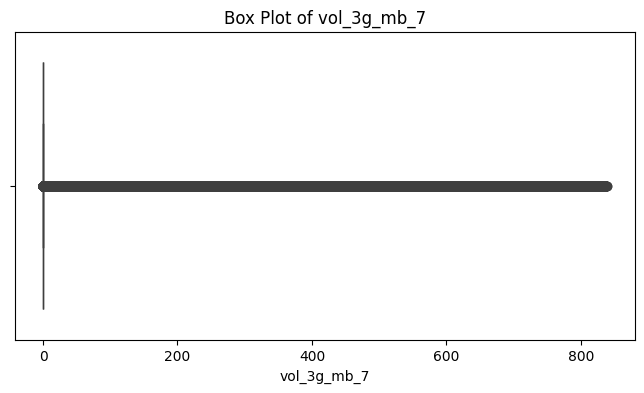

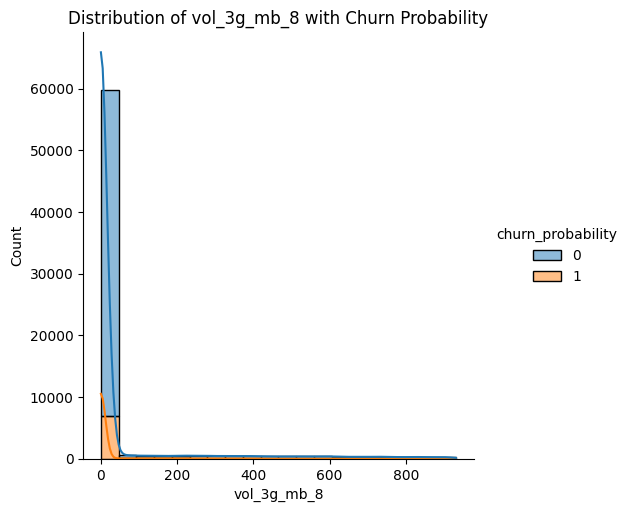

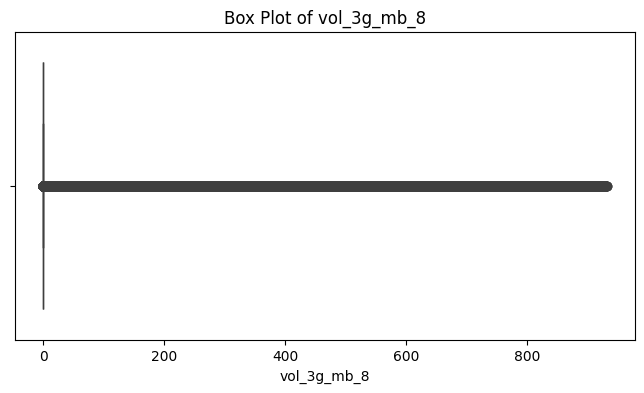

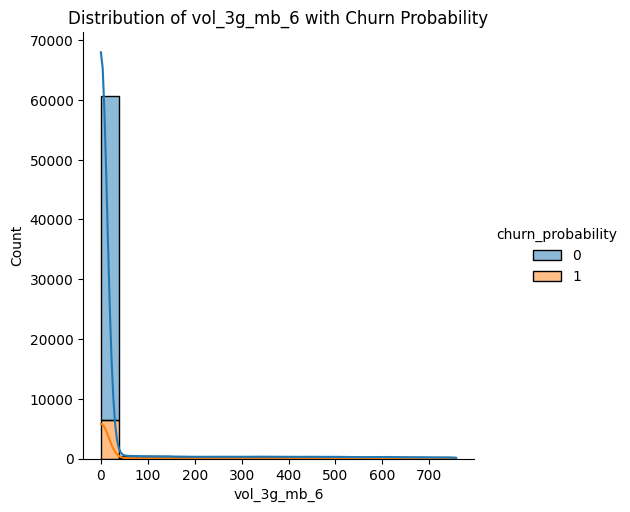

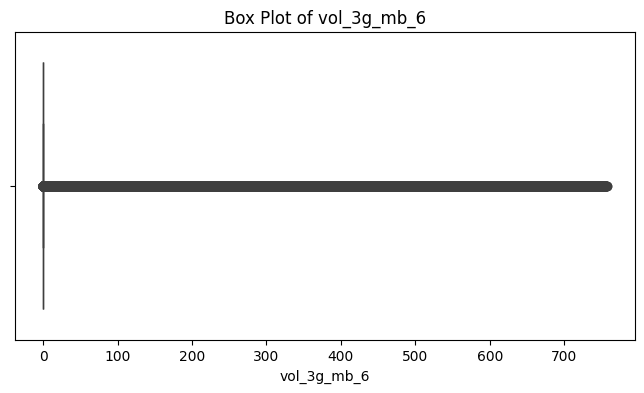

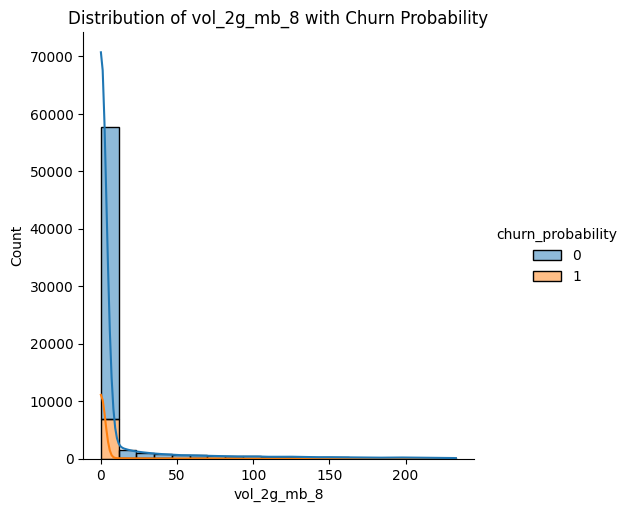

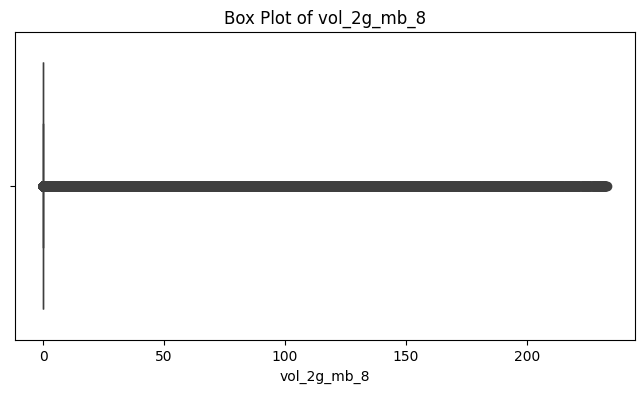

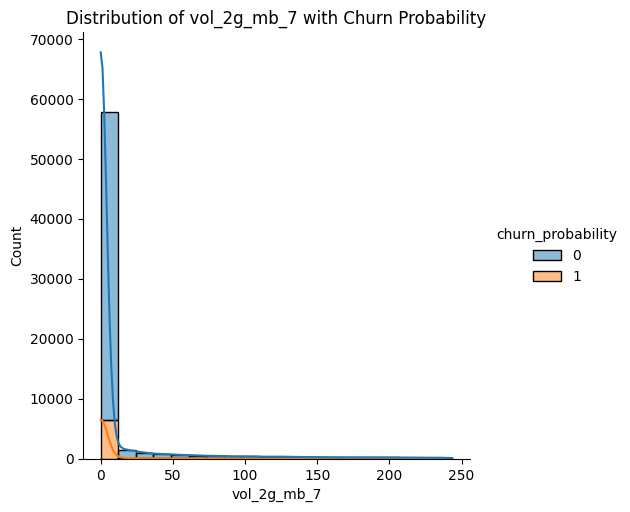

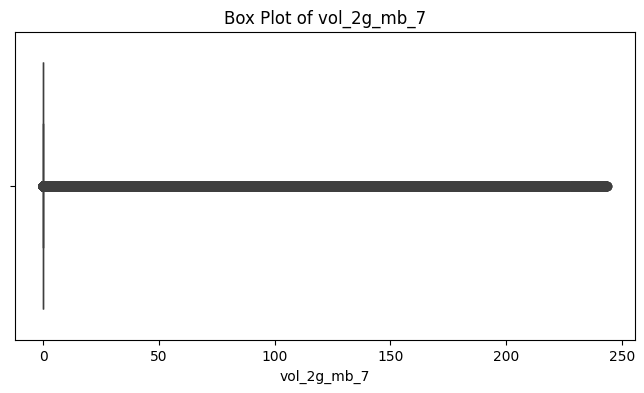

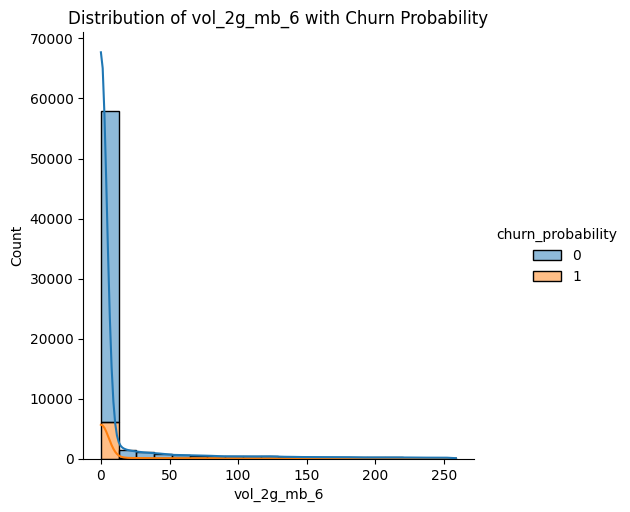

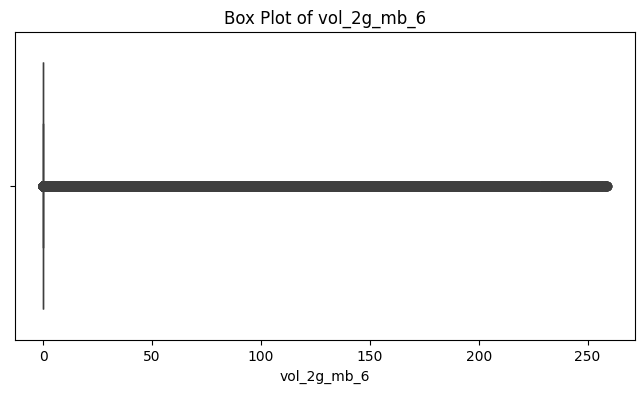

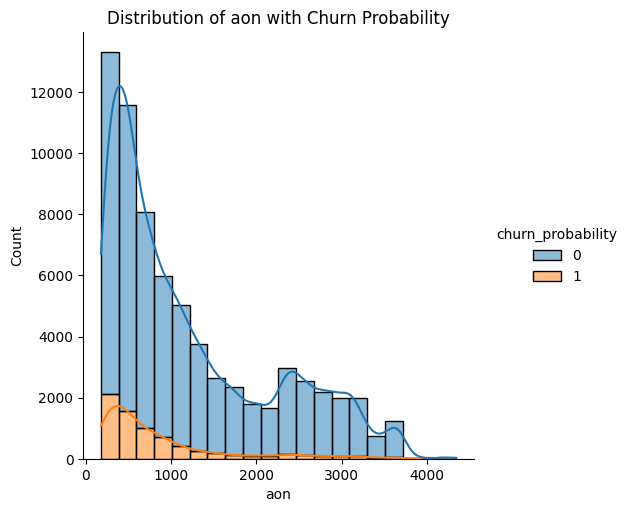

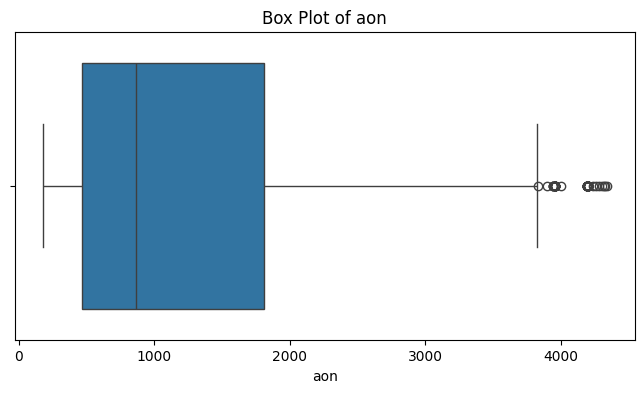

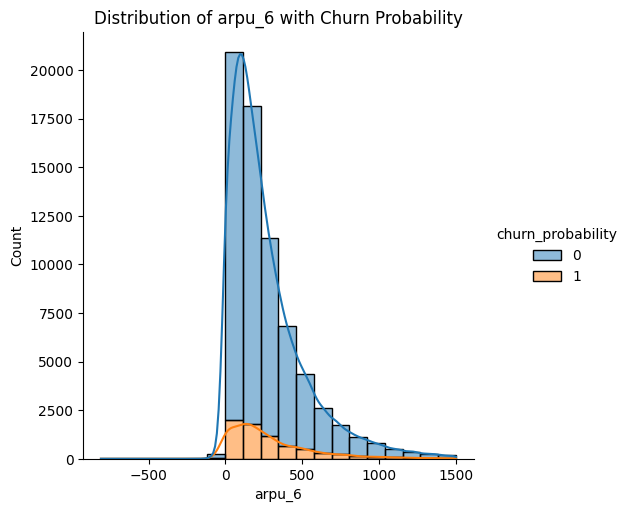

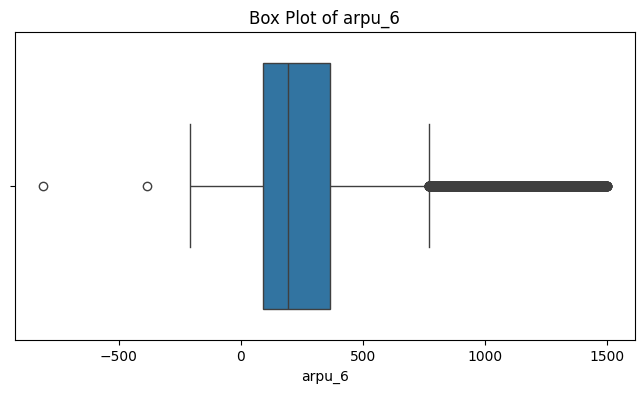

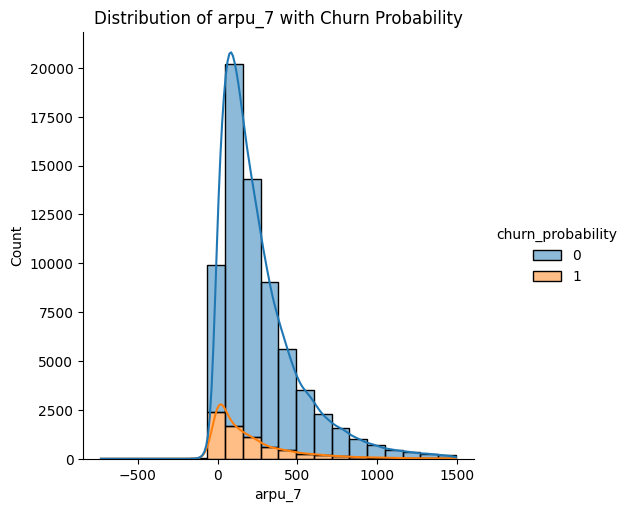

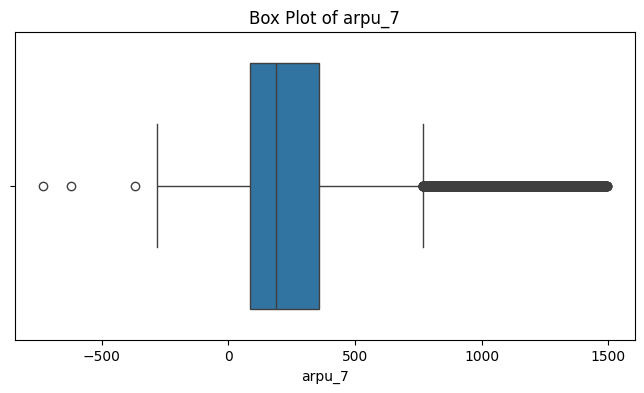

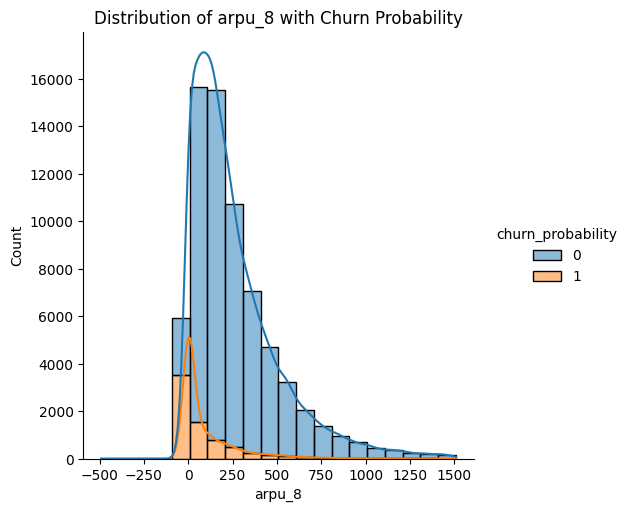

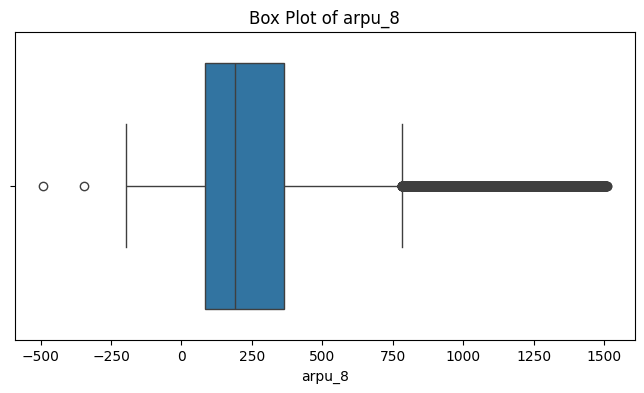

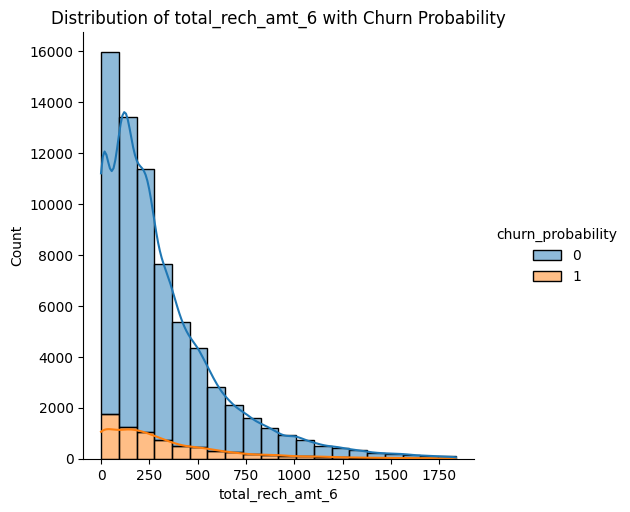

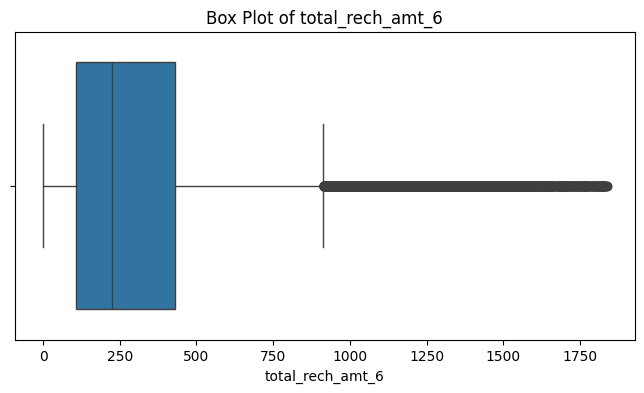

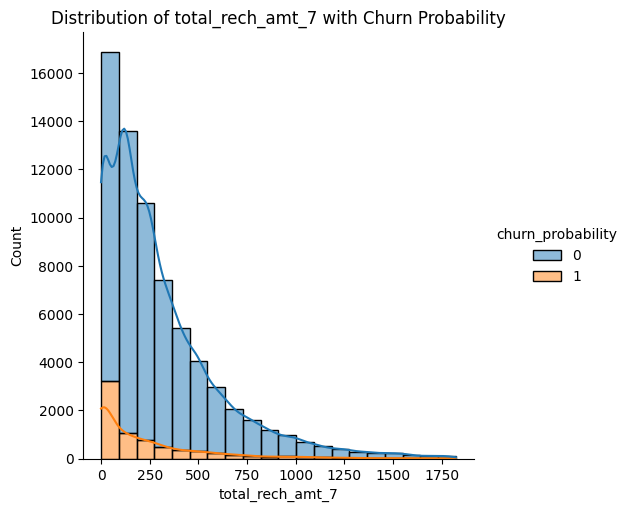

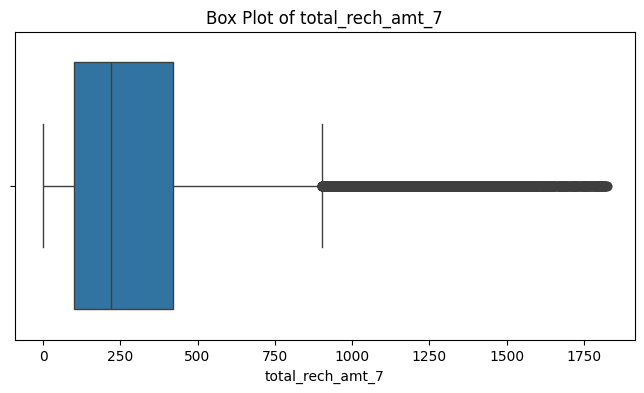

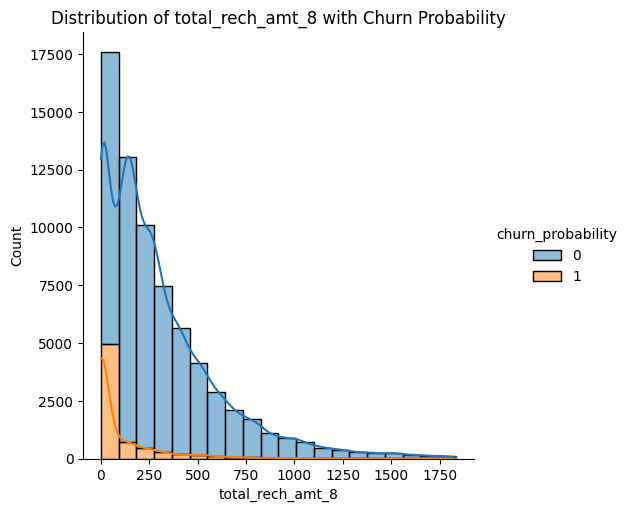

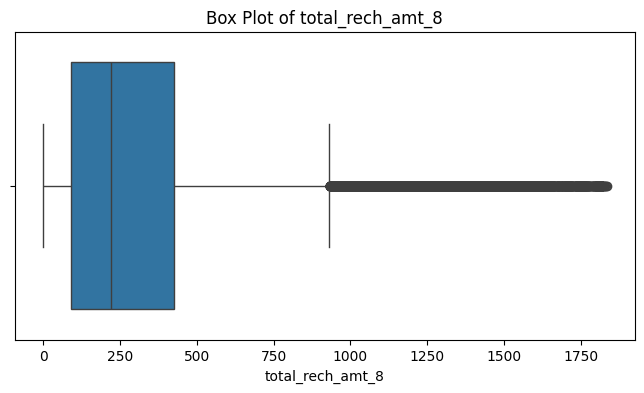

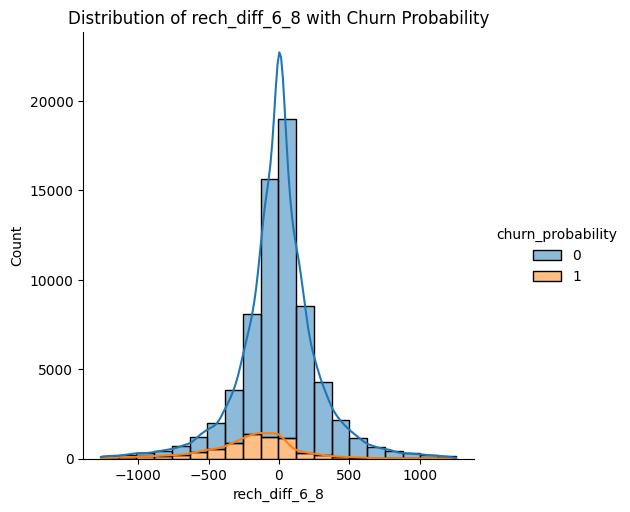

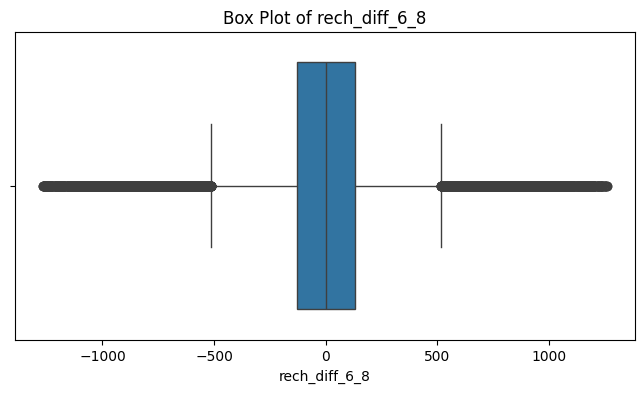

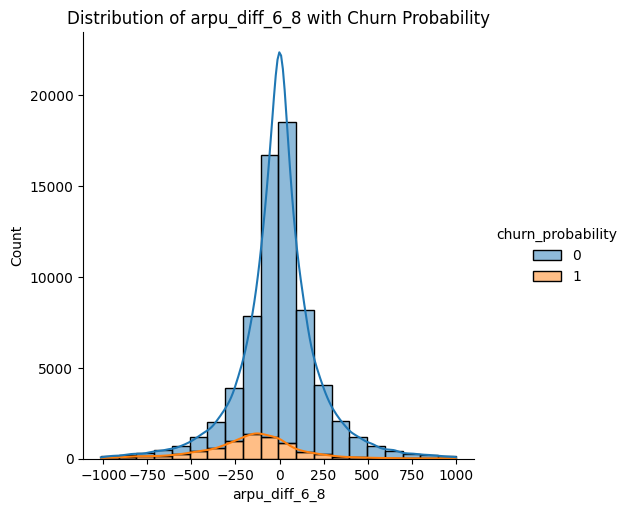

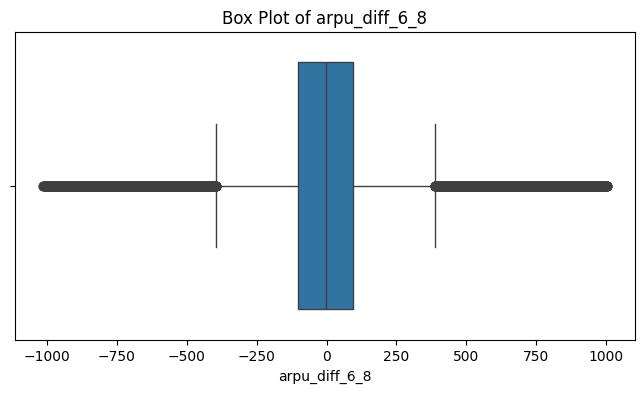

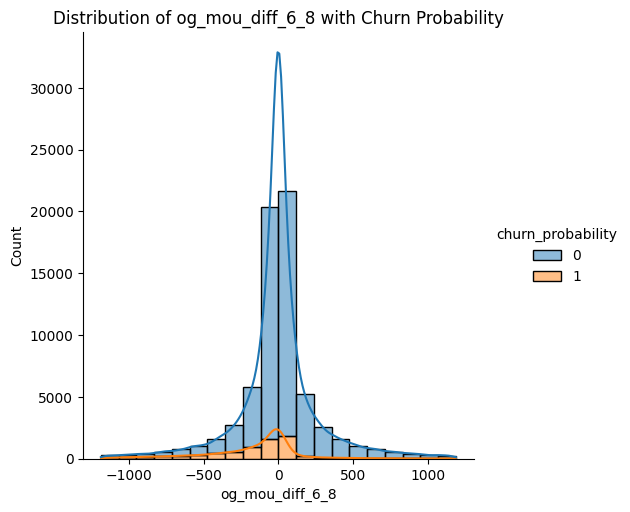

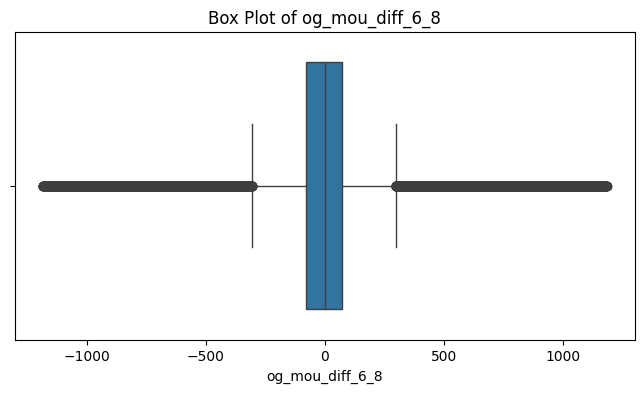

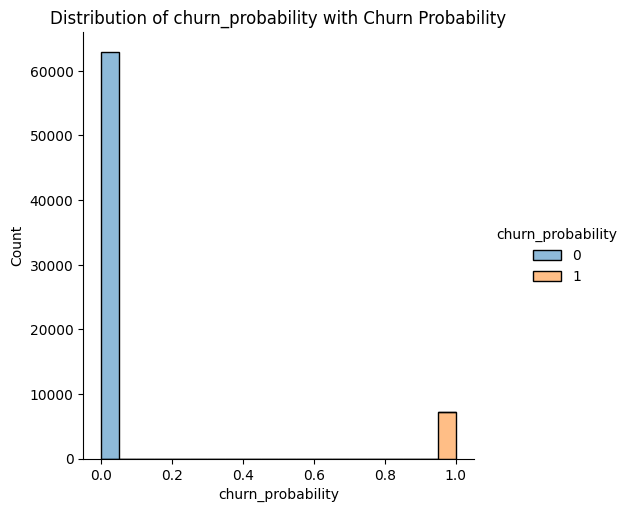

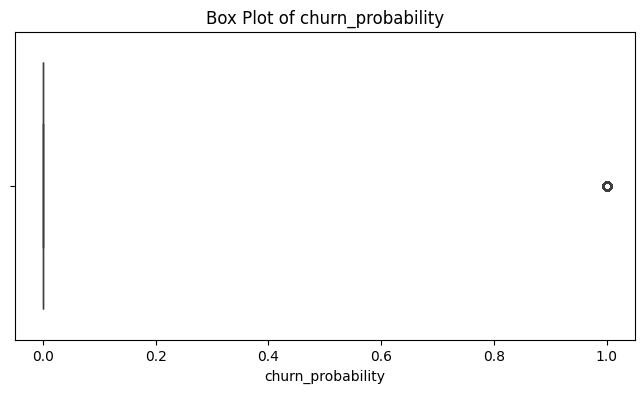

In [116]:
# Iterating over numerical columns for outlier analysis
for column_name in numeric_cols:
    arr = np.array(df_refined_1[column_name])
    uq = np.percentile(arr, 90)
    lq = np.percentile(arr, 10)
    iqr = uq - lq
    ul = uq + (1.5 * iqr)
    ll = lq - (1.5 * iqr)
    
    # Filtering data within upper and lower bounds
    filtered_data = df_refined_1[(df_refined_1[column_name] < ul) & (df_refined_1[column_name] > ll)]
    
    # Plotting distribution of filtered data with hue based on churn probability
    sns.displot(data=filtered_data, x=column_name, kde=True, hue='churn_probability', multiple='stack', bins=20)
    plt.xlabel(column_name)
    plt.title(f'Distribution of {column_name} with Churn Probability')
    plt.show()
    
    # Plotting boxplot to identify outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=column_name, data=filtered_data)
    plt.xlabel(column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.show()

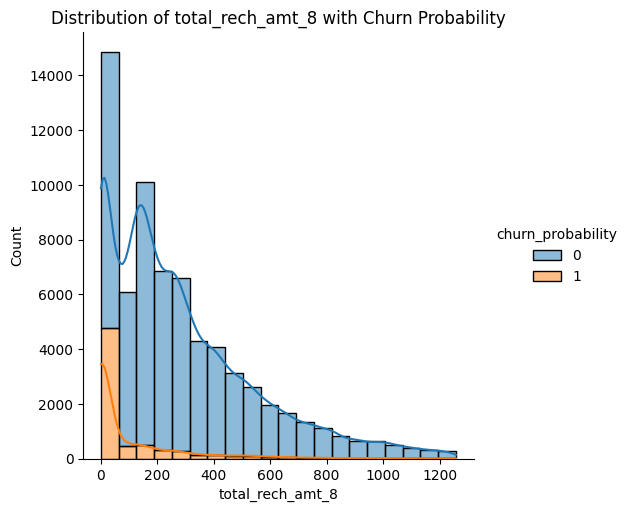

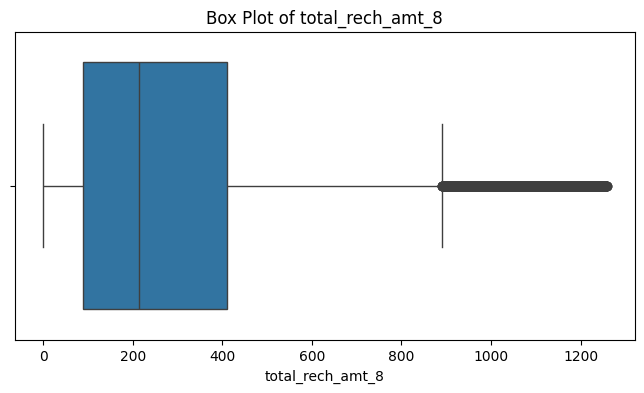

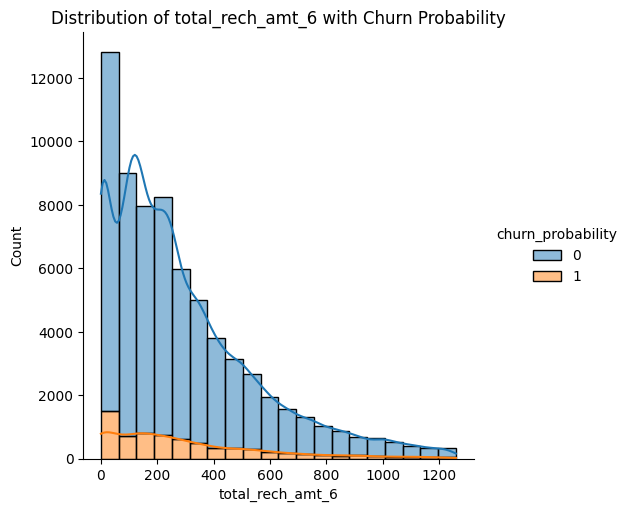

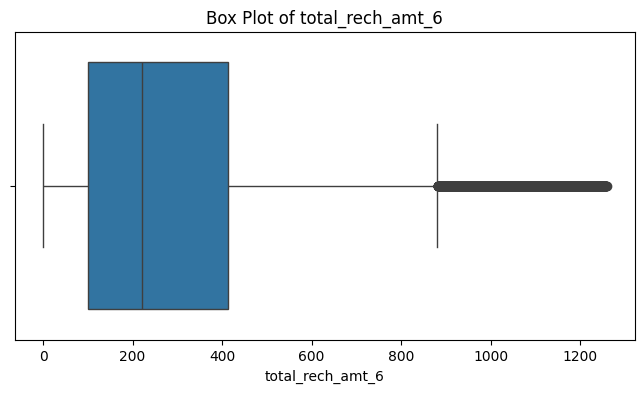

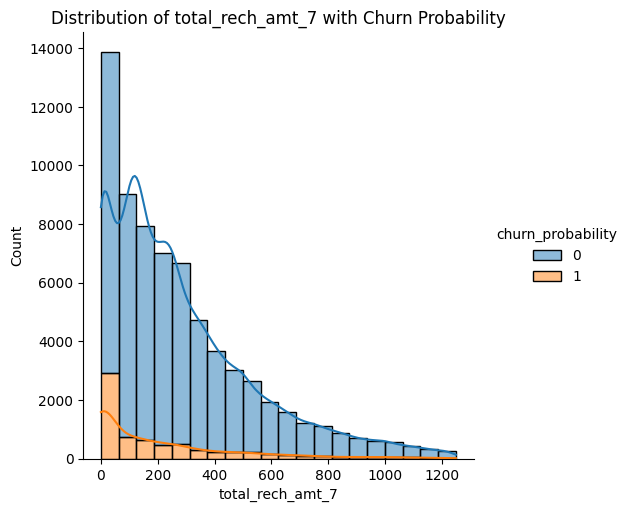

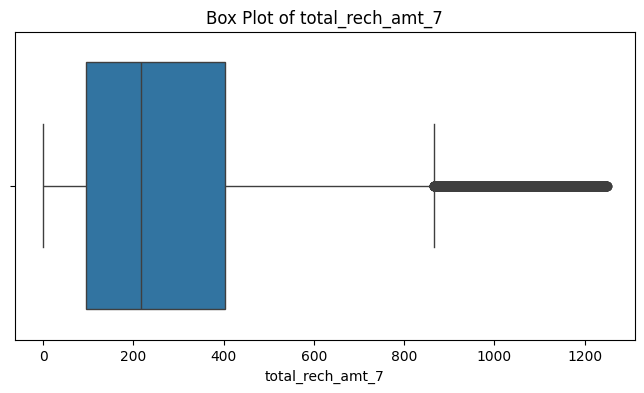

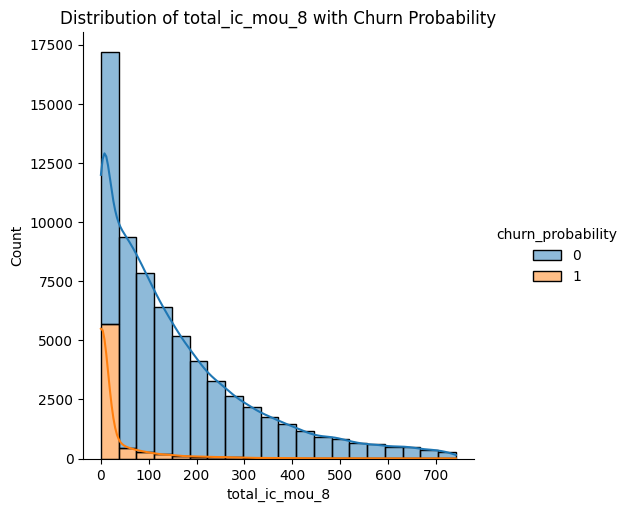

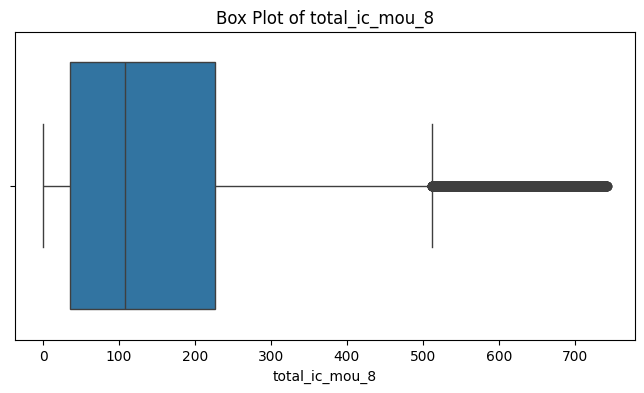

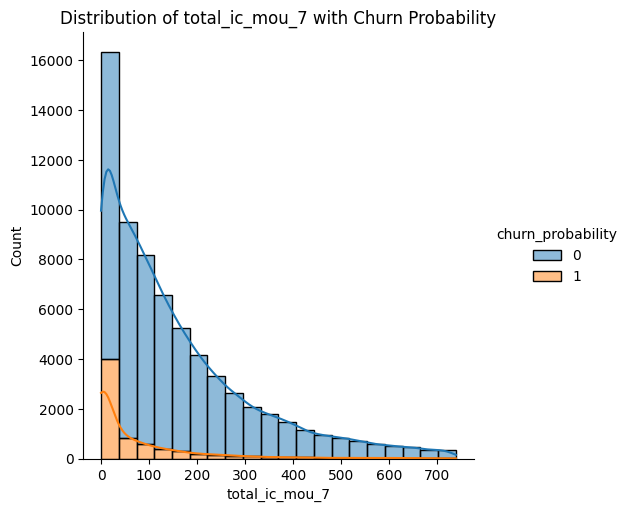

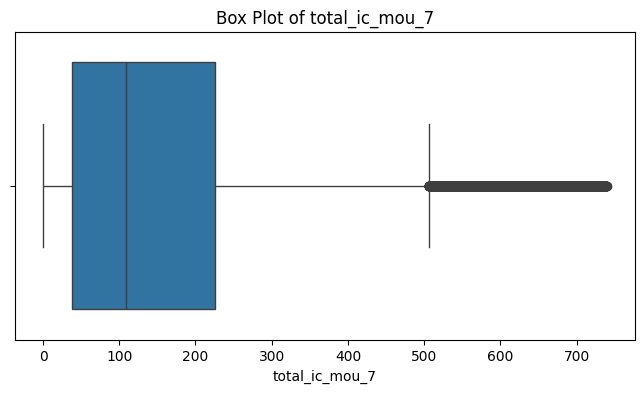

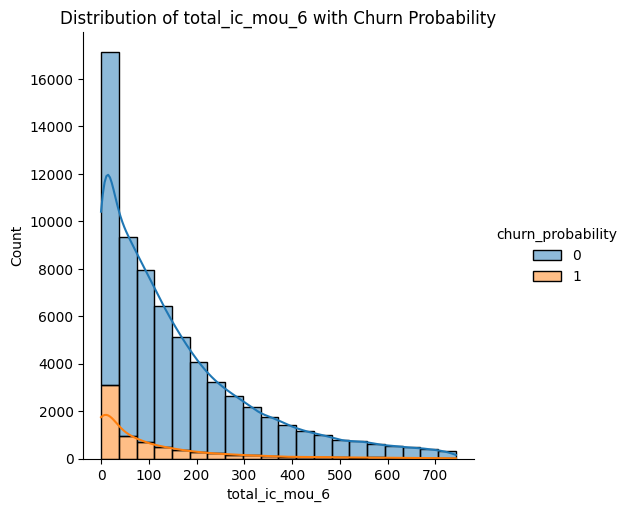

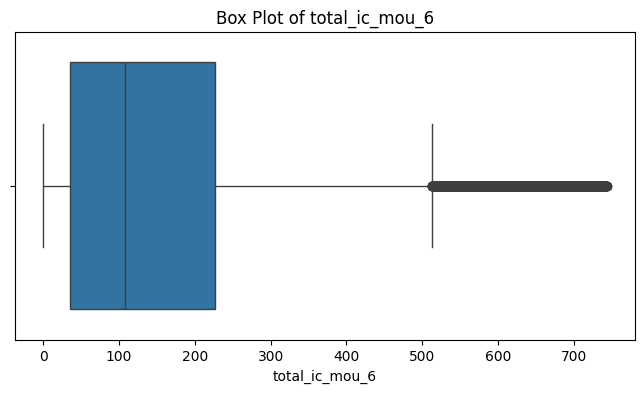

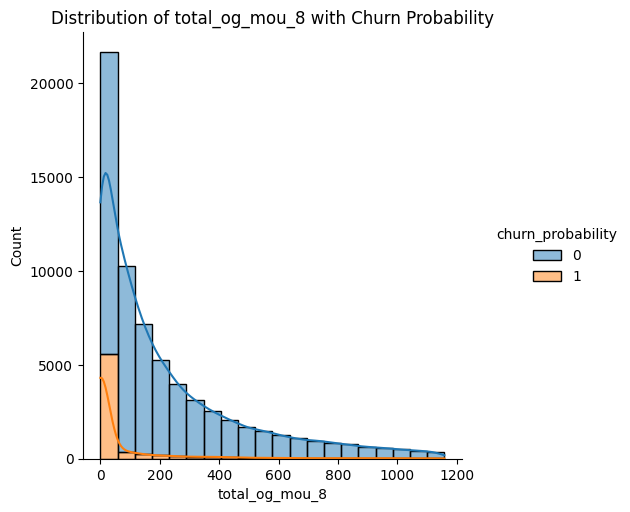

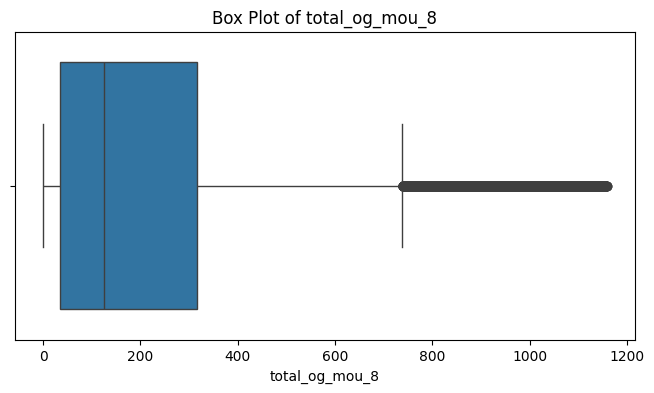

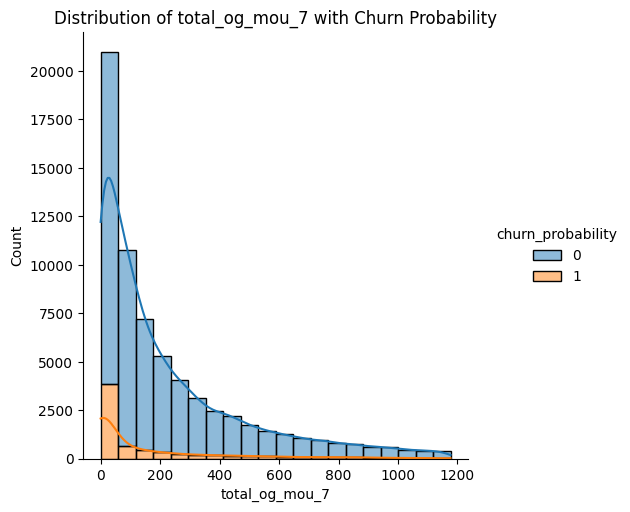

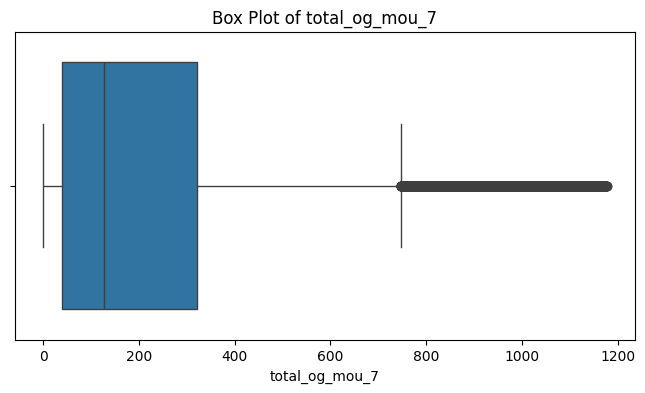

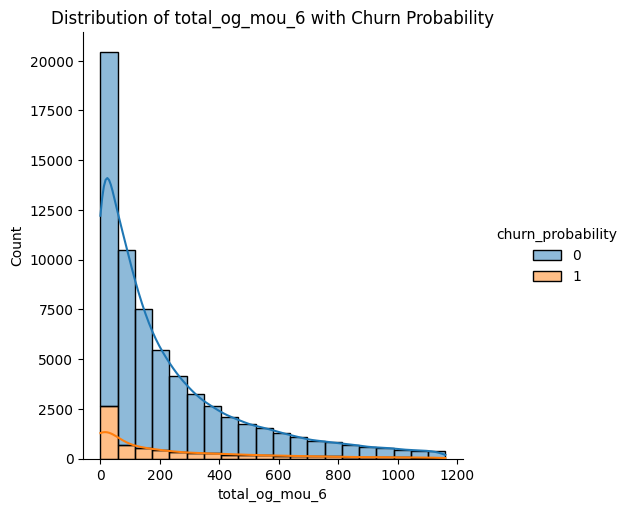

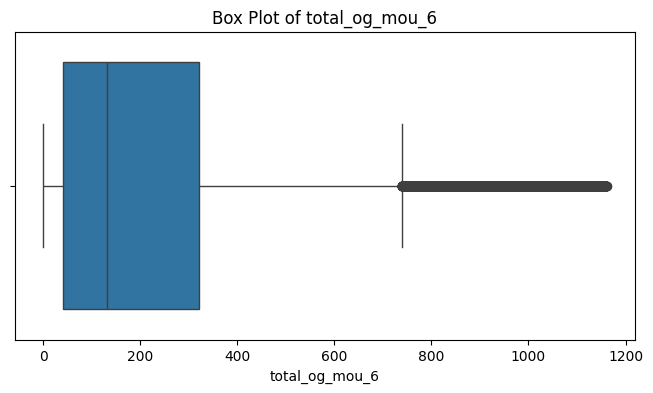

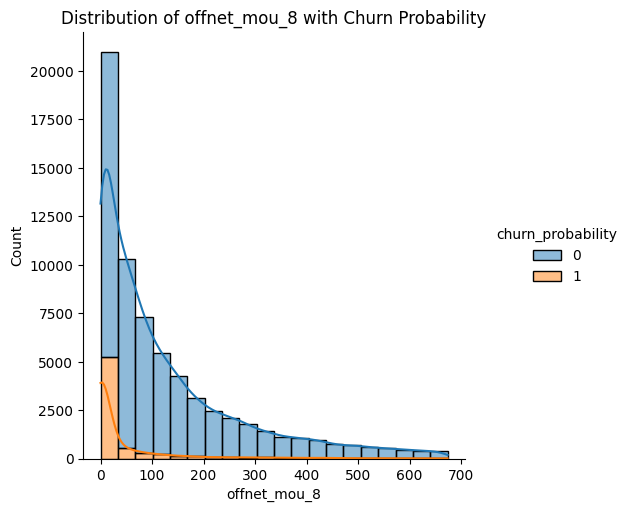

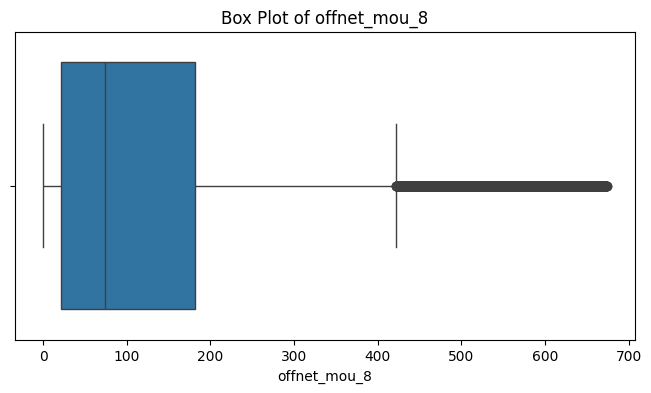

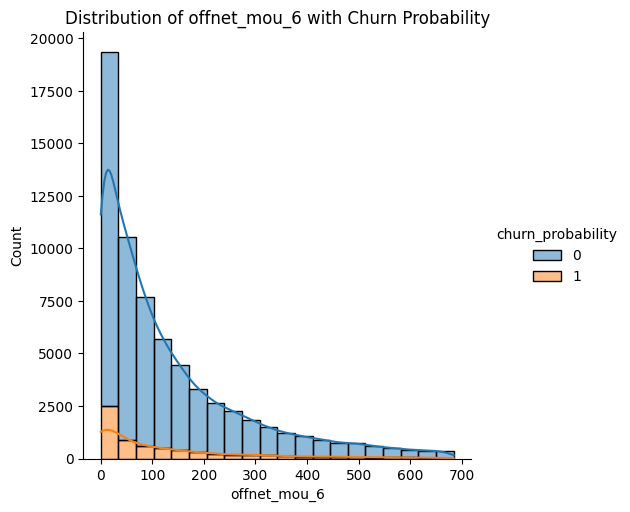

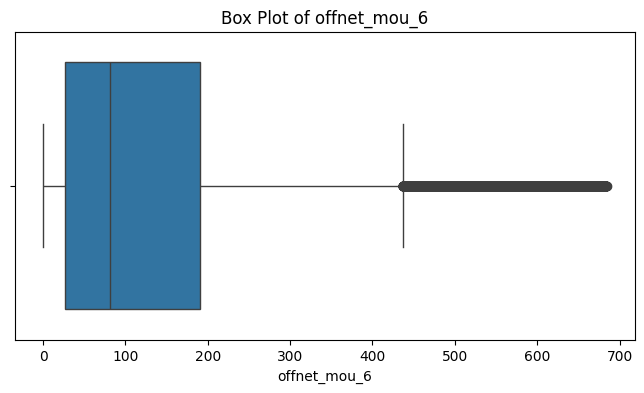

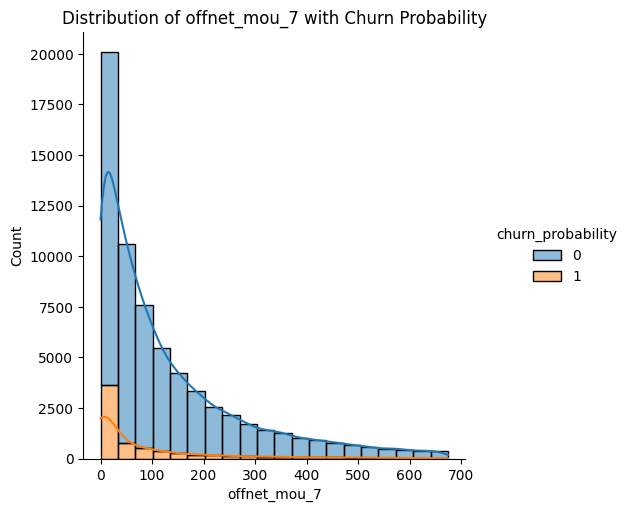

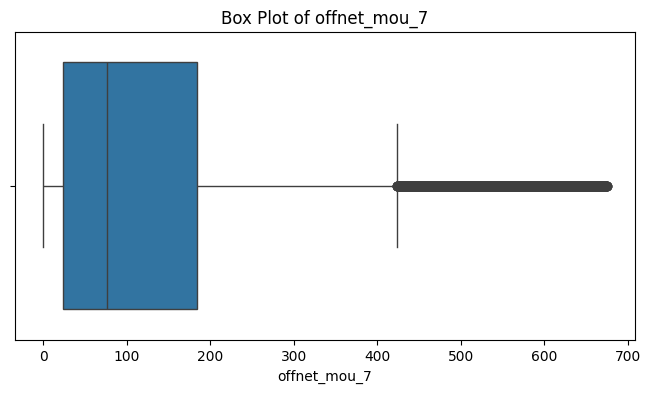

ValueError: `dataset` input should have multiple elements.

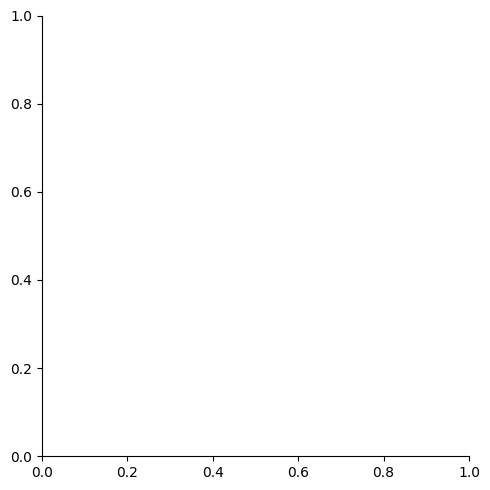

In [117]:
# Iterating over numerical columns for outlier analysis
for column_name in numeric_cols:
    arr = np.array(df_refined_1[column_name])
    uq = np.percentile(arr, 80)
    lq = np.percentile(arr, 10)
    iqr = uq - lq
    ul = uq + (1.5 * iqr)
    ll = lq - (1.5 * iqr)
    
    # Filtering data within upper and lower bounds
    filtered_data = df_refined_1[(df_refined_1[column_name] < ul) & (df_refined_1[column_name] > ll)]
    
    # Plotting distribution of filtered data with hue based on churn probability
    sns.displot(data=filtered_data, x=column_name, kde=True, hue='churn_probability', multiple='stack', bins=20)
    plt.xlabel(column_name)
    plt.title(f'Distribution of {column_name} with Churn Probability')
    plt.show()
    
    # Plotting boxplot to identify outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=column_name, data=filtered_data)
    plt.xlabel(column_name)
    plt.title(f'Box Plot of {column_name}')
    plt.show()

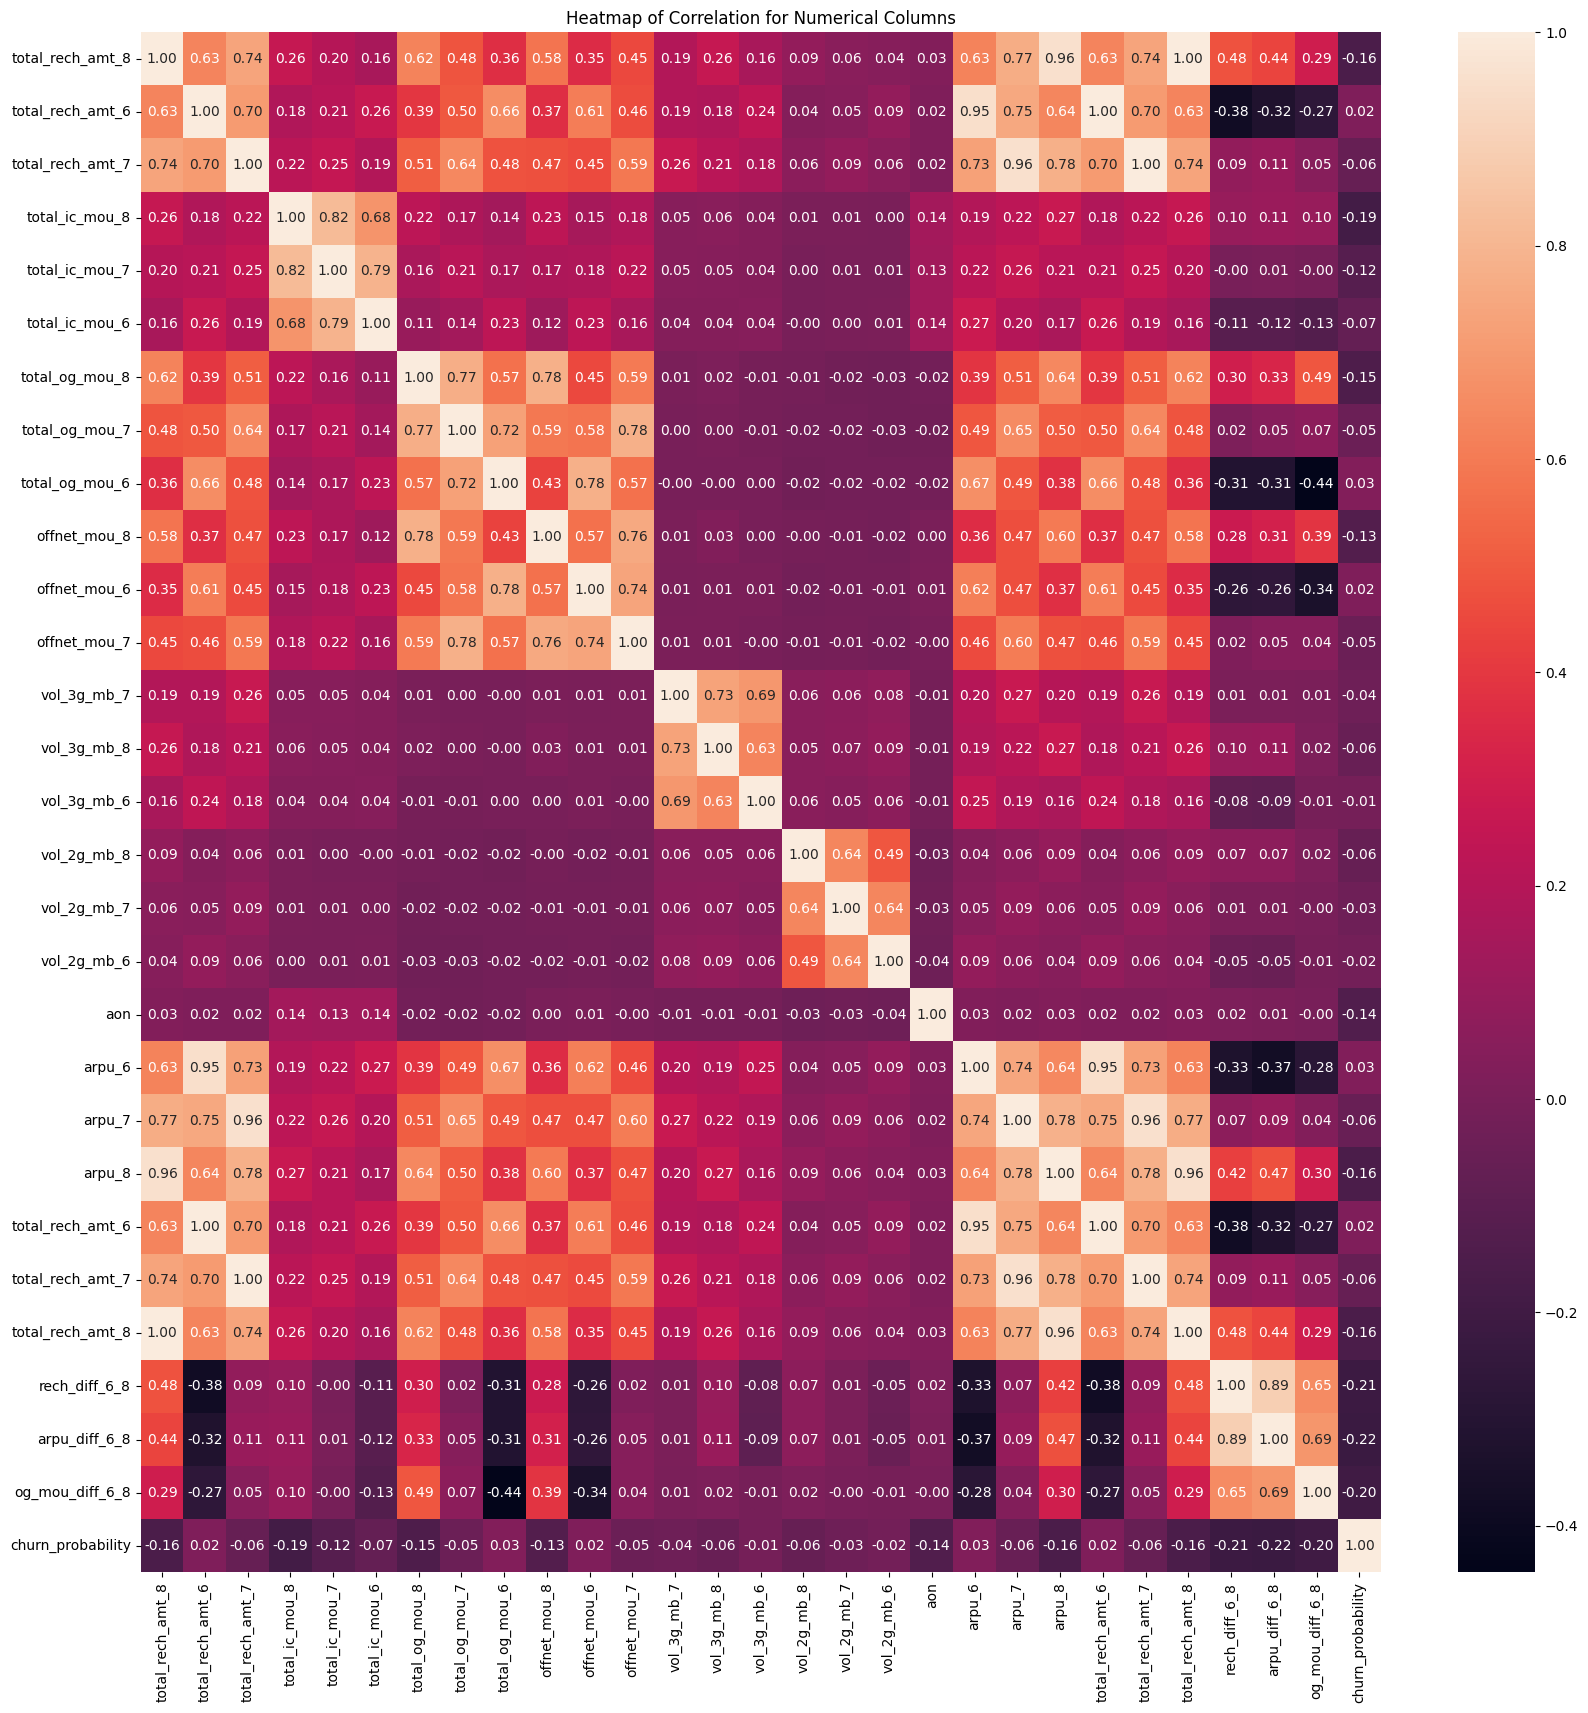

In [118]:
# Plotting a heatmap to visualize correlations between numerical columns
plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(df_refined_1[numeric_cols].corr(), annot=True, fmt='.2f')  # Plot heatmap with correlation values annotated
plt.title("Heatmap of Correlation for Numerical Columns")  # Set the title of the plot
plt.show()  # Show the plot

In [119]:
# # Importing necessary libraries for data preprocessing, model selection, evaluation metrics, and machine learning algorithms.
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_curve, confusion_matrix, f1_score

In [120]:
# Splitting the DataFrame into features (X) and target variable (y)
y = df_refined_1.pop('churn_probability')  # Extracting 'churn_probability' column as target variable
X = df_refined_1  # Features without 'churn_probability' column

In [121]:
X=X[X.select_dtypes(include=['float64','int64']).columns]

In [122]:
#Scaling the df:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_data=pd.DataFrame(X_scaled)
X_data.columns=X.columns
X_data

loc_ic_t2t_mou_8  loc_ic_mou_8  std_ic_t2m_mou_8  loc_og_t2m_mou_8  \
0              0.000728      0.002282          0.002714          0.000470   
1              0.000984      0.002311          0.000000          0.000000   
2              0.000607      0.002771          0.001157          0.000000   
3              0.002233      0.007482          0.000510          0.004763   
4              0.000249      0.002614          0.000000          0.000929   
...                 ...           ...               ...               ...   
69994          0.003164      0.023800          0.002139          0.018072   
69995          0.002159      0.004791          0.003127          0.009542   
69996          0.008090      0.038043          0.000000          0.027868   
69997          0.000097      0.000721          0.001335          0.001782   
69998          0.000090      0.003016          0.000000          0.000000   

       std_og_t2f_mou_8  std_ic_t2t_mou_8  loc_og_t2f_mou_8  std_og_t2m_mou_8  \
0                   0.0          0.000053          0.000000          0.000000   
1                   0.0          0.000000          0.000000          0.000000   
2                   0.0          0.000000          0.000000          0.000000   
3                   0.0          0.000000          0.000000          0.000330   
4                   0.0          0.000000          0.008516          0.000000   
...                 ...               ...               ...               ...   
69994               0.0          0.000000          0.000000          0.020799   
69995               0.0          0.016864          0.000000          0.000038   
69996               0.0          0.000000          0.213466          0.000000   
69997               0.0          0.000331          0.004862          0.000061   
69998               0.0          0.000000          0.000000          0.000000   

       loc_og_t2c_mou_8  og_others_8  ...  last_day_rch_amt_6  max_rech_amt_8  \
0              0.000000          0.0  ...            0.016209        0.002248   
1              0.084672          0.0  ...            0.000000        0.011238   
2              0.000000          0.0  ...            0.017456        0.000000   
3              0.022824          0.0  ...            0.027431        0.011238   
4              0.000000          0.0  ...            0.006234        0.006743   
...                 ...          ...  ...                 ...             ...   
69994          0.002444          0.0  ...            0.012469        0.029220   
69995          0.000000          0.0  ...            0.012469        0.009890   
69996          0.000000          0.0  ...            0.069576        0.078445   
69997          0.000000          0.0  ...            0.000000        0.032592   
69998          0.000000          0.0  ...            0.049377        0.044504   

       days_since_rechg_6  days_since_rechg_7  days_since_rechg_8  \
0                0.300000            0.709677            0.258065   
1                0.633333            0.709677            0.193548   
2                0.666667            0.322581            0.258065   
3                0.533333            0.354839            0.225806   
4                0.200000            0.193548            0.064516   
...                   ...                 ...                 ...   
69994            0.433333            0.032258            0.032258   
69995            0.100000            0.032258            0.161290   
69996            0.200000            0.064516            0.096774   
69997            0.066667            0.419355            0.193548   
69998            0.400000            0.161290            0.225806   

       month_present_7  month_present_8  rech_diff_6_8  arpu_diff_6_8  \
0                  1.0              1.0       0.438552       0.457182   
1                  1.0              1.0       0.442852       0.459838   
2                  1.0              1.0       0.438442       0.455707   
3              

In [123]:
# Splitting the dataset into training and testing subsets using train_test_split function.
# The features (X_data) and target variable (y) are split into X_train, X_test, y_train, and y_test respectively.
# The train_size parameter specifies the proportion of the dataset to include in the training set (70% in this case).
# The random_state parameter ensures reproducibility of results by fixing the random seed (set to 42).
X_train, X_test, y_train, y_test = train_test_split(X_data, y, train_size=0.7, random_state=42)

# Displaying the shapes of the training and testing subsets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48999, 154), (21000, 154), (48999,), (21000,))

In [ ]:
pip install imblearn

In [124]:
# Importing RandomOverSampler from imbalanced-learn library to handle class imbalance.
from imblearn.over_sampling import RandomOverSampler

# Instantiating RandomOverSampler with sampling strategy of 1 (balance the classes).
os = RandomOverSampler(sampling_strategy=1)

# Resampling the training data to balance the classes.
X_train_resampled, y_train_resampled = os.fit_resample(X_train, np.array(y_train))

# Printing the shape of resampled training data and the percentage of positive class instances.
print(X_train_resampled.shape, y_train_resampled.shape)
print(f"Percentage of positive class instances after resampling: {y_train_resampled.sum() / len(y_train_resampled) * 100:.2f}%")

(88044, 154) (88044,)
Percentage of positive class instances after resampling: 50.00%


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ......max_depth=5, n_estimators=20;, score=0.942 total time=   2.6s
[CV 2/3] END ......max_depth=5, n_estimators=20;, score=0.942 total time=   1.6s
[CV 3/3] END ......max_depth=5, n_estimators=20;, score=0.941 total time=   1.6s
[CV 1/3] END ......max_depth=5, n_estimators=30;, score=0.942 total time=   2.5s
[CV 2/3] END ......max_depth=5, n_estimators=30;, score=0.942 total time=   2.3s
[CV 3/3] END ......max_depth=5, n_estimators=30;, score=0.941 total time=   2.4s
[CV 1/3] END ......max_depth=5, n_estimators=50;, score=0.942 total time=   3.8s
[CV 2/3] END ......max_depth=5, n_estimators=50;, score=0.942 total time=   3.9s
[CV 3/3] END ......max_depth=5, n_estimators=50;, score=0.941 total time=   3.9s
[CV 1/3] END .....max_depth=10, n_estimators=20;, score=0.942 total time=   3.2s
[CV 2/3] END .....max_depth=10, n_estimators=20;, score=0.942 total time=   3.1s
[CV 3/3] END .....max_depth=10, n_estimators=20;,

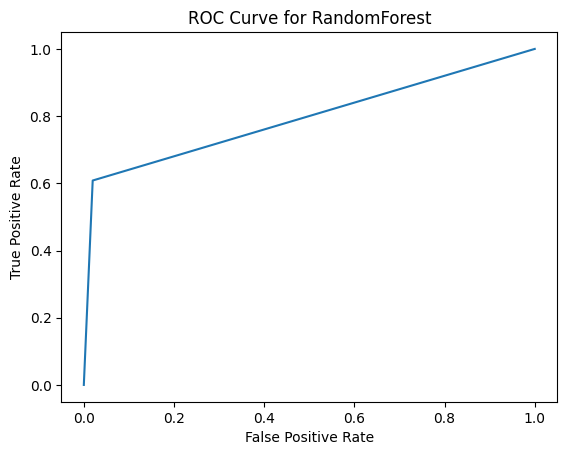

RandomForest :
Accuracy Score: 0.9421428571428572
Precision Score: 0.7794292508917955
AUC Score: 0.7943328743030671
F1 Score: 0.6833463643471462
Recall: 0.6083526682134571
Specificity: 0.9803130803926771
Confusion Matrix:
 [[18474   371]
 [  844  1311]]
__________________________________
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .......criterion=gini, max_depth=5;, score=0.938 total time=   1.3s
[CV 2/3] END .......criterion=gini, max_depth=5;, score=0.941 total time=   1.4s
[CV 3/3] END .......criterion=gini, max_depth=5;, score=0.940 total time=   1.3s
[CV 1/3] END ......criterion=gini, max_depth=10;, score=0.931 total time=   2.7s
[CV 2/3] END ......criterion=gini, max_depth=10;, score=0.930 total time=   3.1s
[CV 3/3] END ......criterion=gini, max_depth=10;, score=0.931 total time=   2.8s
[CV 1/3] END ......criterion=gini, max_depth=12;, score=0.927 total time=   4.7s
[CV 2/3] END ......criterion=gini, max_depth=12;, score=0.927 total time=   4.6s
[CV

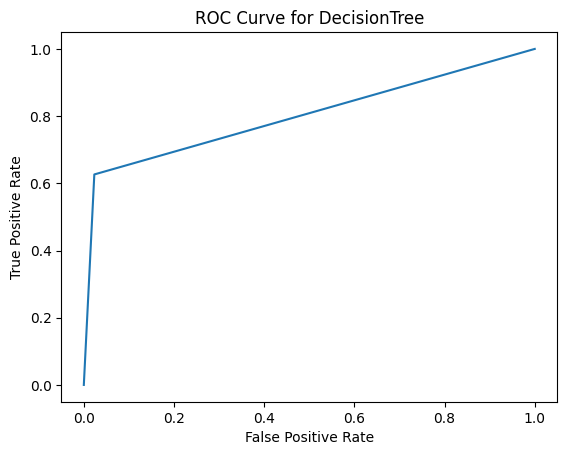

DecisionTree :
Accuracy Score: 0.9407619047619048
Precision Score: 0.7546115148127446
AUC Score: 0.8015774061075853
F1 Score: 0.6845841784989858
Recall: 0.6264501160092807
Specificity: 0.9767046962058902
Confusion Matrix:
 [[18406   439]
 [  805  1350]]
__________________________________
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END learning_rate=0.1, n_estimators=20;, score=0.941 total time=  19.9s
[CV 2/3] END learning_rate=0.1, n_estimators=20;, score=0.942 total time=  16.2s
[CV 3/3] END learning_rate=0.1, n_estimators=20;, score=0.941 total time=  20.4s
[CV 1/3] END learning_rate=0.1, n_estimators=50;, score=0.941 total time=  47.5s
[CV 2/3] END learning_rate=0.1, n_estimators=50;, score=0.943 total time=  48.6s
[CV 3/3] END learning_rate=0.1, n_estimators=50;, score=0.942 total time=  48.7s
[CV 1/3] END learning_rate=0.01, n_estimators=20;, score=0.898 total time=  18.6s
[CV 2/3] END learning_rate=0.01, n_estimators=20;, score=0.898 total time=  17.9s
[

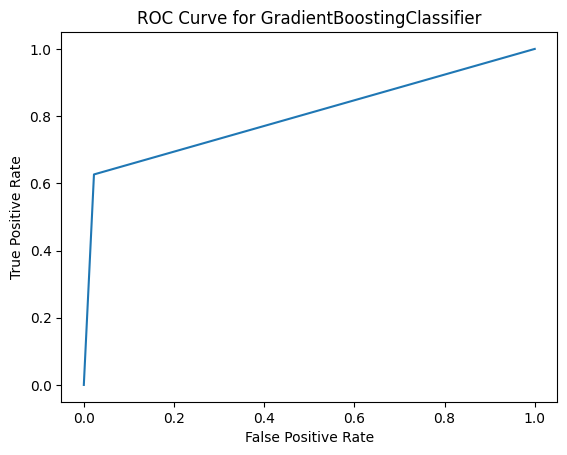

GradientBoostingClassifier :
Accuracy Score: 0.9414761904761905
Precision Score: 0.7609921082299888
AUC Score: 0.8019753896575986
F1 Score: 0.687197760244337
Recall: 0.6264501160092807
Specificity: 0.9775006633059167
Confusion Matrix:
 [[18421   424]
 [  805  1350]]
__________________________________
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END .................C=0.1, penalty=l2;, score=0.909 total time=   0.6s
[CV 2/3] END .................C=0.1, penalty=l2;, score=0.910 total time=   0.6s
[CV 3/3] END .................C=0.1, penalty=l2;, score=0.911 total time=   0.6s
[CV 1/3] END ...........C=0.1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/3] END ...........C=0.1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/3] END ...........C=0.1, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/3] END .................C=0.5, penalty=l2;, score=0.911 total time=   0.8s
[CV 2/3] END .................C=0.5, penalty=l2;, score=0.912 total tim

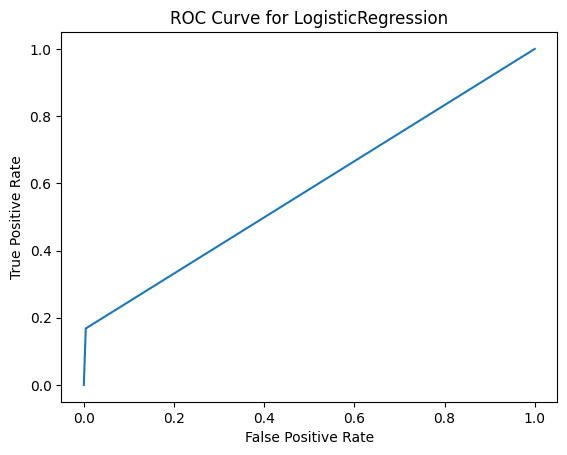

LogisticRegression :
Accuracy Score: 0.9107619047619048
Precision Score: 0.8171557562076749
AUC Score: 0.581841608087469
F1 Score: 0.27867590454195534
Recall: 0.1679814385150812
Specificity: 0.9957017776598567
Confusion Matrix:
 [[18764    81]
 [ 1793   362]]
__________________________________


In [125]:
# Dictionary containing models and their corresponding hyperparameters for model building
models = {
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(),
    
}

# Dictionary containing hyperparameters for each model
params = {
    'RandomForest': {'n_estimators': [20, 30, 50], 'max_depth': [5, 10, 12]},
    'DecisionTree': {'criterion': ["gini", "entropy"], 'max_depth': [5, 10, 12]},
    'GradientBoostingClassifier': {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [20, 50]},
    'LogisticRegression': {'penalty': ['l2', 'elasticnet'], 'C': [0.1, 0.5, 1]},
    
}

# Dictionary to store model performance report
report = {}

# Loop over models for model training and evaluation
for model_name, model_obj in models.items():
    # GridSearchCV for hyperparameter tuning
    model_cv = GridSearchCV(estimator=model_obj, param_grid=params[model_name], scoring='accuracy', cv=3, verbose=3)
    model_cv.fit(X_train, y_train)
    
    # Best estimator from GridSearchCV
    model = model_cv.best_estimator_
    model.fit(X_train, y_train)  # Fit model on training data
    
    # Prediction on test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    score = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    score_auc = auc(fpr, tpr)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Plot ROC curve
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.show()
    
    # Calculate recall and specificity
    TP = confusion[1, 1]  # True positive
    TN = confusion[0, 0]  # True negatives
    FP = confusion[0, 1]  # False positives
    FN = confusion[1, 0]  # False negatives
    recall = TP / float(TP + FN)
    specificity = TN / float(TN + FP)
    
    # Print model performance metrics
    print(model_name, ':')
    print('Accuracy Score:', score)
    print('Precision Score:', precision)
    print('AUC Score:', score_auc)
    print('F1 Score:', f1)
    print('Recall:', recall)
    print('Specificity:', specificity)
    print('Confusion Matrix:\n', confusion)
    print('__________________________________')
    
    # Store model and its performance in report dictionary
    report[model_name] = (model, score)

In [126]:

report

{'RandomForest': (RandomForestClassifier(max_depth=5, n_estimators=20),
  0.9421428571428572),
 'DecisionTree': (DecisionTreeClassifier(criterion='entropy', max_depth=5),
  0.9407619047619048),
 'GradientBoostingClassifier': (GradientBoostingClassifier(n_estimators=50),
  0.9414761904761905),
 'LogisticRegression': (LogisticRegression(C=1), 0.9107619047619048)}

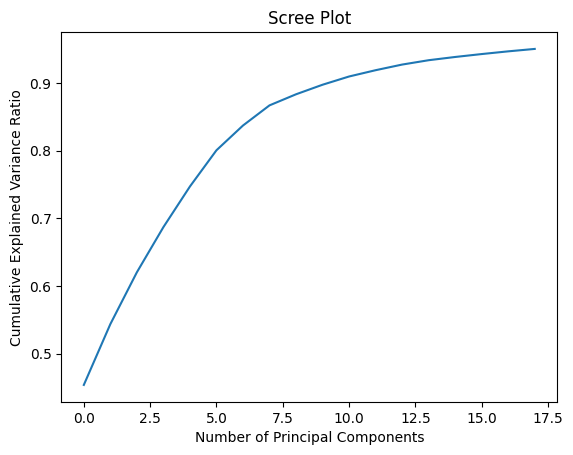

In [127]:
# Importing PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

# Initializing PCA with random_state set to 42 and specifying n_components to optimize memory usage
pca = PCA(n_components=0.95, random_state=42)

# Fitting PCA on training data and transforming it
X_train_transformed = pca.fit_transform(X_train)

# Plotting the Scree plot to visualize explained variance ratio of principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [128]:
# Initializing PCA with 30 components and setting random_state for reproducibility
pca2 = PCA(n_components=30, random_state=42)

# Transforming training data using PCA
X_train_transformed = pca2.fit_transform(X_train)

# Transforming testing data using PCA
X_test_transformed = pca2.transform(X_test)

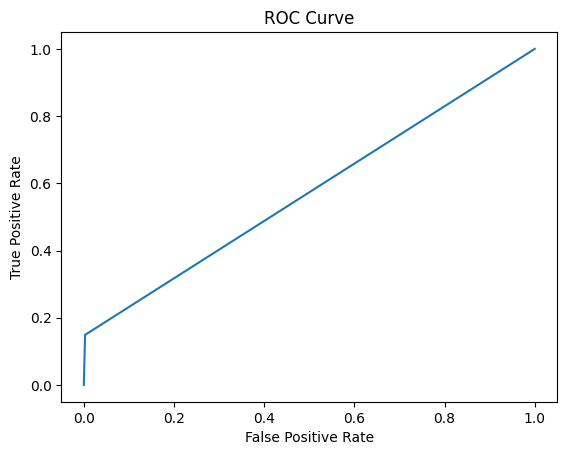

Confusion Matrix:
[[18793    52]
 [ 1834   321]]
Applying Random Forest after PCA transformation:
Accuracy Score: 0.9107619047619048
Precision Score: 0.8605898123324397
AUC Score: 0.5730982819299463
F1 Score: 0.25395569620253167
Recall: 0.14895591647331788
Specificity: 0.9972406473865747


In [129]:
# Applying Random Forest Classifier on transformed dataset to check the accuracy
rf2 = RandomForestClassifier(random_state=42, max_depth=10)
rf2.fit(X_train_transformed, y_train)  # Fitting the model on transformed training data

# Predicting the target variable on transformed testing data
y_pred = rf2.predict(X_test_transformed)

# Calculating precision, recall, F1-score, and AUC score
precision = precision_score(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
score_auc = auc(fpr, tpr)

# Calculating confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plotting the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculating additional evaluation metrics - Recall and Specificity
TP = confusion[1,1]  # True positive 
TN = confusion[0,0]  # True negatives
FP = confusion[0,1]  # False positives
FN = confusion[1,0]  # False negatives
recall = TP / float(TP + FN)  # Recall
specificity = TN / float(TN + FP)  # Specificity

# Printing the confusion matrix
print('Confusion Matrix:')
print(confusion)

# Printing the evaluation metrics
print('Applying Random Forest after PCA transformation:')
print('Accuracy Score:', score)
print('Precision Score:', precision)
print('AUC Score:', score_auc)
print('F1 Score:', f1)
print('Recall:', recall)
print('Specificity:', specificity)

In [130]:
# Finding the best model from the report based on accuracy
final_model = max(report.items(), key=lambda x: x[1][1])[1][0]

In [131]:
final_model


RandomForestClassifier(max_depth=5, n_estimators=20)

In [132]:
final_model.fit(X_train,y_train) # Fitting the final model on the training data


RandomForestClassifier(max_depth=5, n_estimators=20)

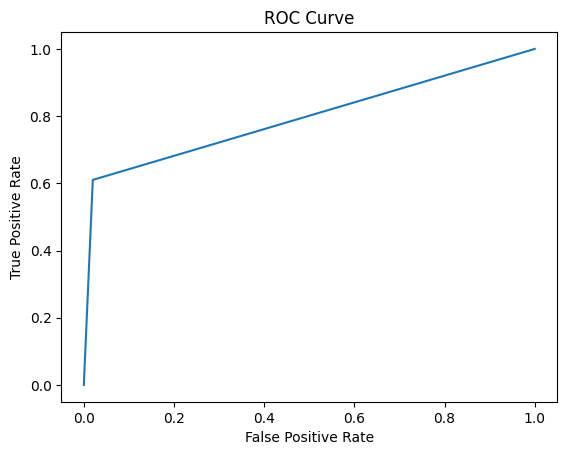

Confusion Matrix:
[[18470   375]
 [  840  1315]]
Accuracy Score: 0.9421428571428572
Precision Score: 0.7781065088757396
AUC Score: 0.7951548196023365
F1 Score: 0.6840052015604682
Recall: 0.6102088167053364
Specificity: 0.9801008224993367


In [133]:
# Getting the evaluation metrics from confusion matrix
y_pred = final_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
score_auc = auc(fpr, tpr)

# Calculating confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plotting the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculating additional evaluation metrics - Recall and Specificity
TP = confusion[1,1]  # True positive 
TN = confusion[0,0]  # True negatives
FP = confusion[0,1]  # False positives
FN = confusion[1,0]  # False negatives
recall = TP / float(TP + FN)  # Recall
specificity = TN / float(TN + FP)  # Specificity

# Printing the confusion matrix
print('Confusion Matrix:')
print(confusion)

# Printing the evaluation metrics
print('Accuracy Score:', score)
print('Precision Score:', precision)
print('AUC Score:', score_auc)
print('F1 Score:', f1)
print('Recall:', recall)
print('Specificity:', specificity)

In [134]:
# Reading the test data from 'test.csv' file
test_data = pd.read_csv('test.csv')

# Imputing missing values in recharge columns with 0
test_data[recharge_cols] = test_data[recharge_cols].apply(lambda x: x.fillna(0))

# Imputing missing values in flag columns with 0
flag_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
test_data[flag_cols] = test_data[flag_cols].apply(lambda x: x.fillna(0))

# Selecting important columns for prediction
imp_cols = list(df_refined_1.columns)

In [135]:
# Columns to be dropped from the important columns list
drop_from_imp_cols = ['days_since_rechg_6', 'days_since_rechg_7', 'days_since_rechg_8', 
                      'month_present_7', 'month_present_8', 
                      'rech_diff_6_8', 'arpu_diff_6_8', 'og_mou_diff_6_8'
                     ]

In [136]:
# Removing attributes specified in drop_from_imp_cols from the important columns list
for attr in drop_from_imp_cols:
    imp_cols.remove(attr)

In [137]:
# Columns to be added to the imp_cols variable
add_to_imp_cols = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8",
                   "last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8"]

# Adding columns to the imp_cols variable
for attr in add_to_imp_cols:
    imp_cols.append(attr)

In [138]:
# Creating a refined test DataFrame with selected important columns
test_df_refined_1 = test_data[imp_cols]

# Displaying the refined test DataFrame
test_df_refined_1

loc_ic_t2t_mou_8  loc_ic_mou_8  std_ic_t2m_mou_8  loc_og_t2m_mou_8  \
0                 21.98         31.51              4.34              8.36   
1                  2.61        187.43              0.00            377.26   
2                  0.00          0.00              0.00              0.00   
3                 23.04        531.64              8.83             20.51   
4                  9.91         17.61             32.46             10.94   
...                 ...           ...               ...               ...   
29995            281.24        636.28             16.29            193.58   
29996             13.99         58.78              9.59             13.03   
29997             10.44         16.08              2.13             25.06   
29998              0.00          9.26              0.00             26.76   
29999             12.44         60.66             58.68             10.78   

       std_og_t2f_mou_8  std_ic_t2t_mou_8  loc_og_t2f_mou_8  std_og_t2m_mou_8  \
0                   0.0              0.00              0.00             26.43   
1                   0.0              0.00              0.00             17.68   
2                   0.0              0.00              0.00              0.00   
3                   0.0              0.00              2.35              0.00   
4                   0.0            107.39              0.00             63.18   
...                 ...               ...               ...               ...   
29995               0.0              9.98              6.53             21.84   
29996               0.0             13.55              0.00            176.73   
29997               0.0              2.15              0.00             12.08   
29998               0.0              0.00              0.00            277.39   
29999               0.0             34.76              0.00            152.43   

       loc_og_t2c_mou_8  og_others_8  ...  last_day_rch_amt_8  \
0                  0.03          0.0  ...                   0   
1                  0.00          0.0  ...                   0   
2                  0.00          0.0  ...                   0   
3                  0.00          0.0  ...                   0   
4                  0.00          0.0  ...                 130   
...                 ...          ...  ...                 ...   
29995              0.00          0.0  ...                 220   
29996              0.00          0.0  ...                   0   
29997              1.65          0.0  ...                  50   
29998              1.99          0.0  ...                  30   
29999              0.00          0.0  ...                   0   

       last_day_rch_amt_7  last_day_rch_amt_6  max_rech_amt_8  \
0                      30                  30              30   
1                       0                 250             250   
2                       0                   0             500   
3                     150                 110               0   
4                     130                  50             130   
...                   ...                 ...             ...   
29995                 220                   0             220   
29996                 110                   0             279   
29997                   0                  50              50   
29998                 100                  20              37   
29999                 565                   0             130   

       date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8  \
0                6/21/2014            7/26/2014            8/24/2014   
1                6/19/2014            7/16/2014            8/24/2014   
2                6/29/2014            7/27/2014            8/28/2014   
3                6/25/2014            7/30/2014            8/24/2014   
4                6/29/2014            7/29/2014            8/30/2014   
...                    ...                  ...                  ...   
29995            6/27/2014            7/27/

In [139]:
# Extracting columns with object dtype as df_variables
df_variables = [x for x in test_df_refined_1.columns if test_df_refined_1[x].dtype == 'O']

# Extracting days of the month into separate columns
length = len(df_variables)
for i in range(length):
    string = 'day_from_' + df_variables[i]
    test_df_refined_1[string] = pd.DatetimeIndex(test_df_refined_1[df_variables[i]]).day
    df_variables.append(string)

In [140]:
# Difference between last date of recharge and last date of month to calculate recency
test_df_refined_1["days_since_rechg_6"] = (test_df_refined_1["day_from_last_date_of_month_6"] - test_df_refined_1["day_from_date_of_last_rech_6"]) + 1
df_variables.append('days_since_rechg_6')

test_df_refined_1["days_since_rechg_7"] = (test_df_refined_1["day_from_last_date_of_month_7"] - test_df_refined_1["day_from_date_of_last_rech_7"]) + 1
df_variables.append('days_since_rechg_7')

test_df_refined_1["days_since_rechg_8"] = (test_df_refined_1["day_from_last_date_of_month_8"] - test_df_refined_1["day_from_date_of_last_rech_8"]) + 1
df_variables.append('days_since_rechg_8')

# Derive presence or absence of last date of month columns
test_df_refined_1["month_present_6"] = (test_df_refined_1["day_from_last_date_of_month_6"] - test_df_refined_1["day_from_last_date_of_month_6"]) + 1
df_variables.append('month_present_6')

test_df_refined_1["month_present_7"] = (test_df_refined_1["day_from_last_date_of_month_7"] - test_df_refined_1["day_from_last_date_of_month_7"]) + 1
df_variables.append('month_present_7')

test_df_refined_1["month_present_8"] = (test_df_refined_1["day_from_last_date_of_month_8"] - test_df_refined_1["day_from_last_date_of_month_8"]) + 1
df_variables.append('month_present_8')

In [141]:
# Columns to be dropped from the refined test DataFrame
drop_variables = ['date_of_last_rech_8', 'date_of_last_rech_7', 'date_of_last_rech_6',
                  'last_date_of_month_8', 'last_date_of_month_7', 'last_date_of_month_6',
                  'day_from_date_of_last_rech_8', 'day_from_date_of_last_rech_7', 'day_from_date_of_last_rech_6',
                  'day_from_last_date_of_month_8', 'day_from_last_date_of_month_7', 'day_from_last_date_of_month_6']

# Dropping columns from the refined test DataFrame
test_df_refined_1 = test_df_refined_1.drop(drop_variables, axis=1)

In [142]:
# Columns to be imputed with 0
days_col_impute = ["days_since_rechg_6", "days_since_rechg_7", "days_since_rechg_8", 
                   "month_present_6", "month_present_7", "month_present_8"]
# Imputing missing values with 0 in specified columns
test_df_refined_1[days_col_impute] = test_df_refined_1[days_col_impute].apply(lambda x: x.fillna(0))

In [143]:
# cols_to_impute list
cols_to_impute = []
for col in test_df_refined_1.select_dtypes(include=['float64','int64']).columns:
    if test_df_refined_1[col].isnull().any():
        cols_to_impute.append(col)
cols_to_impute

['loc_ic_t2t_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2m_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2m_mou_8',
 'loc_og_t2c_mou_8',
 'og_others_8',
 'loc_ic_t2f_mou_8',
 'loc_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_mou_8',
 'std_ic_mou_8',
 'std_ic_t2f_mou_8',
 'roam_og_mou_8',
 'spl_og_mou_8',
 'roam_ic_mou_8',
 'spl_ic_mou_8',
 'offnet_mou_8',
 'isd_ic_mou_8',
 'onnet_mou_8',
 'isd_og_mou_8',
 'ic_others_8',
 'std_og_t2t_mou_8',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'std_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'isd_og_mou_6',
 'loc_og_t2f_mou_6',
 'std_og_t2f_mou_6',
 'roam_og_mou_6',
 'std_og_t2m_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_mou_6',
 'roam_ic_mou_6',
 'std_og_t2t_mou_6',
 'loc_og_t2c_mou_6',
 'offnet_mou_6',
 'loc_og_t2m_mou_6',
 'onnet_mou_6

In [144]:
test_df_refined_1[cols_to_impute] = test_df_refined_1[cols_to_impute].apply(lambda x: x.fillna(0))

In [145]:
# Compute difference columns in a manner akin to the training data frame
test_df_refined_1['rech_diff_6_8']=test_df_refined_1['total_rech_amt_8']-test_df_refined_1['total_rech_amt_6']
test_df_refined_1['arpu_diff_6_8']=test_df_refined_1['arpu_8']-test_df_refined_1['arpu_6']
test_df_refined_1['og_mou_diff_6_8']=test_df_refined_1['total_og_mou_8']-test_df_refined_1['total_og_mou_6']

In [146]:
#Remove month_present_6 from the training dataset since it was eliminated for a single unique value.
test_df_refined_1 = test_df_refined_1.drop('month_present_6',axis=1)

In [147]:
# Verify that the training dataset has the same amount of columns.
test_df_refined_1.shape

(30000, 154)

In [148]:
# Verify that the training dataset has the same amount of columns (apart from churn probability).
df_refined_1.shape

(69999, 154)

In [149]:
# Listing all columns in the refined test DataFrame
list(test_df_refined_1.columns)

['loc_ic_t2t_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2m_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'loc_og_t2f_mou_8',
 'std_og_t2m_mou_8',
 'loc_og_t2c_mou_8',
 'og_others_8',
 'loc_ic_t2f_mou_8',
 'loc_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_mou_8',
 'std_ic_mou_8',
 'std_ic_t2f_mou_8',
 'roam_og_mou_8',
 'spl_og_mou_8',
 'roam_ic_mou_8',
 'spl_ic_mou_8',
 'offnet_mou_8',
 'isd_ic_mou_8',
 'onnet_mou_8',
 'isd_og_mou_8',
 'ic_others_8',
 'std_og_t2t_mou_8',
 'loc_ic_t2t_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'std_ic_t2f_mou_6',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2m_mou_6',
 'std_ic_mou_6',
 'spl_ic_mou_6',
 'isd_ic_mou_6',
 'ic_others_6',
 'isd_og_mou_6',
 'loc_og_t2f_mou_6',
 'std_og_t2f_mou_6',
 'roam_og_mou_6',
 'std_og_t2m_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_mou_6',
 'roam_ic_mou_6',
 'std_og_t2t_mou_6',
 'loc_og_t2c_mou_6',
 'offnet_mou_6',
 'loc_og_t2m_mou_6',
 'onnet_mou_6

In [150]:
# Scaling the test df:
test_df_refined_1
X_test_scaled=scaler.transform(test_df_refined_1)

# Predicting on the test df:
y_pred=final_model.predict(X_test_scaled)

In [151]:
# Converting the predicted churn probability to a Pandas Series
y_pred = pd.Series(y_pred)

In [152]:
# Concatenating the refined test DataFrame and the predicted churn probability as a DataFrame
test_data = pd.concat([test_df_refined_1, y_pred], axis=1)

In [153]:
# Setting 'id' column as index in the test DataFrame
test_data = test_data.set_index('id')

In [154]:
# Creating the submission CSV file with churn probability predictions
# Renaming the column to 'churn_probability'
# Saving the DataFrame to a CSV file named 'submission.csv'
sample = pd.DataFrame(test_data[0])
sample.columns = ['churn_probability']
sample.to_csv('submission_vt.csv')

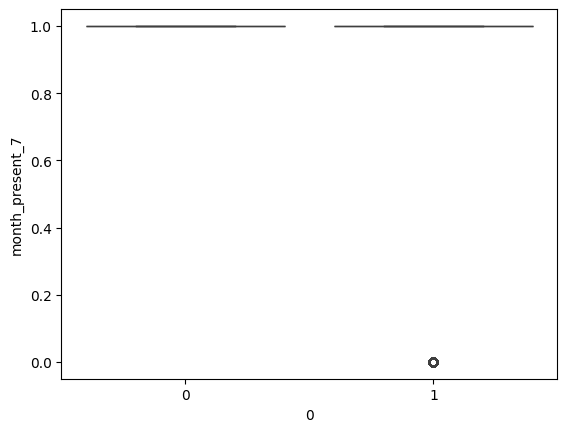

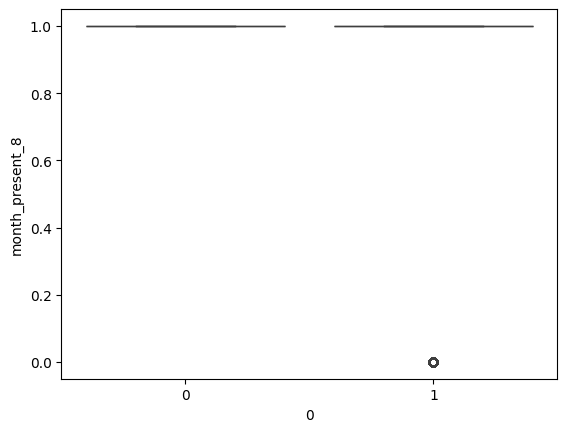

In [155]:
# Boxplot to analyze the relationship between churn probability and the presence of the last date of the month for July (month_present_7)
sns.boxplot(x=test_data[0], y=test_data['month_present_7'])
plt.show()

# Boxplot to analyze the relationship between churn probability and the presence of the last date of the month for August (month_present_8)
sns.boxplot(x=test_data[0], y=test_data['month_present_8'])
plt.show()

In [156]:
## Handling class imbalance on the entire dataset:

# Initiating RandomOverSampler for balancing classes:
os = RandomOverSampler(sampling_strategy=1)

# Fitting the oversampler on the entire dataset:
X_whole, y_whole = os.fit_resample(X_data, np.array(y))
print("Shape of X_whole:", X_whole.shape)
print("Shape of y_whole:", y_whole.shape)

# Checking the balance of classes after resampling:
print("Percentage of churn instances in the whole dataset:", y_whole.sum() / len(y_whole) * 100)

Shape of X_whole: (125734, 154)
Shape of y_whole: (125734,)
Percentage of churn instances in the whole dataset: 50.0


In [157]:
# Fitting the final model on the balanced whole dataset:
final_model.fit(X_whole, y_whole)

# Applying the final model on the scaled test dataset:
y_pred = final_model.predict(X_test_scaled)

In [158]:
# Creating a CSV file with predictions:
y_pred = pd.Series(y_pred)
test_data = pd.concat([test_df_refined_1, y_pred], axis=1)
test_data = test_data.set_index('id')

# Creating a DataFrame with churn probability predictions:
sample = pd.DataFrame(test_data[0])
sample.columns = ['churn_probability']

# Saving the DataFrame as a CSV file:
sample.to_csv('Vineet_Tiwari_final.csv')

In [159]:
model = report['RandomForest'][0]
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=20)

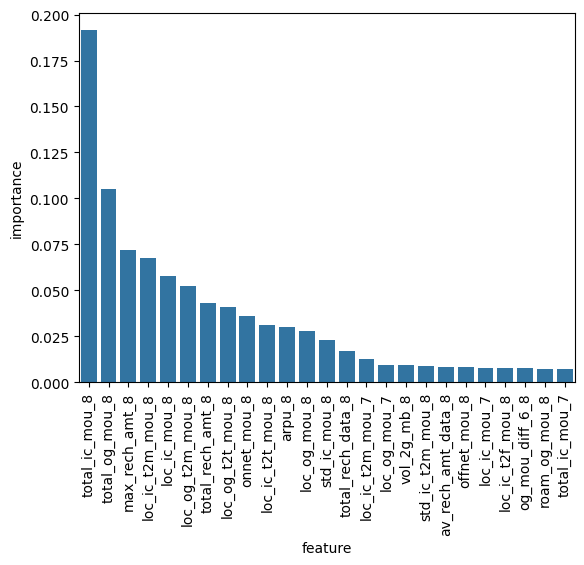

The top features are:

1 . total_ic_mou_8
2 . total_og_mou_8
3 . max_rech_amt_8
4 . loc_ic_t2m_mou_8
5 . loc_ic_mou_8
6 . loc_og_t2m_mou_8
7 . total_rech_amt_8
8 . loc_og_t2t_mou_8
9 . onnet_mou_8
10 . loc_ic_t2t_mou_8
11 . arpu_8
12 . loc_og_mou_8
13 . std_ic_mou_8
14 . total_rech_data_8
15 . loc_ic_t2m_mou_7
16 . loc_og_mou_7
17 . vol_2g_mb_8
18 . std_ic_t2m_mou_8
19 . av_rech_amt_data_8
20 . offnet_mou_8
21 . loc_ic_mou_7
22 . loc_ic_t2f_mou_8
23 . og_mou_diff_6_8
24 . roam_og_mou_8
25 . total_ic_mou_7


In [160]:
# Creating a list to store feature names and their importance
feature_dict = []

# Iterating through each feature and its importance in the model
for i in range(len(model.feature_names_in_)):
    feature_dict.append((model.feature_names_in_[i], model.feature_importances_[i]))

# Creating a DataFrame to store feature names and their importance, sorted by importance
feature_importance = pd.DataFrame(feature_dict, columns=['feature', 'importance']).sort_values(by='importance', ascending=False)

# Plotting the top features in decreasing order of importance
sns.barplot(x=feature_importance.head(25)['feature'], y=feature_importance.head(25)['importance'])
plt.xticks(rotation=90)
plt.show()

# Extracting the top features from the DataFrame
top_features = list(feature_importance.head(25)['feature'])

# Displaying the top features
print('The top features are:\n')
for i in range(25):
    print(i + 1, '.', top_features[i])

In [ ]:
!pip install statsmodels



In [161]:
# Importing necessary libraries
import statsmodels.api as sm
from sklearn.feature_selection import RFE

# Initiating Logistic Regression model
lr = LogisticRegression()

# Applying Recursive Feature Elimination (RFE) to select 30 features
rfe = RFE(lr, n_features_to_select=30)
rfe.fit(X_train, y_train)

# Getting the selected features
selected_features = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Extracting column names of selected features
col = X_train.columns[rfe.support_]

# Adding constant to the features and creating a new DataFrame
X_train_sm = sm.add_constant(X_train[col])

# Fitting the logistic regression model using statsmodels
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()

# Printing the summary of the logistic regression model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48968
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10167.
Date:                Sun, 29 Dec 2024   Deviance:                       20335.
Time:                        11:24:47   Pearson chi2:                 1.97e+07
No. Iterations:                    26   Pseudo R-squ. (CS):             0.2150
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 61.4864   3.54e+04      0.002      0.999   -6.92e+04    6.93e+04
loc_ic_t2t_mou_8    1.084e+06   4.19e+04     25.839      0.000       1e+06    1.17e+06
loc_ic_mou_8       -1.097e+06   4.25e+04    -25.842      0.000   -1.18e+06   -1.01e+06
loc_og_t2m_mou_8      -9.1479      4.424     -2.068      0.039     -17.818      -0.478
loc_ic_t2f_mou_8    1.698e+05   6573.753     25.836      0.000    1.57e+05    1.83e+05
loc_og_mou_8         -13.1722      6.498     -2.027      0.043     -25.909      -0.436
loc_ic_t2m_mou_8    6.356e+05   2.46e+04     25.838      0.000    5.87e+05    6.84e+05
std_ic_mou_8         -17.7162      3.680     -4.814      0.000     -24.929     -10.503
roam_og_mou_8         12.6590      1.689      7.493      0.000       9.348      15.970
spl_og_mou_8          -9.0921      2.700     -3.367      0.001     -14.385      -3.800
spl_ic_mou_8        -107.1806      8.196    -13.076      0.000    -123.245     -91.116
offnet_mou_8          -0.6604      2.245     -0.294      0.769      -5.060       3.739
roam_og_mou_6          2.5511      0.973      2.621      0.009       0.643       4.459
std_og_mou_6           0.7791      1.290      0.604      0.546      -1.749       3.307
roam_og_mou_7          1.4184      0.922      1.539      0.124      -0.388       3.225
spl_ic_mou_7         -10.8455      2.558     -4.240      0.000     -15.859      -5.832
loc_ic_t2m_mou_7       8.3132      1.173      7.087      0.000       6.014      10.612
monthly_2g_8          -4.5405      0.643     -7.062      0.000      -5.801      -3.280
total_rech_num_8     -10.5211      0.870    -12.090      0.000     -12.227      -8.815
total_rech_num_7       4.8506      0.522      9.293      0.000       3.828       5.874
total_ic_mou_8         4.4225      3.814      1.160      0.246      -3.053      11.898
total_og_mou_8         0.4273      2.645      0.162      0.872      -4.756       5.611
count_rech_2g_8        4.7926      2.891      1.658      0.097      -0.873      10.458
total_rech_data_8    -18.4077      3.519     -5.231      0.000     -25.304     -11.511
last_day_rch_amt_8   -22.6702      1.808    -12.538      0.000     -26.214     -19.126
max_rech_amt_8        -0.2546      1.172     -0.217      0.828      -2.552       2.043
month_present_7      -26.7112   2.75e+04     -0.001      0.999    -5.4e+04     5.4e+04
month_present_8      -26.6969   2.22e+04     -0.001      0.999   -4.35e+04    4.34e+04
rech_diff_6_8        -11.2324      3.539     -3.174      0.002     -18.169      -4.296
arpu_diff_6_8         -5.2986      4.143     -1.279      0.201     -13.418       2.821
og_mou_diff_6_8       -3.2618      3.539     -0.922      0.357     -10.198       3.674
======================================================================================
"""

In [162]:
# Importing necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a DataFrame to store VIF values
vif = pd.DataFrame()

# Assigning feature names to the DataFrame
vif['Features'] = X_train_sm.columns

# Calculating VIF for each feature
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]

# Rounding off VIF values
vif['VIF'] = round(vif['VIF'], 2)

# Sorting DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Displaying the DataFrame
vif

Features           VIF
2         loc_ic_mou_8  1.597590e+09
6     loc_ic_t2m_mou_8  6.927756e+08
1     loc_ic_t2t_mou_8  5.261438e+08
4     loc_ic_t2f_mou_8  3.737366e+07
0                const  3.937920e+03
20      total_ic_mou_8  2.051000e+01
21      total_og_mou_8  1.392000e+01
30     og_mou_diff_6_8  8.530000e+00
13        std_og_mou_6  7.440000e+00
23   total_rech_data_8  6.770000e+00
22     count_rech_2g_8  6.650000e+00
29       arpu_diff_6_8  5.730000e+00
28       rech_diff_6_8  5.560000e+00
5         loc_og_mou_8  5.150000e+00
3     loc_og_t2m_mou_8  3.920000e+00
7         std_ic_mou_8  3.900000e+00
11        offnet_mou_8  3.370000e+00
18    total_rech_num_8  3.110000e+00
16    loc_ic_t2m_mou_7  2.930000e+00
19    total_rech_num_7  2.360000e+00
25      max_rech_amt_8  2.330000e+00
24  last_day_rch_amt_8  2.040000e+00
14       roam_og_mou_7  1.870000e+00
27     month_present_8  1.780000e+00
26     month_present_7  1.750000e+00
8        roam_og_mou_8  1.740000e+00
12       roam_og_mou_6  1.590000e+00
17        monthly_2g_8  1.080000e+00
9         spl_og_mou_8  1.060000e+00
10        spl_ic_mou_8  1.040000e+00
15        spl_ic_mou_7  1.030000e+00

In [163]:
# Dropping columns with high VIF values to address multicollinearity
X_train_sm2 = X_train_sm.drop(['loc_ic_mou_8', 'month_present_8', 'total_ic_mou_8'], axis=1)

In [164]:
# Fitting the logistic regression model again on the refined set of features after dropping 'loc_ic_mou_8', 'month_present_8', and 'total_ic_mou_8' columns
logm3 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial())

# Fitting the model
res = logm3.fit()

# Displaying the summary of the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                48999
Model:                            GLM   Df Residuals:                    48971
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10747.
Date:                Sun, 29 Dec 2024   Deviance:                       21495.
Time:                        11:28:06   Pearson chi2:                 4.45e+09
No. Iterations:                    24   Pseudo R-squ. (CS):             0.1962
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 36.1509    1.2e+04      0.003      0.998   -2.34e+04    2.35e+04
loc_ic_t2t_mou_8     -97.0283     10.594     -9.158      0.000    -117.793     -76.264
loc_og_t2m_mou_8      -9.7798      5.174     -1.890      0.059     -19.921       0.361
loc_ic_t2f_mou_8     -44.7477      5.293     -8.455      0.000     -55.121     -34.374
loc_og_mou_8         -21.2132      7.924     -2.677      0.007     -36.744      -5.682
loc_ic_t2m_mou_8     -84.8214      4.545    -18.664      0.000     -93.729     -75.914
std_ic_mou_8         -19.9009      3.152     -6.314      0.000     -26.078     -13.723
roam_og_mou_8         15.0785      1.742      8.655      0.000      11.664      18.493
spl_og_mou_8         -11.9259      2.874     -4.150      0.000     -17.558      -6.294
spl_ic_mou_8        -112.7921      8.301    -13.588      0.000    -129.062     -96.522
offnet_mou_8          -0.7648      2.318     -0.330      0.741      -5.308       3.779
roam_og_mou_6          2.2391      0.981      2.284      0.022       0.317       4.161
std_og_mou_6           0.5286      1.262      0.419      0.675      -1.945       3.002
roam_og_mou_7          1.9515      0.920      2.122      0.034       0.149       3.754
spl_ic_mou_7         -11.8617      2.504     -4.737      0.000     -16.770      -6.954
loc_ic_t2m_mou_7       8.9668      1.265      7.091      0.000       6.488      11.445
monthly_2g_8          -4.4364      0.641     -6.916      0.000      -5.694      -3.179
total_rech_num_8     -12.2625      0.886    -13.839      0.000     -13.999     -10.526
total_rech_num_7       4.3171      0.513      8.413      0.000       3.311       5.323
total_og_mou_8         1.3879      2.623      0.529      0.597      -3.752       6.528
count_rech_2g_8        2.1959      2.847      0.771      0.441      -3.384       7.776
total_rech_data_8    -15.5274      3.441     -4.512      0.000     -22.272      -8.782
last_day_rch_amt_8   -24.7765      1.884    -13.148      0.000     -28.470     -21.083
max_rech_amt_8        -3.2004      1.235     -2.591      0.010      -5.621      -0.780
month_present_7      -26.2732    1.2e+04     -0.002      0.998   -2.35e+04    2.34e+04
rech_diff_6_8         -6.4070      3.621     -1.769      0.077     -13.504       0.690
arpu_diff_6_8        -13.9794      4.285     -3.262      0.001     -22.378      -5.581
og_mou_diff_6_8       -3.3100      3.488     -0.949      0.343     -10.146       3.526
======================================================================================
"""

In [165]:
# Creating a list of the important features after dropping some columns
imp_features = list(X_train_sm2.columns)
imp_features

['const',
 'loc_ic_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_mou_8',
 'loc_ic_t2m_mou_8',
 'std_ic_mou_8',
 'roam_og_mou_8',
 'spl_og_mou_8',
 'spl_ic_mou_8',
 'offnet_mou_8',
 'roam_og_mou_6',
 'std_og_mou_6',
 'roam_og_mou_7',
 'spl_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'monthly_2g_8',
 'total_rech_num_8',
 'total_rech_num_7',
 'total_og_mou_8',
 'count_rech_2g_8',
 'total_rech_data_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'month_present_7',
 'rech_diff_6_8',
 'arpu_diff_6_8',
 'og_mou_diff_6_8']

In [166]:
# Checking Variance Inflation Factor (VIF) for the updated set of features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a DataFrame to store VIF values for each feature
vif = pd.DataFrame()

# Assigning feature names to the 'Features' column
vif['Features'] = X_train_sm2.columns

# Calculating VIF for each feature and storing the values in the 'VIF' column
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]

# Rounding off VIF values to 2 decimal places
vif['VIF'] = round(vif['VIF'], 2)

# Sorting the DataFrame based on VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)
vif

Features      VIF
0                const  3935.00
19      total_og_mou_8    13.90
27     og_mou_diff_6_8     8.52
12        std_og_mou_6     7.42
21   total_rech_data_8     6.77
20     count_rech_2g_8     6.65
26       arpu_diff_6_8     5.71
25       rech_diff_6_8     5.56
4         loc_og_mou_8     5.15
2     loc_og_t2m_mou_8     3.92
10        offnet_mou_8     3.37
5     loc_ic_t2m_mou_8     3.11
17    total_rech_num_8     3.10
15    loc_ic_t2m_mou_7     2.93
18    total_rech_num_7     2.36
23      max_rech_amt_8     2.31
22  last_day_rch_amt_8     2.04
13       roam_og_mou_7     1.87
7        roam_og_mou_8     1.74
11       roam_og_mou_6     1.59
1     loc_ic_t2t_mou_8     1.09
16        monthly_2g_8     1.08
3     loc_ic_t2f_mou_8     1.07
8         spl_og_mou_8     1.06
6         std_ic_mou_8     1.05
9         spl_ic_mou_8     1.04
14        spl_ic_mou_7     1.03
24     month_present_7     1.02

In [167]:
# List of final important features identified using the statsmodel approach
important_features_stats_model=list(vif.Features)
important_features_stats_model

['const',
 'total_og_mou_8',
 'og_mou_diff_6_8',
 'std_og_mou_6',
 'total_rech_data_8',
 'count_rech_2g_8',
 'arpu_diff_6_8',
 'rech_diff_6_8',
 'loc_og_mou_8',
 'loc_og_t2m_mou_8',
 'offnet_mou_8',
 'loc_ic_t2m_mou_8',
 'total_rech_num_8',
 'loc_ic_t2m_mou_7',
 'total_rech_num_7',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_6',
 'loc_ic_t2t_mou_8',
 'monthly_2g_8',
 'loc_ic_t2f_mou_8',
 'spl_og_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'spl_ic_mou_7',
 'month_present_7']

In [168]:
# Calculating predicted probabilities and classifying churn based on the probability threshold
y_pred = res.predict(X_train_sm2)
pred_data = pd.DataFrame({'Churn': y_train, 'Prob_churn': y_pred})
pred_data['Predicted_churn'] = pred_data['Prob_churn'].apply(lambda x: 0 if x <= 0.3 else 1)
pred_data

Churn  Prob_churn  Predicted_churn
61787      0    0.022484                0
19961      0    0.013084                0
11040      0    0.000786                0
27673      0    0.394069                1
22876      0    0.004445                0
...      ...         ...              ...
37194      1    0.477469                1
6265       0    0.004140                0
54886      0    0.032835                0
860        0    0.136055                0
15795      0    0.006605                0

[48999 rows x 3 columns]

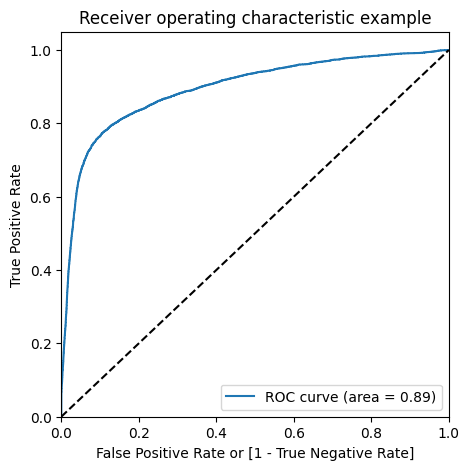

In [169]:
# Importing necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score

# Defining a function to draw the ROC curve
def draw_roc(actual, probs):
    # Calculating false positive rate, true positive rate, and thresholds for different probability cutoffs
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    
    # Calculating the AUC score
    auc_score = roc_auc_score(actual, probs)
    
    # Plotting the ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# Calling the function to plot ROC curve
draw_roc(pred_data.Churn, pred_data.Prob_churn)

In [170]:
# Defining a list of probability cutoffs
numbers = [float(x)/10 for x in range(10)]

# Dropping the existing 'Predicted_churn' column
pred_data = pred_data.drop('Predicted_churn', axis=1)

# Looping over each probability cutoff and creating a new column based on it
for i in numbers:
    # Assigning 1 if the predicted probability is greater than the cutoff, else 0
    pred_data[i] = pred_data.Prob_churn.map(lambda x: 1 if x > i else 0)

# Displaying the first few rows of the modified dataframe
pred_data.head()

Churn  Prob_churn  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
61787      0    0.022484    1    0    0    0    0    0    0    0    0    0
19961      0    0.013084    1    0    0    0    0    0    0    0    0    0
11040      0    0.000786    1    0    0    0    0    0    0    0    0    0
27673      0    0.394069    1    1    1    1    0    0    0    0    0    0
22876      0    0.004445    1    0    0    0    0    0    0    0    0    0

In [171]:
# Importing necessary libraries

# Creating an empty DataFrame to store accuracy, sensitivity, and specificity for various probability cutoffs
cutoff_data = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

# Defining a list of probability cutoffs
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Looping through each probability cutoff
for i in num:
    # Generating confusion matrix for the current probability cutoff
    cm1 = confusion_matrix(pred_data.Churn, pred_data[i])
    
    # Calculating the total number of predictions
    total1 = sum(sum(cm1))
    
    # Calculating accuracy
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    
    # Calculating specificity
    specificity = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    
    # Calculating sensitivity
    sensitivity = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    
    # Adding the results to the DataFrame
    cutoff_data.loc[i] = [i, accuracy, sensitivity, specificity]

# Displaying the DataFrame
print(cutoff_data)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.101574     1.000000     0.000000
0.1   0.1  0.775220     0.851919     0.766549
0.2   0.2  0.880059     0.775568     0.891872
0.3   0.3  0.920080     0.676512     0.947617
0.4   0.4  0.922754     0.424352     0.979101
0.5   0.5  0.912019     0.205345     0.991913
0.6   0.6  0.908039     0.125377     0.996524
0.7   0.7  0.906202     0.089411     0.998546
0.8   0.8  0.905059     0.070524     0.999409
0.9   0.9  0.904774     0.064095     0.999818


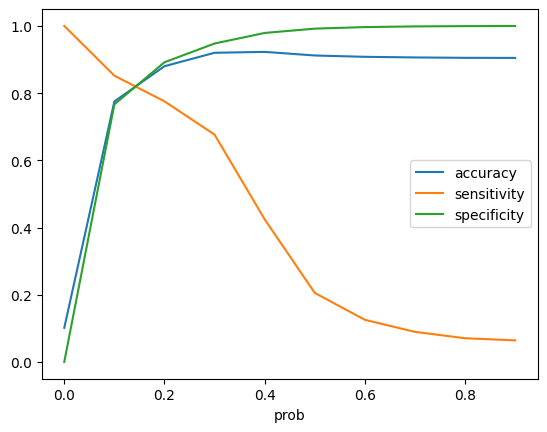

In [172]:
# Plotting a line graph using pandas plotting feature

# Plotting the graph with probability cutoffs on the x-axis and accuracy, sensitivity, and specificity on the y-axis
cutoff_data.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])

# Displaying the plot
plt.show()

In [173]:
# Setting the probability threshold for classification
i = 0.59

# Creating a DataFrame with 'Churn' and 'Prob_churn' columns from the prediction data
final_data = pred_data[['Churn', 'Prob_churn']]

# Creating a new column based on the probability threshold
final_data[i] = pred_data.Prob_churn.map(lambda x: 1 if x > i else 0)

# Displaying the first few rows of the final data
final_data.head()

Churn  Prob_churn  0.59
61787      0    0.022484     0
19961      0    0.013084     0
11040      0    0.000786     0
27673      0    0.394069     0
22876      0    0.004445     0

In [174]:
# Calculating the confusion matrix for the given probability threshold
cm1 = confusion_matrix(final_data.Churn, final_data[0.59] )

# Calculating the total number of predictions
total = sum(sum(cm1))

# Calculating accuracy as the sum of correctly predicted values divided by the total number of predictions
accuracy = (cm1[0,0] + cm1[1,1]) / total
    
# Calculating specificity as the true negatives divided by the sum of true negatives and false positives
speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])

# Calculating sensitivity as the true positives divided by the sum of true positives and false negatives
sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])

In [175]:
# Finally checking the accuracy:
accuracy

0.908120573889263

In [176]:
# Creating a DataFrame to store the coefficients of the model parameters
coef_data=pd.DataFrame(res.params,columns=['Coef'])

# Extracting variables with positive coefficients and sorting them in descending order
positive_coef=coef_data[coef_data['Coef']>0].sort_values(by='Coef',ascending=False)

# Extracting variables with negative coefficients and sorting them
negative_coef=coef_data[coef_data['Coef']<0].sort_values(by='Coef')